### Styling and imports

In [1]:
%%html
<style>
    .purple {
        background-color: #e6ccff;
    }
    .green {
        background-color: #99ffdd;
    }
    .blue {
        background-color: #b3f0ff;
    }
    .yellow{
        background-color: #ffffb3;
    }
    .orange {
        background-color: #ffcc66;
    }
    .center {
        text-align: center;
    }
    .small-padding {
        padding: 5px;
    }
    .extra-padding {
        padding: 20px;
    }
</style>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from datetime import datetime, timedelta
import time
import json
import statistics
import seaborn as sns
import csv
import os

<div class="green extra-padding">
<h1 class="center">Our question: What is the impact of air pollution and how can we improve air quality in the London Borough of Hammersmith and Fulham?</h1>
<strong>In this analysis:</strong>
<ol>
<li>What is the main cause of air pollution in the borough and what factors are influencing levels of pollutants?</li>
<li>What has been the impact of schemes such as ULEZ and Covid on reducing air pollution and how can this inform future policies?</li>
<li>What is the impact of air pollution on our health and the NHS?</li>
</ol>
</div>

<div class="orange extra-padding">
    <h2>Data loading and cleaning</h2>
</div>

<div class="yellow small-padding">
    <h3>Hammersmith Air Quality API data</h3>
</div>

<div class="purple small-padding">
    <h4>Fetch data from API and save to CSV</h4>
</div>

In [3]:
# These sections are commented out as the data has already been retrieved using the API
# Please load data from the saved csv 
# To test the API response, please enter an API key below

# Hammersmith coords for school near A4
# lat= '51.493096'
# lon= '-0.224079'

# API = 'ADD_API_KEY_HERE'

# # Past 3 years 
# end_date = datetime(2024, 1, 1, 12, 00, 00)
# start_date = end_date - timedelta(days=1095)

# start = int(start_date.timestamp())
# end = int(end_date.timestamp())

# response = requests.get(f'http://api.openweathermap.org/data/2.5/air_pollution/history?lat={lat}&lon={lon}&start={start}&end={end}&appid={API}')


# # Check response success
# if response.status_code == 200:
#     data = response.json()
# else:
#     print(f"Error: {response.status_code}")

In [4]:
# Data already saved
# file_path = "../data_unclean/air_pollution_data_hammersmith_3_years.csv"

# def save_to_csv(response, file_path):
#     records = []
#     for entry in response['list']:
#         record = {
#             "date_time": entry["dt"],
#             "aqi": entry["main"]["aqi"],
#             "co": entry["components"]["co"],
#             "no": entry["components"]["no"],
#             "no2": entry["components"]["no2"],
#             "o3": entry["components"]["o3"],
#             "so2": entry["components"]["so2"],
#             "pm2_5": entry["components"]["pm2_5"],
#             "pm10": entry["components"]["pm10"],
#             "nh3": entry["components"]["nh3"],
#         }
#         records.append(record)
#     aq_df = pd.DataFrame(records)
#     path = file_path
#     aq_df.to_csv(path, index=False)
#     return aq_df

# save_to_csv(response.json(), file_path)

<div class="purple small-padding">
    <h4>Load data from CSV</h4>
</div>

In [5]:
air_quality_hammersmith = pd.read_csv('data_unclean/air_pollution_data_hammersmith_3_years.csv')
air_quality_hammersmith.head(10)

,date_time,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,1609502400,2,320.44,13.19,46.61,2.33,28.61,16.74,17.83,1.98
1,1609506000,2,323.77,15.65,43.87,2.12,24.08,16.56,17.74,1.44
2,1609509600,2,323.77,17.43,43.18,1.43,21.22,15.27,16.50,1.24
3,1609513200,2,327.11,18.33,44.55,0.65,19.31,13.24,14.59,1.03
4,1609516800,2,330.45,17.43,45.93,0.10,17.41,10.69,12.15,0.82
5,1609520400,2,323.77,14.53,47.30,0.04,15.74,7.85,9.31,0.71
6,1609524000,2,310.42,11.06,49.35,0.26,14.66,6.31,7.63,0.66
7,1609527600,2,307.08,8.61,50.72,0.68,15.14,6.21,7.32,0.62
8,1609531200,2,310.42,6.87,49.35,1.11,15.74,6.32,7.38,0.59
9,1609534800,2,303.75,4.92,45.24,1.97,15.14,6.00,7.15,0.56


In [6]:
air_quality_hammersmith.tail(10)

,date_time,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3
26007,1704078000,2,233.65,0.00,2.25,67.23,1.42,0.50,0.83,0.20
26008,1704081600,2,233.65,0.00,2.46,67.23,1.61,0.50,0.86,0.21
26009,1704085200,2,233.65,0.00,2.78,66.52,1.86,0.50,0.90,0.24
26010,1704088800,2,233.65,0.00,3.47,67.23,2.21,0.50,0.93,0.29
26011,1704092400,2,240.33,0.00,6.17,65.80,3.13,0.55,1.07,0.40
26012,1704096000,2,240.33,0.00,9.42,63.66,3.87,0.72,1.39,0.52
26013,1704099600,2,240.33,0.01,10.88,64.37,4.29,0.81,1.65,0.62
26014,1704103200,2,236.99,0.08,10.37,70.10,4.29,0.80,1.69,0.67
26015,1704106800,2,236.99,0.21,9.08,75.10,3.99,0.68,1.44,0.67
26016,1704110400,2,233.65,0.30,7.97,77.96,3.61,0.57,1.13,0.63


<div class="purple small-padding">
    <h4>Change datetime to readable format</h4>
</div>

In [7]:
air_quality_hammersmith['date_time'] = pd.to_datetime(air_quality_hammersmith['date_time'], unit='s')
air_quality_hammersmith.head(10)

,date_time,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2021-01-01 12:00:00,2,320.44,13.19,46.61,2.33,28.61,16.74,17.83,1.98
1,2021-01-01 13:00:00,2,323.77,15.65,43.87,2.12,24.08,16.56,17.74,1.44
2,2021-01-01 14:00:00,2,323.77,17.43,43.18,1.43,21.22,15.27,16.50,1.24
3,2021-01-01 15:00:00,2,327.11,18.33,44.55,0.65,19.31,13.24,14.59,1.03
4,2021-01-01 16:00:00,2,330.45,17.43,45.93,0.10,17.41,10.69,12.15,0.82
5,2021-01-01 17:00:00,2,323.77,14.53,47.30,0.04,15.74,7.85,9.31,0.71
6,2021-01-01 18:00:00,2,310.42,11.06,49.35,0.26,14.66,6.31,7.63,0.66
7,2021-01-01 19:00:00,2,307.08,8.61,50.72,0.68,15.14,6.21,7.32,0.62
8,2021-01-01 20:00:00,2,310.42,6.87,49.35,1.11,15.74,6.32,7.38,0.59
9,2021-01-01 21:00:00,2,303.75,4.92,45.24,1.97,15.14,6.00,7.15,0.56


In [8]:
air_quality_hammersmith.tail(10)

,date_time,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3
26007,2024-01-01 03:00:00,2,233.65,0.00,2.25,67.23,1.42,0.50,0.83,0.20
26008,2024-01-01 04:00:00,2,233.65,0.00,2.46,67.23,1.61,0.50,0.86,0.21
26009,2024-01-01 05:00:00,2,233.65,0.00,2.78,66.52,1.86,0.50,0.90,0.24
26010,2024-01-01 06:00:00,2,233.65,0.00,3.47,67.23,2.21,0.50,0.93,0.29
26011,2024-01-01 07:00:00,2,240.33,0.00,6.17,65.80,3.13,0.55,1.07,0.40
26012,2024-01-01 08:00:00,2,240.33,0.00,9.42,63.66,3.87,0.72,1.39,0.52
26013,2024-01-01 09:00:00,2,240.33,0.01,10.88,64.37,4.29,0.81,1.65,0.62
26014,2024-01-01 10:00:00,2,236.99,0.08,10.37,70.10,4.29,0.80,1.69,0.67
26015,2024-01-01 11:00:00,2,236.99,0.21,9.08,75.10,3.99,0.68,1.44,0.67
26016,2024-01-01 12:00:00,2,233.65,0.30,7.97,77.96,3.61,0.57,1.13,0.63


<div class="yellow small-padding">
    <h3>API air quality data for different period</h3>
</div>

In [9]:
api_data = pd.read_csv('data_unclean/air_pollution_data_Hammersmith_Oct20_Oct22.csv')
api_data.head()

,dt,main.aqi,components.co,components.no,components.no2,components.o3,components.so2,components.pm2_5,components.pm10,components.nh3
0,1606266000,1,216.96,0.0,8.82,63.66,3.46,5.03,6.36,0.74
1,1606269600,1,216.96,0.0,7.71,64.37,3.37,5.84,7.35,0.71
2,1606273200,1,216.96,0.0,7.28,64.37,3.52,6.03,7.92,0.65
3,1606276800,1,216.96,0.0,7.28,63.66,3.73,6.13,8.45,0.58
4,1606280400,1,216.96,0.0,7.88,60.08,3.93,6.38,9.09,0.52


In [10]:
#Sorting out Columns
def drop_prefix(col_name):
    return col_name.split('.')[-1]

api_data.rename(columns=drop_prefix, inplace=True)
api_data.columns = api_data.columns.str.upper()
#Verifying if column update worked and checking data types and if non-null records in columns is consistent
api_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16631 entries, 0 to 16630
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DT      16631 non-null  int64  
 1   AQI     16631 non-null  int64  
 2   CO      16631 non-null  float64
 3   NO      16631 non-null  float64
 4   NO2     16631 non-null  float64
 5   O3      16631 non-null  float64
 6   SO2     16631 non-null  float64
 7   PM2_5   16631 non-null  float64
 8   PM10    16631 non-null  float64
 9   NH3     16631 non-null  float64
dtypes: float64(8), int64(2)
memory usage: 1.3 MB


In [11]:
#Dropping columns not needed for analysis
api_data.drop(columns=['AQI','O3', 'SO2', 'NH3'], inplace=True)

In [12]:
#Converting DT to a new column in datetime format and assigning as index
api_data['Timestamp'] = pd.to_datetime(api_data['DT'], unit='s')
api_data.drop(columns=['DT'], inplace=True)
api_data.set_index('Timestamp', inplace=True)
api_data.index

DatetimeIndex(['2020-11-25 01:00:00', '2020-11-25 02:00:00',
               '2020-11-25 03:00:00', '2020-11-25 04:00:00',
               '2020-11-25 05:00:00', '2020-11-25 06:00:00',
               '2020-11-25 07:00:00', '2020-11-25 08:00:00',
               '2020-11-25 09:00:00', '2020-11-25 10:00:00',
               ...
               '2022-10-23 14:00:00', '2022-10-23 15:00:00',
               '2022-10-23 16:00:00', '2022-10-23 17:00:00',
               '2022-10-23 18:00:00', '2022-10-23 19:00:00',
               '2022-10-23 20:00:00', '2022-10-23 21:00:00',
               '2022-10-23 22:00:00', '2022-10-23 23:00:00'],
              dtype='datetime64[ns]', name='Timestamp', length=16631, freq=None)

In [13]:
#Brief check of statistics, looking for anomalies
api_data.describe()

,CO,NO,NO2,PM2_5,PM10
count,16631.000000,16631.000000,16631.000000,16631.000000,16631.000000
mean,250.355341,6.394419,19.400101,6.938633,8.706227
std,80.472160,23.146664,15.759266,8.073183,8.655860
min,141.860000,0.000000,1.340000,0.500000,0.530000
25%,198.600000,0.010000,8.230000,2.370000,3.500000
50%,236.990000,0.350000,14.050000,4.160000,6.070000
75%,277.040000,1.660000,25.360000,8.050000,10.550000
max,1268.390000,447.030000,126.120000,104.540000,108.950000


<div class="blue extra-padding">
    <strong>Observations:</strong>
    <ul>
        <li>The count for all variables is the same confirming no missing data.</li>
        <li>While the maximum values for each variable are considerably higher than the 75th percentile and therefore suggesting the presence of outliers, the mean and median (50th percentile) values seem reasonably close to each other, indicating that the data might not be heavily skewed. </li>
        <li>The range between the minimum and maximum values seems plausible for pollutants, however the minimum value of 0.00 of NO is unliley and will require a data fix.</li>
    </ul>
</div>

In [14]:
#Replacing 0 values with NaN
api_data.replace(0, np.nan, inplace=True)

#Replacing NaN values with mean for 'NO' column
api_data['NO'] = api_data['NO'].fillna(api_data['NO'].mean())
api_data.describe()

,CO,NO,NO2,PM2_5,PM10
count,16631.000000,16631.000000,16631.000000,16631.000000,16631.000000
mean,250.355341,8.492699,19.400101,6.938633,8.706227
std,80.472160,22.854977,15.759266,8.073183,8.655860
min,141.860000,0.010000,1.340000,0.500000,0.530000
25%,198.600000,0.340000,8.230000,2.370000,3.500000
50%,236.990000,1.620000,14.050000,4.160000,6.070000
75%,277.040000,8.492699,25.360000,8.050000,10.550000
max,1268.390000,447.030000,126.120000,104.540000,108.950000


In [15]:
#Resampling data to monthly averages to smooth out fluctuations
monthly_data = api_data.resample('ME').mean()
# monthly_data = monthly_data.reset_index()
monthly_data.head()

,CO,NO,NO2,PM2_5,PM10
Timestamp,,,,,
2020-11-30,325.932308,16.986953,38.983007,18.997203,20.771958
2020-12-31,253.597056,9.027107,24.539288,5.631720,6.816102
2021-01-31,275.814333,8.549616,26.318153,5.703417,6.614931
2021-02-28,270.657798,11.590278,23.557649,7.763393,9.406190
2021-03-31,277.998468,12.376494,25.949704,11.463683,13.554839


<div class="purple small-padding">
    <h4>Save dataframe to csv</h4>
</div>

In [16]:
path = 'data_clean/monthly_air_quality_data_clean.csv'
monthly_data.to_csv(path, index='Timestamp')

<div class="yellow small-padding">
    <h3>Open Meteo Weather data</h3>
</div>

<div class="purple small-padding">
    <h4>Load Weather Data (retrieved from Open Meteo)</h4>
</div>

In [17]:
weather_data = pd.read_csv('data_unclean/weather_hammersmith.csv')
weather_data.head()

,time,temperature_2m (°C),relative_humidity_2m (%),precipitation (mm),rain (mm),snowfall (cm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°)
0,2021-01-01T00:00,-0.1,96,0.0,0.0,0.0,1007.8,3.8,7.6,253
1,2021-01-01T01:00,-0.7,97,0.0,0.0,0.0,1008.0,4.7,10.5,261
2,2021-01-01T02:00,-1.1,98,0.0,0.0,0.0,1008.3,5.0,12.7,270
3,2021-01-01T03:00,-1.7,97,0.0,0.0,0.0,1008.7,6.1,14.0,270
4,2021-01-01T04:00,-2.3,97,0.0,0.0,0.0,1008.7,6.9,14.7,279


In [18]:
weather_data.time = pd.to_datetime(weather_data.time)
weather_data.describe()

,time,temperature_2m (°C),relative_humidity_2m (%),precipitation (mm),rain (mm),snowfall (cm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°)
count,26304,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000
mean,2022-07-02 23:30:00,11.518891,79.015625,0.085056,0.084018,0.000727,1014.422651,14.627365,24.297354,190.498898
min,2021-01-01 00:00:00,-10.200000,17.000000,0.000000,0.000000,0.000000,952.700000,0.000000,0.000000,1.000000
25%,2021-10-01 23:45:00,7.175000,70.000000,0.000000,0.000000,0.000000,1007.800000,8.700000,16.500000,102.000000
50%,2022-07-02 23:30:00,11.400000,83.000000,0.000000,0.000000,0.000000,1015.400000,13.200000,23.200000,217.000000
75%,2023-04-02 23:15:00,16.000000,91.000000,0.000000,0.000000,0.000000,1022.100000,19.200000,30.700000,253.000000
max,2024-01-01 23:00:00,38.000000,100.000000,14.700000,14.700000,1.400000,1044.700000,68.000000,99.800000,360.000000
std,NaN,6.388734,14.926841,0.372900,0.371140,0.018705,11.117060,7.569446,11.276076,93.808941


In [19]:
weather_data.isna().sum()

time                        0
temperature_2m (°C)         0
relative_humidity_2m (%)    0
precipitation (mm)          0
rain (mm)                   0
snowfall (cm)               0
surface_pressure (hPa)      0
wind_speed_10m (km/h)       0
wind_speed_100m (km/h)      0
wind_direction_10m (°)      0
dtype: int64

In [20]:
# Rename columns
weather_data = weather_data.rename(columns = {
    'time':'time',
    'temperature_2m (°C)':'temp_C', 
    'relative_humidity_2m (%)': 'percent_humidity',
    'precipitation (mm)':'precipitation',
    'rain (mm)': 'rain',
    'snowfall (cm)': 'snowfall',
    'surface_pressure (hPa)':'surface_pressure',
    'wind_speed_10m (km/h)': 'wind_speed_10m',
    'wind_speed_100m (km/h)':'wind_speed_100m',
    'wind_direction_10m (°)':'wind_direction'
})

In [21]:
weather_data.columns

Index(['time', 'temp_C', 'percent_humidity', 'precipitation', 'rain',
       'snowfall', 'surface_pressure', 'wind_speed_10m', 'wind_speed_100m',
       'wind_direction'],
      dtype='object')

<div class="purple small-padding">
    <h4>Merge weather and air quality data and get overview</h4>
</div>

In [22]:
weather_aq = pd.merge(air_quality_hammersmith, weather_data, left_on='date_time',right_on='time', how='left')

In [23]:
weather_aq.head()

,date_time,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3,time,temp_C,percent_humidity,precipitation,rain,snowfall,surface_pressure,wind_speed_10m,wind_speed_100m,wind_direction
0,2021-01-01 12:00:00,2,320.44,13.19,46.61,2.33,28.61,16.74,17.83,1.98,2021-01-01 12:00:00,1.4,92,0.0,0.0,0.0,1010.4,8.3,10.5,265
1,2021-01-01 13:00:00,2,323.77,15.65,43.87,2.12,24.08,16.56,17.74,1.44,2021-01-01 13:00:00,2.1,91,0.0,0.0,0.0,1010.0,9.4,11.9,270
2,2021-01-01 14:00:00,2,323.77,17.43,43.18,1.43,21.22,15.27,16.50,1.24,2021-01-01 14:00:00,2.5,91,0.0,0.0,0.0,1010.0,9.4,12.6,263
3,2021-01-01 15:00:00,2,327.11,18.33,44.55,0.65,19.31,13.24,14.59,1.03,2021-01-01 15:00:00,2.8,92,0.0,0.0,0.0,1010.1,8.3,13.3,252
4,2021-01-01 16:00:00,2,330.45,17.43,45.93,0.10,17.41,10.69,12.15,0.82,2021-01-01 16:00:00,2.7,95,0.0,0.0,0.0,1010.5,6.5,15.0,267


In [24]:
weather_aq.tail()

,date_time,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3,time,temp_C,percent_humidity,precipitation,rain,snowfall,surface_pressure,wind_speed_10m,wind_speed_100m,wind_direction
26012,2024-01-01 08:00:00,2,240.33,0.00,9.42,63.66,3.87,0.72,1.39,0.52,2024-01-01 08:00:00,5.9,71,0.0,0.0,0.0,1001.5,19.6,35.5,256
26013,2024-01-01 09:00:00,2,240.33,0.01,10.88,64.37,4.29,0.81,1.65,0.62,2024-01-01 09:00:00,6.4,69,0.0,0.0,0.0,1002.3,19.3,34.1,256
26014,2024-01-01 10:00:00,2,236.99,0.08,10.37,70.10,4.29,0.80,1.69,0.67,2024-01-01 10:00:00,7.1,69,0.0,0.0,0.0,1002.7,19.1,31.7,248
26015,2024-01-01 11:00:00,2,236.99,0.21,9.08,75.10,3.99,0.68,1.44,0.67,2024-01-01 11:00:00,7.8,69,0.0,0.0,0.0,1003.2,18.2,29.4,236
26016,2024-01-01 12:00:00,2,233.65,0.30,7.97,77.96,3.61,0.57,1.13,0.63,2024-01-01 12:00:00,8.4,68,0.0,0.0,0.0,1003.1,16.6,25.6,228


In [25]:
weather_aq['aqi'].value_counts()

aqi
1    14572
2     9317
3     1344
4      681
5      103
Name: count, dtype: int64

In [26]:
weather_aq['aqi'].value_counts(normalize=True)

aqi
1    0.560095
2    0.358112
3    0.051659
4    0.026175
5    0.003959
Name: proportion, dtype: float64

<div class="blue">
According to this dataset, Air quality in Hammersmith is rated 'good' 56% of the time, 44% of the time fair or below. It is 'poor' or 'moderate' over 7% of the time and 'very poor' less than one percent of the time.
</div>

In [27]:
weather_aq.columns

Index(['date_time', 'aqi', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10',
       'nh3', 'time', 'temp_C', 'percent_humidity', 'precipitation', 'rain',
       'snowfall', 'surface_pressure', 'wind_speed_10m', 'wind_speed_100m',
       'wind_direction'],
      dtype='object')

In [28]:
weather_aq.shape

(26017, 20)

In [29]:
weather_aq.dtypes

date_time           datetime64[ns]
aqi                          int64
co                         float64
no                         float64
no2                        float64
o3                         float64
so2                        float64
pm2_5                      float64
pm10                       float64
nh3                        float64
time                datetime64[ns]
temp_C                     float64
percent_humidity             int64
precipitation              float64
rain                       float64
snowfall                   float64
surface_pressure           float64
wind_speed_10m             float64
wind_speed_100m            float64
wind_direction               int64
dtype: object

<div class="purple small-padding">
    <h4>Data Cleaning</h4>
</div>

In [30]:
weather_aq = weather_aq.drop(columns='time')

In [31]:
weather_aq.columns

Index(['date_time', 'aqi', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10',
       'nh3', 'temp_C', 'percent_humidity', 'precipitation', 'rain',
       'snowfall', 'surface_pressure', 'wind_speed_10m', 'wind_speed_100m',
       'wind_direction'],
      dtype='object')

In [32]:
# Create new columns for day, month, hour

weather_aq['day'] = weather_aq['date_time'].dt.dayofweek
# The day of the week with Monday=0, Sunday=6.

In [33]:
weather_aq['month'] = weather_aq['date_time'].dt.month

In [34]:
weather_aq['hour'] = weather_aq['date_time'].dt.hour

In [35]:
weather_aq.head()

,date_time,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3,...,precipitation,rain,snowfall,surface_pressure,wind_speed_10m,wind_speed_100m,wind_direction,day,month,hour
0,2021-01-01 12:00:00,2,320.44,13.19,46.61,2.33,28.61,16.74,17.83,1.98,...,0.0,0.0,0.0,1010.4,8.3,10.5,265,4,1,12
1,2021-01-01 13:00:00,2,323.77,15.65,43.87,2.12,24.08,16.56,17.74,1.44,...,0.0,0.0,0.0,1010.0,9.4,11.9,270,4,1,13
2,2021-01-01 14:00:00,2,323.77,17.43,43.18,1.43,21.22,15.27,16.50,1.24,...,0.0,0.0,0.0,1010.0,9.4,12.6,263,4,1,14
3,2021-01-01 15:00:00,2,327.11,18.33,44.55,0.65,19.31,13.24,14.59,1.03,...,0.0,0.0,0.0,1010.1,8.3,13.3,252,4,1,15
4,2021-01-01 16:00:00,2,330.45,17.43,45.93,0.10,17.41,10.69,12.15,0.82,...,0.0,0.0,0.0,1010.5,6.5,15.0,267,4,1,16


In [36]:
# Look for missing/anomalous data

weather_aq.describe()

,date_time,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3,...,precipitation,rain,snowfall,surface_pressure,wind_speed_10m,wind_speed_100m,wind_direction,day,month,hour
count,26017,26017.000000,26017.000000,26017.000000,26017.000000,26017.000000,26017.000000,26017.000000,26017.000000,26017.000000,...,26017.000000,26017.000000,26017.000000,26017.000000,26017.000000,26017.000000,26017.000000,26017.000000,26017.000000,26017.000000
mean,2022-07-02 09:44:53.669523712,1.555790,249.606006,6.358509,18.793544,50.661807,7.872453,6.815382,8.654816,0.885957,...,0.085175,0.084126,0.000735,1014.434466,14.640931,24.320202,190.313334,2.991967,6.530192,11.500019
min,2021-01-01 12:00:00,1.000000,141.860000,0.000000,1.340000,-9999.000000,0.860000,0.500000,0.530000,0.000000,...,0.000000,0.000000,0.000000,952.700000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,2021-09-30 12:00:00,1.000000,205.280000,0.000000,7.800000,30.400000,3.810000,2.230000,3.310000,0.290000,...,0.000000,0.000000,0.000000,1007.800000,8.800000,16.500000,102.000000,1.000000,4.000000,6.000000
50%,2022-06-30 12:00:00,1.000000,233.650000,0.290000,13.370000,53.640000,5.660000,3.990000,5.870000,0.550000,...,0.000000,0.000000,0.000000,1015.500000,13.200000,23.200000,217.000000,3.000000,7.000000,12.000000
75%,2023-04-04 12:00:00,2.000000,270.370000,1.500000,23.990000,70.810000,9.060000,7.760000,10.420000,1.040000,...,0.000000,0.000000,0.000000,1022.100000,19.200000,30.800000,253.000000,5.000000,10.000000,17.000000
max,2024-01-01 12:00:00,5.000000,1268.390000,447.030000,126.120000,205.990000,129.700000,104.540000,108.950000,15.200000,...,14.700000,14.700000,1.400000,1044.700000,68.000000,99.800000,360.000000,6.000000,12.000000,23.000000
std,NaN,0.744838,80.892569,23.804967,15.823728,69.255641,7.844575,8.264211,8.995321,1.104444,...,0.373876,0.372101,0.018808,11.136033,7.555999,11.249840,93.849017,2.002452,3.436163,6.922187


<div class="blue small-padding">
    <strong>Observations</strong>
    <ul>
        <li>There are some negative values in the o3 data which is impossible. These will be counted and dealt with ..</li>
        <li>There is a large amount of variance in the data for different pollutants, particularly co and o3, however we will be mostly focussing on NO2 and pm2.5 measurements</li>
        <li>There are some 0 values in pollutants data which is also highly unlikely near such a busy road. </li>
        <li>four</li>
        <li>five</li>
    </ul>
</div>

In [37]:
# Check and remove negative values
negative_values = weather_aq[weather_aq.o3 < 0]
len(negative_values)

1

In [38]:
# As there is only 1 negative value, this row can be deleted
weather_aq = weather_aq[weather_aq.o3 >= 0]
weather_aq.describe()

,date_time,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3,...,precipitation,rain,snowfall,surface_pressure,wind_speed_10m,wind_speed_100m,wind_direction,day,month,hour
count,26016,26016.000000,26016.000000,26016.000000,26016.000000,26016.000000,26016.000000,26016.000000,26016.000000,26016.000000,...,26016.000000,26016.000000,26016.000000,26016.00000,26016.000000,26016.000000,26016.000000,26016.000000,26016.000000,26016.000000
mean,2022-07-02 09:23:22.167896576,1.555812,249.608223,6.358238,18.793687,51.048095,7.872474,6.815534,8.655013,0.885966,...,0.085178,0.084129,0.000735,1014.43454,14.641248,24.320783,190.311308,2.992005,6.530174,11.500192
min,2021-01-01 12:00:00,1.000000,141.860000,0.000000,1.340000,0.000000,0.860000,0.500000,0.530000,0.000000,...,0.000000,0.000000,0.000000,952.70000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,2021-09-30 11:45:00,1.000000,205.280000,0.000000,7.800000,30.400000,3.810000,2.230000,3.310000,0.290000,...,0.000000,0.000000,0.000000,1007.80000,8.800000,16.500000,102.000000,1.000000,4.000000,5.750000
50%,2022-06-30 11:30:00,1.000000,233.650000,0.290000,13.370000,53.640000,5.660000,3.990000,5.870000,0.550000,...,0.000000,0.000000,0.000000,1015.50000,13.200000,23.200000,217.000000,3.000000,7.000000,12.000000
75%,2023-04-04 11:15:00,2.000000,270.370000,1.500000,23.990000,70.810000,9.060000,7.760000,10.420000,1.040000,...,0.000000,0.000000,0.000000,1022.10000,19.200000,30.800000,253.000000,5.000000,10.000000,17.250000
max,2024-01-01 12:00:00,5.000000,1268.390000,447.030000,126.120000,205.990000,129.700000,104.540000,108.950000,15.200000,...,14.700000,14.700000,1.400000,1044.70000,68.000000,99.800000,360.000000,6.000000,12.000000,23.000000
std,NaN,0.744845,80.893333,23.805384,15.824015,30.235222,7.844725,8.264334,8.995438,1.104464,...,0.373882,0.372107,0.018808,11.13624,7.555971,11.249665,93.850252,2.002481,3.436228,6.922264


In [39]:
# Convert zero values for pollutants to NaN
weather_aq.iloc[:,:10] = weather_aq.iloc[:,:10].apply(lambda x: x.replace(0, np.nan), axis = 1)
weather_aq.describe()

,date_time,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3,...,precipitation,rain,snowfall,surface_pressure,wind_speed_10m,wind_speed_100m,wind_direction,day,month,hour
count,26016,26016.000000,26016.000000,19189.000000,26016.000000,25064.000000,26016.000000,26016.000000,26016.000000,25879.000000,...,26016.000000,26016.000000,26016.000000,26016.00000,26016.000000,26016.000000,26016.000000,26016.000000,26016.000000,26016.000000
mean,2022-07-02 09:23:22.167896576,1.555812,249.608223,8.620351,18.793687,52.987042,7.872474,6.815534,8.655013,0.890656,...,0.085178,0.084129,0.000735,1014.43454,14.641248,24.320783,190.311308,2.992005,6.530174,11.500192
min,2021-01-01 12:00:00,1.000000,141.860000,0.010000,1.340000,0.010000,0.860000,0.500000,0.530000,0.010000,...,0.000000,0.000000,0.000000,952.70000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,2021-09-30 11:45:00,1.000000,205.280000,0.150000,7.800000,33.620000,3.810000,2.230000,3.310000,0.290000,...,0.000000,0.000000,0.000000,1007.80000,8.800000,16.500000,102.000000,1.000000,4.000000,5.750000
50%,2022-06-30 11:30:00,1.000000,233.650000,0.720000,13.370000,55.070000,5.660000,3.990000,5.870000,0.550000,...,0.000000,0.000000,0.000000,1015.50000,13.200000,23.200000,217.000000,3.000000,7.000000,12.000000
75%,2023-04-04 11:15:00,2.000000,270.370000,2.680000,23.990000,71.530000,9.060000,7.760000,10.420000,1.040000,...,0.000000,0.000000,0.000000,1022.10000,19.200000,30.800000,253.000000,5.000000,10.000000,17.250000
max,2024-01-01 12:00:00,5.000000,1268.390000,447.030000,126.120000,205.990000,129.700000,104.540000,108.950000,15.200000,...,14.700000,14.700000,1.400000,1044.70000,68.000000,99.800000,360.000000,6.000000,12.000000,23.000000
std,NaN,0.744845,80.893333,27.364630,15.824015,29.088648,7.844725,8.264334,8.995438,1.105496,...,0.373882,0.372107,0.018808,11.13624,7.555971,11.249665,93.850252,2.002481,3.436228,6.922264


In [40]:
# Check missing values
for column_name in weather_aq.columns:
    print(f"{column_name}: {weather_aq[column_name].isna().sum()}")


date_time: 0
aqi: 0
co: 0
no: 6827
no2: 0
o3: 952
so2: 0
pm2_5: 0
pm10: 0
nh3: 137
temp_C: 0
percent_humidity: 0
precipitation: 0
rain: 0
snowfall: 0
surface_pressure: 0
wind_speed_10m: 0
wind_speed_100m: 0
wind_direction: 0
day: 0
month: 0
hour: 0


In [41]:
# Replace missing values with mean

weather_aq['no'] = weather_aq['no'].fillna(weather_aq['no'].mean())
weather_aq['nh3'] = weather_aq['nh3'].fillna(weather_aq['nh3'].mean())
weather_aq['o3'] = weather_aq['o3'].fillna(weather_aq['o3'].mean())
weather_aq.isna().sum()

date_time           0
aqi                 0
co                  0
no                  0
no2                 0
o3                  0
so2                 0
pm2_5               0
pm10                0
nh3                 0
temp_C              0
percent_humidity    0
precipitation       0
rain                0
snowfall            0
surface_pressure    0
wind_speed_10m      0
wind_speed_100m     0
wind_direction      0
day                 0
month               0
hour                0
dtype: int64

<div class="purple small-padding">
    <h4>Save cleaned data to CSV</h4>
</div>

In [42]:
path = 'data_clean/hammersmith_clean.csv'
weather_aq.to_csv(path, index=False)

<div class="yellow small-padding">
    <h3>Hammersmith Air Quality England data</h3>
</div>

<div class="purple small-padding">
    <h4>Load data from CSVs, concatenate and clean</h4>
</div>

In [43]:
# Data had to been downloaded in separate csvs to cover the whole time period
hammersmith_19 = pd.read_csv('data_unclean/Hammersmith_air_pollution_2019.csv')
hammersmith_20 = pd.read_csv('data_unclean/Hammersmith_air_pollution_2020.csv')
hammersmith_21 = pd.read_csv('data_unclean/Hammersmith_air_pollution_2021.csv')
hammersmith_22 = pd.read_csv('data_unclean/Hammersmith_air_pollution_2022.csv')
hammersmith_23 = pd.read_csv('data_unclean/Hammersmith_air_pollution_2023.csv')

In [44]:
hammersmith_19.head()

,Data download from AQ England website,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,Status: P - Provisional data,P* - Ratified by Data Provider,R - Ratified Data,V - Validated,A - As supplied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Hourly Data,Hourly Data,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre
4,End Date,End Time,PM10,Status/units,NO,Status/units,NO2,Status/units,NOXasNO2,Status/units,O3,Status/units,PM25,Status/units


In [45]:
hammersmith_20.head()

,Data download from AQ England website,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,Status: P - Provisional data,P* - Ratified by Data Provider,R - Ratified Data,V - Validated,A - As supplied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Hourly Data,Hourly Data,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre
4,End Date,End Time,PM10,Status/units,NO,Status/units,NO2,Status/units,NOXasNO2,Status/units,O3,Status/units,PM25,Status/units


In [46]:
hammersmith_21.head()

,Data download from AQ England website,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,Status: P - Provisional data,P* - Ratified by Data Provider,R - Ratified Data,V - Validated,A - As supplied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Hourly Data,Hourly Data,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre
4,End Date,End Time,PM10,Status/units,NO,Status/units,NO2,Status/units,NOXasNO2,Status/units,O3,Status/units,PM25,Status/units


In [47]:
hammersmith_22.head()

,Data download from AQ England website,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,Status: P - Provisional data,P* - Ratified by Data Provider,R - Ratified Data,V - Validated,A - As supplied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Hourly Data,Hourly Data,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre
4,End Date,End Time,PM10,Status/units,NO,Status/units,NO2,Status/units,NOXasNO2,Status/units,O3,Status/units,PM25,Status/units


In [48]:
hammersmith_23.head()

,End Date,End Time,PM10,Status/units,NO,Status/units.1,NO2,Status/units.2,NOXasNO2,Status/units.3,O3,Status/units.4,PM25,Status/units.5,Unnamed: 14
0,01/01/2023,01:00:00,14.2,R ugm-3 (Ref.eq),2.76395,R ugm-3,6.13576,R ugm-3,10.37376,R ugm-3,75.08183,R ugm-3,9.0,R ugm-3 (BAM),NaN
1,01/01/2023,02:00:00,12.5,R ugm-3 (Ref.eq),2.99566,R ugm-3,7.11976,R ugm-3,11.71304,R ugm-3,NaN,NaN,7.0,R ugm-3 (BAM),NaN
2,01/01/2023,03:00:00,14.2,R ugm-3 (Ref.eq),2.59177,R ugm-3,7.22349,R ugm-3,11.19748,R ugm-3,74.64906,R ugm-3,6.0,R ugm-3 (BAM),NaN
3,01/01/2023,04:00:00,16.7,R ugm-3 (Ref.eq),3.53521,R ugm-3,5.82500,R ugm-3,11.24558,R ugm-3,77.11490,R ugm-3,13.0,R ugm-3 (BAM),NaN
4,01/01/2023,05:00:00,17.5,R ugm-3 (Ref.eq),1.55490,R ugm-3,6.46746,R ugm-3,8.85160,R ugm-3,76.83475,R ugm-3,10.0,R ugm-3 (BAM),NaN


In [49]:
# Remove unwanted rows in the files and check the head for each one, keep headings in first file
hammersmith_19 = hammersmith_19.drop([0, 1, 2, 3])
hammersmith_20 = hammersmith_20.drop([0, 1, 2, 3,4])
hammersmith_21 = hammersmith_21.drop([0, 1, 2, 3,4])
hammersmith_22 = hammersmith_22.drop([0, 1, 2, 3,4])
print(hammersmith_19.head())
print(hammersmith_20.head())
print(hammersmith_21.head())
print(hammersmith_22.head())

  Data download from AQ England website Unnamed: 1 Unnamed: 2  \
4                              End Date   End Time       PM10   
5                            05/03/2019   10:00:00        8.3   
6                            05/03/2019   11:00:00       11.7   
7                            05/03/2019   12:00:00        7.5   
8                            05/03/2019   13:00:00        5.8   

         Unnamed: 3 Unnamed: 4    Unnamed: 5 Unnamed: 6    Unnamed: 7  \
4      Status/units         NO  Status/units        NO2  Status/units   
5  R ugm-3 (Ref.eq)   58.47224       R ugm-3   71.69028       R ugm-3   
6  R ugm-3 (Ref.eq)   27.09705       R ugm-3   36.13249       R ugm-3   
7  R ugm-3 (Ref.eq)   26.83883       R ugm-3   43.03181       R ugm-3   
8  R ugm-3 (Ref.eq)   36.65115       R ugm-3   41.29081       R ugm-3   

  Unnamed: 8    Unnamed: 9 Unnamed: 10   Unnamed: 11 Unnamed: 12   Unnamed: 13  
4   NOXasNO2  Status/units          O3  Status/units        PM25  Status/units  
5  161.3

In [50]:
# now files are ready to be concatenated
hammersmith_combined = pd.concat([hammersmith_19, hammersmith_20, hammersmith_21, hammersmith_22])
hammersmith_combined.head(10)

,Data download from AQ England website,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
4,End Date,End Time,PM10,Status/units,NO,Status/units,NO2,Status/units,NOXasNO2,Status/units,O3,Status/units,PM25,Status/units
5,05/03/2019,10:00:00,8.3,R ugm-3 (Ref.eq),58.47224,R ugm-3,71.69028,R ugm-3,161.34647,R ugm-3,26.11872,R ugm-3,NaN,NaN
6,05/03/2019,11:00:00,11.7,R ugm-3 (Ref.eq),27.09705,R ugm-3,36.13249,R ugm-3,77.68071,R ugm-3,36.54626,R ugm-3,NaN,NaN
7,05/03/2019,12:00:00,7.5,R ugm-3 (Ref.eq),26.83883,R ugm-3,43.03181,R ugm-3,84.1841,R ugm-3,42.24897,R ugm-3,NaN,NaN
8,05/03/2019,13:00:00,5.8,R ugm-3 (Ref.eq),36.65115,R ugm-3,41.29081,R ugm-3,97.48846,R ugm-3,45.27246,R ugm-3,NaN,NaN
9,05/03/2019,14:00:00,12.5,R ugm-3 (Ref.eq),65.3007,R ugm-3,31.02616,R ugm-3,131.1525,R ugm-3,41.78497,R ugm-3,4,R ugm-3 (BAM)
10,05/03/2019,15:00:00,18.3,R ugm-3 (Ref.eq),39.67008,R ugm-3,42.47411,R ugm-3,103.30071,R ugm-3,44.42927,R ugm-3,7,R ugm-3 (BAM)
11,05/03/2019,16:00:00,15.8,R ugm-3 (Ref.eq),26.10562,R ugm-3,42.53381,R ugm-3,82.56186,R ugm-3,42.11925,R ugm-3,8,R ugm-3 (BAM)
12,05/03/2019,17:00:00,18.3,R ugm-3 (Ref.eq),59.42223,R ugm-3,87.36804,R ugm-3,178.48086,R ugm-3,29.95047,R ugm-3,8,R ugm-3 (BAM)
13,05/03/2019,18:00:00,23.3,R ugm-3 (Ref.eq),76.42005,R ugm-3,70.92338,R ugm-3,188.09916,R ugm-3,20.24139,R ugm-3,9,R ugm-3 (BAM)


In [51]:
# Create column headings from first row of data
hammersmith_combined.columns = hammersmith_combined.iloc[0]
hammersmith_combined = hammersmith_combined.drop(hammersmith_combined.index[0]).reset_index(drop=True)
hammersmith_combined.columns = [
    "End Date", "End Time", "PM10", "PM10 Status/units",
    "NO", "NO Status/units", "NO2", "NO2 Status/units",
    "NOXasNO2", "NOXasNO2 Status/units", "O3", "O3 Status/units",
    "PM25", "PM25 Status/units"
]
hammersmith_combined.head()

,End Date,End Time,PM10,PM10 Status/units,NO,NO Status/units,NO2,NO2 Status/units,NOXasNO2,NOXasNO2 Status/units,O3,O3 Status/units,PM25,PM25 Status/units
0,05/03/2019,10:00:00,8.3,R ugm-3 (Ref.eq),58.47224,R ugm-3,71.69028,R ugm-3,161.34647,R ugm-3,26.11872,R ugm-3,NaN,NaN
1,05/03/2019,11:00:00,11.7,R ugm-3 (Ref.eq),27.09705,R ugm-3,36.13249,R ugm-3,77.68071,R ugm-3,36.54626,R ugm-3,NaN,NaN
2,05/03/2019,12:00:00,7.5,R ugm-3 (Ref.eq),26.83883,R ugm-3,43.03181,R ugm-3,84.1841,R ugm-3,42.24897,R ugm-3,NaN,NaN
3,05/03/2019,13:00:00,5.8,R ugm-3 (Ref.eq),36.65115,R ugm-3,41.29081,R ugm-3,97.48846,R ugm-3,45.27246,R ugm-3,NaN,NaN
4,05/03/2019,14:00:00,12.5,R ugm-3 (Ref.eq),65.3007,R ugm-3,31.02616,R ugm-3,131.1525,R ugm-3,41.78497,R ugm-3,4,R ugm-3 (BAM)


In [52]:
# Make columns in hammersmith_23 the same so that we can concatenate the files
hammersmith_23 = hammersmith_23.rename(columns={'Status/units':'PM10 Status/units','Status/units.1':'NO Status/units','Status/units.2':'NO2 Status/units',
                               'Status/units.3':'NOXasNO2 Status/units','Status/units.4':'O3 Status/units','Status/units.5':'PM25 Status/units'})
hammersmith_23 = hammersmith_23.drop(columns='Unnamed: 14')
hammersmith_23.columns

Index(['End Date', 'End Time', 'PM10', 'PM10 Status/units', 'NO',
       'NO Status/units', 'NO2', 'NO2 Status/units', 'NOXasNO2',
       'NOXasNO2 Status/units', 'O3', 'O3 Status/units', 'PM25',
       'PM25 Status/units'],
      dtype='object')

In [53]:
hammersmith_verified = pd.concat([hammersmith_combined, hammersmith_23])
hammersmith_verified.columns


Index(['End Date', 'End Time', 'PM10', 'PM10 Status/units', 'NO',
       'NO Status/units', 'NO2', 'NO2 Status/units', 'NOXasNO2',
       'NOXasNO2 Status/units', 'O3', 'O3 Status/units', 'PM25',
       'PM25 Status/units'],
      dtype='object')

In [54]:
hammersmith_verified = hammersmith_verified.drop(columns=['PM10 Status/units', 'NO Status/units', 'NO2 Status/units',
                                                          'NOXasNO2 Status/units','O3 Status/units','PM25 Status/units'])
hammersmith_verified.columns

Index(['End Date', 'End Time', 'PM10', 'NO', 'NO2', 'NOXasNO2', 'O3', 'PM25'], dtype='object')

In [55]:
hammersmith_verified = hammersmith_verified.rename(columns = {'End Date':'date','End Time':'time'})
hammersmith_verified.head(30)

,date,time,PM10,NO,NO2,NOXasNO2,O3,PM25
0,05/03/2019,10:00:00,8.3,58.47224,71.69028,161.34647,26.11872,NaN
1,05/03/2019,11:00:00,11.7,27.09705,36.13249,77.68071,36.54626,NaN
2,05/03/2019,12:00:00,7.5,26.83883,43.03181,84.1841,42.24897,NaN
3,05/03/2019,13:00:00,5.8,36.65115,41.29081,97.48846,45.27246,NaN
4,05/03/2019,14:00:00,12.5,65.3007,31.02616,131.1525,41.78497,4
5,05/03/2019,15:00:00,18.3,39.67008,42.47411,103.30071,44.42927,7
6,05/03/2019,16:00:00,15.8,26.10562,42.53381,82.56186,42.11925,8
7,05/03/2019,17:00:00,18.3,59.42223,87.36804,178.48086,29.95047,8
8,05/03/2019,18:00:00,23.3,76.42005,70.92338,188.09916,20.24139,9
9,05/03/2019,19:00:00,20.8,79.39116,76.23081,197.96223,23.55425,8


In [56]:
nans = hammersmith_verified.isna().sum()
nans

# There are some nans in date and time so these must be removed

date           5
time          10
PM10        3927
NO          3273
NO2         3287
NOXasNO2    3287
O3          3785
PM25        4046
dtype: int64

In [57]:
hammersmith_verified = hammersmith_verified.dropna(subset=['date', 'time'])
nans = hammersmith_verified.isna().sum()
nans

date           0
time           0
PM10        3917
NO          3263
NO2         3277
NOXasNO2    3277
O3          3775
PM25        4036
dtype: int64

In [58]:
# Need to deal with nan values in this data but need to do further cleaning first

In [59]:
# Some times are in incorrect format 24:00:00 so these need to be changed to perform strptime function
hammersmith_verified['time'] = ['23:59:59' if x == '24:00:00' else x for x in hammersmith_verified['time']]


In [60]:
# create new date_time column
hammersmith_verified['date_time'] = hammersmith_verified['date'] + ' ' + hammersmith_verified['time']


In [61]:
# format date time
hammersmith_verified['date_time'] = hammersmith_verified['date_time'].apply(lambda row: datetime.strptime(row, '%d/%m/%Y %H:%M:%S'))

In [62]:
# time was end time so subtract 1 hour from each time to match original data

hammersmith_verified['date_time'] = pd.to_datetime(hammersmith_verified['date_time'])
hammersmith_verified['date_time'] = hammersmith_verified['date_time'].apply(lambda dt: dt - timedelta(hours=1) if pd.notnull(dt) else dt)


In [63]:
# change 22:59:59 back to 23:00:00
hammersmith_verified['date_time'] = hammersmith_verified['date_time'].apply(
    lambda dt: dt.replace(hour=23, minute=0, second=0) if dt.time() == datetime.strptime('22:59:59', '%H:%M:%S').time() else dt
)

In [64]:
hammersmith_verified = hammersmith_verified.drop(columns = ['date', 'time'])
hammersmith_verified.head()

,PM10,NO,NO2,NOXasNO2,O3,PM25,date_time
0,8.3,58.47224,71.69028,161.34647,26.11872,NaN,2019-03-05 09:00:00
1,11.7,27.09705,36.13249,77.68071,36.54626,NaN,2019-03-05 10:00:00
2,7.5,26.83883,43.03181,84.1841,42.24897,NaN,2019-03-05 11:00:00
3,5.8,36.65115,41.29081,97.48846,45.27246,NaN,2019-03-05 12:00:00
4,12.5,65.3007,31.02616,131.1525,41.78497,4,2019-03-05 13:00:00


<div class="purple small-padding">
    <h4>Dealing with anomalous and NaN values</h4>
</div>

In [65]:
hammersmith_verified.dtypes

PM10                 object
NO                   object
NO2                  object
NOXasNO2             object
O3                   object
PM25                 object
date_time    datetime64[ns]
dtype: object

In [66]:
hammersmith_verified = hammersmith_verified.astype({
    'PM10': 'float',
    'NO': 'float',
    'NO2': 'float',
    'NOXasNO2': 'float',
    'O3': 'float',
    'PM25': 'float',
    'date_time':'datetime64[ns]'
})

In [67]:
hammersmith_verified.describe()

,PM10,NO,NO2,NOXasNO2,O3,PM25,date_time
count,38386.000000,39040.000000,39026.000000,39026.000000,38528.000000,38267.000000,42303
mean,19.613609,41.629238,43.609051,107.053525,34.904811,11.540910,2021-08-02 16:00:00
min,-5.000000,-0.045230,0.433080,0.766400,-0.883850,-6.000000,2019-03-05 09:00:00
25%,10.800000,7.216630,20.923547,33.153033,17.300512,6.000000,2020-05-19 00:30:00
50%,16.700000,20.647515,37.918125,70.657590,34.394840,9.000000,2021-08-02 16:00:00
75%,24.200000,55.193573,60.701945,146.800462,50.731732,15.000000,2022-10-17 07:30:00
max,243.300000,712.919980,353.331000,1235.813870,135.063990,179.000000,2023-12-31 23:00:00
std,13.199754,53.389502,28.732873,104.610245,21.408796,9.458984,NaN


In [68]:
# Remove negative values
hammersmith_verified = hammersmith_verified[(hammersmith_verified.PM10>0)&(hammersmith_verified.NO>0)&(hammersmith_verified.O3>0)&(hammersmith_verified.PM25>0)]
hammersmith_verified.describe()

,PM10,NO,NO2,NOXasNO2,O3,PM25,date_time
count,33191.000000,33191.000000,33185.000000,33185.000000,33191.000000,33191.000000,33191
mean,19.836591,41.880837,44.108233,108.016480,35.013829,11.669272,2021-07-09 02:04:42.980326400
min,0.800000,0.033990,0.433080,0.766400,0.009980,0.400000,2019-03-05 13:00:00
25%,11.700000,7.610995,21.708250,34.618680,17.522250,6.000000,2020-04-26 14:30:00
50%,16.700000,21.708000,38.792910,73.128700,34.342010,9.400000,2021-05-25 10:00:00
75%,24.200000,56.022540,61.103000,148.325650,50.721440,15.000000,2022-11-19 03:30:00
max,243.300000,712.919980,353.331000,1235.813870,135.063990,170.400000,2023-12-31 23:00:00
std,13.001151,52.099408,28.400424,102.711079,21.349949,8.939529,NaN


<div class="blue extra-padding">
    <strong>Observations</strong>
    <ul>
        <li>Mean and median scores are very far apart for NO and NOXasNO2, meaning that the mean is being skewed by some very high readings in this data</li>
        <li>Within this report we are focussing mainly on levels of PM2.5 and NO2. The mean and median for these scores are closer together and therefore less skewed</li>
        <li>Standards for air quality worldwide are based on mean rather than median so in this data we are forced to look at the mean, even if it is being impacted by higher readings</li>
        <li>These high readings need to be left in as they are of concern when looking at air quality</li>
    </ul>
</div>

In [69]:
# set DateTimeIndex
hammersmith_verified.set_index('date_time', inplace=True)


In [70]:
# Use interpolation to fill nan values
hammersmith_interpolated = hammersmith_verified.interpolate(method='time')
# Check this has worked
nans = hammersmith_interpolated.isna().sum()
nans

PM10        0
NO          0
NO2         0
NOXasNO2    0
O3          0
PM25        0
dtype: int64

In [71]:
# Save changes to original df
hammersmith_verified = hammersmith_interpolated
hammersmith_verified = hammersmith_verified.reset_index()
hammersmith_verified.head()

,date_time,PM10,NO,NO2,NOXasNO2,O3,PM25
0,2019-03-05 13:00:00,12.5,65.30070,31.02616,131.15250,41.78497,4.0
1,2019-03-05 14:00:00,18.3,39.67008,42.47411,103.30071,44.42927,7.0
2,2019-03-05 15:00:00,15.8,26.10562,42.53381,82.56186,42.11925,8.0
3,2019-03-05 16:00:00,18.3,59.42223,87.36804,178.48086,29.95047,8.0
4,2019-03-05 17:00:00,23.3,76.42005,70.92338,188.09916,20.24139,9.0


In [72]:
hammersmith_verified.describe()

,date_time,PM10,NO,NO2,NOXasNO2,O3,PM25
count,33191,33191.000000,33191.000000,33191.000000,33191.000000,33191.000000,33191.000000
mean,2021-07-09 02:04:42.980326400,19.836591,41.880837,44.107856,108.017478,35.013829,11.669272
min,2019-03-05 13:00:00,0.800000,0.033990,0.433080,0.766400,0.009980,0.400000
25%,2020-04-26 14:30:00,11.700000,7.610995,21.711815,34.635830,17.522250,6.000000
50%,2021-05-25 10:00:00,16.700000,21.708000,38.792870,73.128700,34.342010,9.400000
75%,2022-11-19 03:30:00,24.200000,56.022540,61.101785,148.332620,50.721440,15.000000
max,2023-12-31 23:00:00,243.300000,712.919980,353.331000,1235.813870,135.063990,170.400000
std,NaN,13.001151,52.099408,28.398891,102.708373,21.349949,8.939529


In [73]:
hammersmith_verified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33191 entries, 0 to 33190
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date_time  33191 non-null  datetime64[ns]
 1   PM10       33191 non-null  float64       
 2   NO         33191 non-null  float64       
 3   NO2        33191 non-null  float64       
 4   NOXasNO2   33191 non-null  float64       
 5   O3         33191 non-null  float64       
 6   PM25       33191 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 1.8 MB


<div class="purple small-padding">
    <h4>Save dataframe to csv</h4>
</div>

In [74]:
path = 'data_clean/hammersmith_verified_clean.csv'
hammersmith_verified.to_csv(path, index=False)

<div class="purple small-padding">
    <h4>Create df for combined weather and AQE data</h4>
</div>

In [75]:
weather_aq_AQE = pd.merge(hammersmith_verified, weather_data, left_on='date_time', right_on='time')
weather_aq_AQE.columns

Index(['date_time', 'PM10', 'NO', 'NO2', 'NOXasNO2', 'O3', 'PM25', 'time',
       'temp_C', 'percent_humidity', 'precipitation', 'rain', 'snowfall',
       'surface_pressure', 'wind_speed_10m', 'wind_speed_100m',
       'wind_direction'],
      dtype='object')

In [76]:
# Create new columns for day, month, hour

weather_aq_AQE['day'] = weather_aq_AQE['date_time'].dt.dayofweek
# The day of the week with Monday=0, Sunday=6.

In [77]:
weather_aq_AQE['month'] = weather_aq_AQE['date_time'].dt.month

In [78]:
weather_aq_AQE['hour'] = weather_aq_AQE['date_time'].dt.hour

In [79]:
weather_aq_AQE.head()

,date_time,PM10,NO,NO2,NOXasNO2,O3,PM25,time,temp_C,percent_humidity,precipitation,rain,snowfall,surface_pressure,wind_speed_10m,wind_speed_100m,wind_direction,day,month,hour
0,2021-01-01 00:00:00,27.5,20.92937,38.37475,70.46600,16.81045,24.4,2021-01-01 00:00:00,-0.1,96,0.0,0.0,0.0,1007.8,3.8,7.6,253,4,1,0
1,2021-01-01 01:00:00,61.7,6.03640,31.40525,40.66093,17.71516,67.4,2021-01-01 01:00:00,-0.7,97,0.0,0.0,0.0,1008.0,4.7,10.5,261,4,1,1
2,2021-01-01 02:00:00,25.8,3.36416,21.27606,26.43437,30.83357,24.4,2021-01-01 02:00:00,-1.1,98,0.0,0.0,0.0,1008.3,5.0,12.7,270,4,1,2
3,2021-01-01 03:00:00,14.2,3.38563,21.67730,26.86853,28.39881,14.4,2021-01-01 03:00:00,-1.7,97,0.0,0.0,0.0,1008.7,6.1,14.0,270,4,1,3
4,2021-01-01 04:00:00,19.2,3.03490,20.14869,24.80214,29.47150,19.4,2021-01-01 04:00:00,-2.3,97,0.0,0.0,0.0,1008.7,6.9,14.7,279,4,1,4


<div class="yellow small-padding">
    <h3>Emissions data</h3>
</div>

In [80]:
laei_df = pd.read_excel('data_unclean/LAEI-2019-Emissions-Summary-including-Forecast.xlsx', sheet_name='Emissions by Grid ID')

In [81]:
laei_df.head()

,Year,Grid ID 2019,LAEI 1km2 ID,Easting,Northing,Borough,Zone,Main Source Category,Sector,Source,...,n2o,nh3,nmvoc,nox,pb,pcb,pm10,pm2.5,so2,Emissions Unit
0,2030,1,5910,510500,203500,Non GLA,Non GLA,Domestic,Biomass,Wood Burning,...,NaN,NaN,NaN,NaN,NaN,NaN,0.019183,0.019183,NaN,tonnes/annum
1,2030,2,5911,511500,203500,Non GLA,Non GLA,Domestic,Biomass,Wood Burning,...,NaN,NaN,NaN,NaN,NaN,NaN,0.015719,0.015719,NaN,tonnes/annum
2,2030,3,5912,512500,203500,Non GLA,Non GLA,Domestic,Biomass,Wood Burning,...,NaN,NaN,NaN,NaN,NaN,NaN,0.019878,0.019878,NaN,tonnes/annum
3,2030,4,5915,515500,203500,Non GLA,Non GLA,Domestic,Biomass,Wood Burning,...,NaN,NaN,NaN,NaN,NaN,NaN,0.020946,0.020946,NaN,tonnes/annum
4,2030,5,5916,516500,203500,Non GLA,Non GLA,Domestic,Biomass,Wood Burning,...,NaN,NaN,NaN,NaN,NaN,NaN,0.020105,0.020105,NaN,tonnes/annum


In [82]:
laei_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699120 entries, 0 to 699119
Data columns (total 30 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Year                  699120 non-null  int64  
 1   Grid ID 2019          699120 non-null  int64  
 2   LAEI 1km2 ID          699120 non-null  int64  
 3   Easting               699120 non-null  int64  
 4   Northing              699120 non-null  int64  
 5   Borough               699120 non-null  object 
 6   Zone                  699120 non-null  object 
 7   Main Source Category  699120 non-null  object 
 8   Sector                699120 non-null  object 
 9   Source                699120 non-null  object 
 10  bap                   162620 non-null  float64
 11  cd                    128020 non-null  float64
 12  c4h6                  186840 non-null  float64
 13  c6h6                  217980 non-null  float64
 14  ch4                   266420 non-null  float64
 15  

In [83]:
# Changing all columns to upper case
laei_df.columns = laei_df.columns.str.upper()
laei_df.columns.values

array(['YEAR', 'GRID ID 2019', 'LAEI 1KM2 ID', 'EASTING', 'NORTHING',
       'BOROUGH', 'ZONE', 'MAIN SOURCE CATEGORY', 'SECTOR', 'SOURCE',
       'BAP', 'CD', 'C4H6', 'C6H6', 'CH4', 'CO', 'CO2', 'HC', 'HCL', 'HG',
       'N2O', 'NH3', 'NMVOC', 'NOX', 'PB', 'PCB', 'PM10', 'PM2.5', 'SO2',
       'EMISSIONS UNIT'], dtype=object)

In [84]:
# Renaming PM2.5 column to remove '.'
laei_df = laei_df.rename(columns = {'PM2.5':'PM2_5'})
laei_df.columns.values

array(['YEAR', 'GRID ID 2019', 'LAEI 1KM2 ID', 'EASTING', 'NORTHING',
       'BOROUGH', 'ZONE', 'MAIN SOURCE CATEGORY', 'SECTOR', 'SOURCE',
       'BAP', 'CD', 'C4H6', 'C6H6', 'CH4', 'CO', 'CO2', 'HC', 'HCL', 'HG',
       'N2O', 'NH3', 'NMVOC', 'NOX', 'PB', 'PCB', 'PM10', 'PM2_5', 'SO2',
       'EMISSIONS UNIT'], dtype=object)

In [85]:
# Removing columns not needed for analysis 
laei_df.drop(columns=['GRID ID 2019', 'LAEI 1KM2 ID', 'EASTING', 'NORTHING','BAP', 'CD', 'C4H6', 'C6H6', 'CH4', 'CO2', 'HC', 'HCL', 'HG', 'NH3', 'NMVOC', 'PB', 
                       'PCB', 'SO2'], inplace=True )
laei_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699120 entries, 0 to 699119
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   YEAR                  699120 non-null  int64  
 1   BOROUGH               699120 non-null  object 
 2   ZONE                  699120 non-null  object 
 3   MAIN SOURCE CATEGORY  699120 non-null  object 
 4   SECTOR                699120 non-null  object 
 5   SOURCE                699120 non-null  object 
 6   CO                    266420 non-null  float64
 7   N2O                   186840 non-null  float64
 8   NOX                   595656 non-null  float64
 9   PM10                  681820 non-null  float64
 10  PM2_5                 681820 non-null  float64
 11  EMISSIONS UNIT        699120 non-null  object 
dtypes: float64(5), int64(1), object(6)
memory usage: 64.0+ MB


In [86]:
# Removing rows not needed for analysis 

# We will not be looking at data fo 2025 and 2030 and also data for NON-GLA

laei_df.shape #check intial number of records(rows)

laei_df = laei_df.loc[laei_df['YEAR'] != 2030]
laei_df = laei_df.loc[laei_df['YEAR'] != 2025]
laei_df = laei_df.loc[laei_df['BOROUGH'] != 'Non GLA']

laei_df.shape #check final number of records(rows)

(293048, 12)

In [87]:
# Brief look at statistics for each year
laei_df[laei_df['YEAR'] == 2019].describe()

,YEAR,CO,N2O,NOX,PM10,PM2_5
count,101948.0,36750.000000,24500.000000,87248.000000,99498.000000,99498.000000
mean,2019.0,0.514589,0.023569,0.409131,0.075312,0.033473
std,0.0,7.153357,0.979916,5.397396,0.808104,0.192679
min,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2019.0,0.000001,0.000010,0.002874,0.001335,0.000765
75%,2019.0,0.151666,0.002160,0.126147,0.024074,0.013797
max,2019.0,837.234049,107.050000,1000.194271,114.906839,21.364992


In [88]:
laei_df[laei_df['YEAR'] == 2016].describe()

,YEAR,CO,N2O,NOX,PM10,PM2_5
count,95550.0,44100.000000,34300.000000,80850.000000,93100.000000,93100.000000
mean,2016.0,0.458478,0.018064,0.540761,0.083738,0.037756
std,0.0,7.823388,0.902031,5.914221,0.771056,0.204585
min,2016.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2016.0,0.000000,0.000000,0.003124,0.001077,0.000643
75%,2016.0,0.091148,0.000411,0.200184,0.029067,0.017324
max,2016.0,846.284267,106.900000,1021.816850,116.908248,23.070241


In [89]:
laei_df[laei_df['YEAR'] == 2013].describe()

,YEAR,CO,N2O,NOX,PM10,PM2_5
count,95550.0,44100.000000,34300.000000,80850.000000,93100.000000,93100.000000
mean,2013.0,0.394287,0.013043,0.585903,0.084075,0.041555
std,0.0,6.481300,0.607326,4.306888,0.784030,0.193527
min,2013.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2013.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2013.0,0.000000,0.000000,0.003206,0.000904,0.000603
75%,2013.0,0.079476,0.000367,0.221821,0.029223,0.017891
max,2013.0,821.646048,69.649867,443.909781,132.712137,23.070241


<div class="blue small-padding">
    <strong>Observations/notes</strong>
    <ul>
        <li>Due to the nature of the data set there are many 0 values for all pollutants which causes intial statistics to look highly skewed. 
</li>
        <li>This is because the data for each borough was broken down into grids and for each grid every possible source of emission was recorded for every pollutant. </li>
        <li>For example if heat emission led to the production of pm2.5 only in one grid, all the other pollutants were recorded as 0. </li>
    </ul>
</div>

In [90]:
# Checking for NaN values
missing_values = laei_df.isnull().sum()
print(missing_values)

YEAR                         0
BOROUGH                      0
ZONE                         0
MAIN SOURCE CATEGORY         0
SECTOR                       0
SOURCE                       0
CO                      168098
N2O                     199948
NOX                      44100
PM10                      7350
PM2_5                     7350
EMISSIONS UNIT               0
dtype: int64


In [91]:
# Due to nature of the data, there are many NaN avlues for each pollutant. NaN values will be replaced with 0.

laei_df.CO = laei_df.CO.fillna(0)
laei_df.N2O = laei_df.N2O.fillna(0)
laei_df.NOX = laei_df.NOX.fillna(0)
laei_df.PM10 = laei_df.PM10.fillna(0)
laei_df.PM2_5 = laei_df.PM2_5.fillna(0)

In [92]:
missing_values = laei_df.isnull().sum()
print(missing_values)

YEAR                    0
BOROUGH                 0
ZONE                    0
MAIN SOURCE CATEGORY    0
SECTOR                  0
SOURCE                  0
CO                      0
N2O                     0
NOX                     0
PM10                    0
PM2_5                   0
EMISSIONS UNIT          0
dtype: int64


<div class="blue extra-padding">
    <strong>Observations/notes:</strong>
<p>
Both the Domestic category and Industrial & Commerical category have a sector called Heat and Power generation which can get confusing when we are carrying out sector level analysis. So these values will be udpated to differentiate them.
    
</p>

</div>

In [93]:
laei_df['SECTOR'] = laei_df.apply(lambda row: 'Dom Heat and Power Generation' if (row['MAIN SOURCE CATEGORY'] == 'Domestic') & (row['SECTOR'] == 'Heat and Power Generation') else (row['SECTOR']), axis=1).tolist()
laei_df['SECTOR'] = laei_df.apply(lambda row: 'I&C Heat and Power Generation' if (row['MAIN SOURCE CATEGORY'] == 'Industrial and Commercial') & (row['SECTOR'] == 'Heat and Power Generation') else (row['SECTOR']), axis=1).tolist()

<div class="purple small-padding">
    <h4>Saving Clean Data to CSV File</h4>
</div>

In [94]:
laei_df.to_csv('data_clean/clean_LAEI_data.csv', encoding='utf-8')

<div class="yellow small-padding">
    <h3>Diffusion tube data all of London</h3>
</div>

In [184]:
# Creating dataframe with excel file and viewing the first 10 rows 

ld_2022_all = pd.read_excel("data_unclean/Diffusion-Tube-Data-2022.xlsx", sheet_name='Summary')
ld_2022_all.head(10)

,Borough,Outer/Inner,Number of sites,Exceeding legal limit (40ugm-3),% exceeding legal limit,Exceeding WHO Guideline (10 ugm-3),% exceeding WHO guideline,Average Concentration Roadside*,Average Concentration Background**,*including kerbside sites,**including urban centre and suburban sites
0,Barking and Dagenham,Outer,28,0,0,28,1,29.416667,13.516667,NaN,NaN
1,Barnet,Outer,15,1,0.066667,15,1,29.163695,29.450257,NaN,NaN
2,Bexley,Outer,0,-,-,-,-,-,-,NaN,NaN
3,Brent,Outer,45,12,0.266667,45,1,35.493023,25.15,NaN,NaN
4,Bromley,Outer,32,1,0.03125,32,1,24.671875,-,NaN,NaN
5,Camden,Inner,241,10,0.041494,241,1,25.636387,19.823333,NaN,NaN
6,City,Inner,88,7,0.079545,88,1,31.897222,25.408333,NaN,NaN
7,Croydon,Outer,30,4,0.133333,29,0.966667,27.16,13.6,NaN,NaN
8,Ealing,Outer,60,3,0.05,60,1,28.345455,21.4,NaN,NaN
9,Enfield,Outer,21,2,0.095238,21,1,45.6,17.766667,NaN,NaN


In [185]:
# View all column names

ld_2022_all.columns


Index(['Borough', 'Outer/Inner', 'Number of sites',
       'Exceeding legal limit (40ugm-3)', '% exceeding legal limit',
       'Exceeding WHO Guideline (10 ugm-3)', '% exceeding WHO guideline',
       'Average Concentration Roadside*', 'Average Concentration Background**',
       '*including kerbside sites',
       '**including urban centre and suburban sites'],
      dtype='object')

In [186]:
# View all data types 

ld_2022_all.dtypes

Borough                                         object
Outer/Inner                                     object
Number of sites                                 object
Exceeding legal limit (40ugm-3)                 object
% exceeding legal limit                         object
Exceeding WHO Guideline (10 ugm-3)              object
% exceeding WHO guideline                       object
Average Concentration Roadside*                 object
Average Concentration Background**              object
*including kerbside sites                      float64
**including urban centre and suburban sites    float64
dtype: object

In [187]:
# Using describe() method 

ld_2022_all.describe(include='all')

,Borough,Outer/Inner,Number of sites,Exceeding legal limit (40ugm-3),% exceeding legal limit,Exceeding WHO Guideline (10 ugm-3),% exceeding WHO guideline,Average Concentration Roadside*,Average Concentration Background**,*including kerbside sites,**including urban centre and suburban sites
count,36,33,34.0,33.0,33.0,33,33.0,35,35,0.0,0.0
unique,36,2,33.0,12.0,26.0,31,3.0,34,31,NaN,NaN
top,Barking and Dagenham,Outer,60.0,0.0,0.0,-,1.0,-,-,NaN,NaN
freq,1,19,2.0,6.0,6.0,2,30.0,2,5,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [189]:
# renaming some columns to be clearer for the viewer of the report

ld_2022_all = ld_2022_all.rename(columns = {
    'Exceeding legal limit (40ugm-3)':'exceed_legal_limit(40ugm-3)', 
    '% exceeding legal limit': 'percent_exceed_legal_limit',
    'Exceeding WHO Guideline (10 ugm-3)':'exceed_who_limit(10ugm-3)',
    '% exceeding WHO guideline': 'percent_exceed_who_limit',
    'Average Concentration Roadside*': 'AVG_Concentration_roadside',
    'Average Concentration Background**':'AVG_Concentration_background',
})

In [190]:
# Making sure the above has been successful
ld_2022_all.columns

Index(['Borough', 'Outer/Inner', 'Number of sites',
       'exceed_legal_limit(40ugm-3)', 'percent_exceed_legal_limit',
       'exceed_who_limit(10ugm-3)', 'percent_exceed_who_limit',
       'AVG_Concentration_roadside', 'AVG_Concentration_background',
       '*including kerbside sites',
       '**including urban centre and suburban sites'],
      dtype='object')

In [191]:
# Removed rows where 'number of sites' was zero or NaN

ld_2022_all = ld_2022_all[(ld_2022_all['Number of sites'] != 0) & (ld_2022_all['Number of sites'].notna())]

# Removed rows where Borough is 'NaN' values
ld_2022_all = ld_2022_all.dropna(subset=['Borough'])


# Display the updated DataFrame
ld_2022_all

,Borough,Outer/Inner,Number of sites,exceed_legal_limit(40ugm-3),percent_exceed_legal_limit,exceed_who_limit(10ugm-3),percent_exceed_who_limit,AVG_Concentration_roadside,AVG_Concentration_background,*including kerbside sites,**including urban centre and suburban sites
0,Barking and Dagenham,Outer,28,0,0,28,1,29.416667,13.516667,NaN,NaN
1,Barnet,Outer,15,1,0.066667,15,1,29.163695,29.450257,NaN,NaN
3,Brent,Outer,45,12,0.266667,45,1,35.493023,25.15,NaN,NaN
4,Bromley,Outer,32,1,0.03125,32,1,24.671875,-,NaN,NaN
5,Camden,Inner,241,10,0.041494,241,1,25.636387,19.823333,NaN,NaN
6,City,Inner,88,7,0.079545,88,1,31.897222,25.408333,NaN,NaN
7,Croydon,Outer,30,4,0.133333,29,0.966667,27.16,13.6,NaN,NaN
8,Ealing,Outer,60,3,0.05,60,1,28.345455,21.4,NaN,NaN
9,Enfield,Outer,21,2,0.095238,21,1,45.6,17.766667,NaN,NaN
10,Greenwich,Inner,42,0,0,42,1,26.081667,16.105833,NaN,NaN


In [192]:
# To sum all the missing values

missing = ld_2022_all.isnull().sum()
print(missing)

Borough                                         0
Outer/Inner                                     0
Number of sites                                 0
exceed_legal_limit(40ugm-3)                     0
percent_exceed_legal_limit                      0
exceed_who_limit(10ugm-3)                       0
percent_exceed_who_limit                        0
AVG_Concentration_roadside                      0
AVG_Concentration_background                    0
*including kerbside sites                      31
**including urban centre and suburban sites    31
dtype: int64


In [193]:
# Removing two columns are they aren't necessary to the report

ld_2022_all = ld_2022_all.drop(columns=['*including kerbside sites', '**including urban centre and suburban sites'])


In [194]:
# Checking the above has worked.

ld_2022_all.columns
ld_2022_all.head()

,Borough,Outer/Inner,Number of sites,exceed_legal_limit(40ugm-3),percent_exceed_legal_limit,exceed_who_limit(10ugm-3),percent_exceed_who_limit,AVG_Concentration_roadside,AVG_Concentration_background
0,Barking and Dagenham,Outer,28,0,0,28,1,29.416667,13.516667
1,Barnet,Outer,15,1,0.066667,15,1,29.163695,29.450257
3,Brent,Outer,45,12,0.266667,45,1,35.493023,25.15
4,Bromley,Outer,32,1,0.03125,32,1,24.671875,-
5,Camden,Inner,241,10,0.041494,241,1,25.636387,19.823333


In [197]:
# Replacing the object value '-' with NaN so we're able to work through and update the value and data type
ld_2022_all = ld_2022_all.replace('-', np.nan)

In [198]:
missing = ld_2022_all.isnull().sum()
missing

Borough                         0
Outer/Inner                     0
Number of sites                 0
exceed_legal_limit(40ugm-3)     0
percent_exceed_legal_limit      0
exceed_who_limit(10ugm-3)       0
percent_exceed_who_limit        0
AVG_Concentration_roadside      0
AVG_Concentration_background    3
dtype: int64

In [199]:
numeric_cols = ld_2022_all.select_dtypes(include=[np.number]).columns
ld_2022_all[numeric_cols] = ld_2022_all[numeric_cols].apply(lambda x: x.fillna(x.mean()), axis=1)

In [200]:
ld_2022_all.describe()

,Number of sites,exceed_legal_limit(40ugm-3),percent_exceed_legal_limit,exceed_who_limit(10ugm-3),percent_exceed_who_limit,AVG_Concentration_roadside,AVG_Concentration_background
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,63.516129,3.870968,0.062758,63.483871,0.998925,28.657364,20.059450
std,49.424603,4.121019,0.059222,49.447528,0.005987,4.130747,4.454035
min,4.000000,0.000000,0.000000,4.000000,0.966667,22.153074,12.500000
25%,29.000000,1.000000,0.030118,28.500000,1.000000,26.305539,17.185000
50%,52.000000,2.000000,0.045455,52.000000,1.000000,28.050000,19.800000
75%,81.000000,6.500000,0.083087,81.000000,1.000000,29.416598,23.433333
max,241.000000,15.000000,0.266667,241.000000,1.000000,45.600000,29.450257


In [201]:
ld_2022_all.dtypes

Borough                          object
Outer/Inner                      object
Number of sites                 float64
exceed_legal_limit(40ugm-3)     float64
percent_exceed_legal_limit      float64
exceed_who_limit(10ugm-3)       float64
percent_exceed_who_limit        float64
AVG_Concentration_roadside      float64
AVG_Concentration_background    float64
dtype: object

In [202]:
missing = ld_2022_all.isnull().sum()
missing

Borough                         0
Outer/Inner                     0
Number of sites                 0
exceed_legal_limit(40ugm-3)     0
percent_exceed_legal_limit      0
exceed_who_limit(10ugm-3)       0
percent_exceed_who_limit        0
AVG_Concentration_roadside      0
AVG_Concentration_background    0
dtype: int64

In [203]:
ld_2022_all.dtypes

Borough                          object
Outer/Inner                      object
Number of sites                 float64
exceed_legal_limit(40ugm-3)     float64
percent_exceed_legal_limit      float64
exceed_who_limit(10ugm-3)       float64
percent_exceed_who_limit        float64
AVG_Concentration_roadside      float64
AVG_Concentration_background    float64
dtype: object

<div class="purple small-padding">
    <h4>Save dataframe to csv</h4>
</div>

In [204]:
path = 'data_clean/diffusion_tube_data.csv'
ld_2022_all.to_csv(path, index=False)

<div class="yellow small-padding">
    <h3>Diffusion tube data Hammersmith and Fulham</h3>
</div>

In [213]:
ld_2022_hammersmith = pd.read_excel("data_unclean/Diffusion-Tube-Data-2022.xlsx", sheet_name='LB Hammersmith & Fulham')
ld_2022_hammersmith.head()

,Site ID,Site Name,X (m),Y (m),Site Type,Valid data capture for monitoring period %,Valid data capture 2022 %,Jan,Feb,Mar,...,May,June,Jul,Aug,Sept,Oct,Nov,Dec,Annual mean – raw data,Annual mean – annualised and bias adjusted
0,HF01,Bagleys Lane,525760.0,176732.0,Roadside,75.3,75.3,44.2,24.9,34.3,...,19.5,16.3,-,17.4,23.8,25.3,-,-,25.2,19.2
1,HF02,Townmead Road,526146.0,176205.0,Roadside,75.3,75.3,53,29.6,36.9,...,29.4,26.1,-,28.4,34,29.3,-,-,32.3,24.6
2,HF03,Wandsworth Bridge Road,525819.0,175810.0,Roadside,75.3,75.3,73.6,55.2,68.1,...,57.8,55.3,-,65.3,67.2,58.8,-,-,60.9,46.3
3,HF04,Hugon Road,525652.0,175821.0,Urban Background,49.2,49.2,37,23,30.1,...,-,15.3,-,22.9,-,21.8,-,-,24.5,16.3
4,HF05,Fulham High Street,524406.0,175969.0,Roadside,82.4,82.4,62.1,40.7,55.4,...,45.9,43,-,58.1,51.4,46.4,-,49.4,50.1,38.1


In [214]:
ld_2022_hammersmith.columns

Index(['Site ID ', 'Site Name', 'X (m)', 'Y (m)', 'Site Type',
       'Valid data capture for monitoring period %',
       'Valid data capture 2022 %', 'Jan ', 'Feb', 'Mar ', 'Apr ', 'May ',
       'June ', 'Jul ', 'Aug ', 'Sept ', 'Oct ', 'Nov ', 'Dec ',
       'Annual mean – raw data ',
       'Annual mean – annualised and bias adjusted '],
      dtype='object')

In [215]:
ld_2022_hammersmith = ld_2022_hammersmith.rename(columns = {
    'Valid data capture for monitoring period %':'valid_data_percent',
    'Jan ': 'Jan',
    'Mar ': 'Mar',
    'Apr ': 'Apr',
    'May ': 'May',
    'June ': 'June',
    'Aug ': 'Aug',
    'Sept ': 'Sept',
    'Oct ': 'Oct',
    'Nov ': 'Nov',
    'Dec ' : 'Dec'
})

In [216]:
ld_2022_hammersmith = ld_2022_hammersmith.drop(columns=['X (m)', 'Y (m)', 
                                                        'Valid data capture 2022 %', 
                                                        'Annual mean – raw data ', 
                                                        'Annual mean – annualised and bias adjusted ', 
                                                        'Jul '])

In [217]:
ld_2022_hammersmith.columns

Index(['Site ID ', 'Site Name', 'Site Type', 'valid_data_percent', 'Jan',
       'Feb', 'Mar', 'Apr', 'May', 'June', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'],
      dtype='object')

In [218]:
ld_2022_hammersmith.dtypes

Site ID                object
Site Name              object
Site Type              object
valid_data_percent    float64
Jan                    object
Feb                    object
Mar                    object
Apr                    object
May                    object
June                   object
Aug                    object
Sept                   object
Oct                    object
Nov                    object
Dec                    object
dtype: object

In [219]:
# Replacing '-' with NaN as a value

ld_2022_hammersmith = ld_2022_hammersmith.replace('-', np.nan)

/var/folders/ww/_8wv3jzj27l9t1190v0wsbyc0000gn/T/ipykernel_49743/13050031.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ld_2022_hammersmith = ld_2022_hammersmith.replace('-', np.nan)


In [220]:
# Checking for missing values

missing_hammer = ld_2022_hammersmith.isnull().sum()
print(missing_hammer)

Site ID               0
Site Name             4
Site Type             4
valid_data_percent    0
Jan                   7
Feb                   3
Mar                   1
Apr                   1
May                   3
June                  3
Aug                   1
Sept                  5
Oct                   3
Nov                   8
Dec                   8
dtype: int64


In [221]:
# Converting the data types of some of the columns
convert_dict_months = {
    'Jan': float,
    'Feb': float,
    'Mar': float,
    'Apr': float,
    'May': float,
    'June': float,
    'Aug': float,
    'Sept': float,
    'Oct': float,
    'Nov': float,
    'Dec' : float
}

ld_202ld_2022_hammersmith2_all = ld_2022_hammersmith.astype(convert_dict_months)

ld_2022_hammersmith.dtypes

Site ID                object
Site Name              object
Site Type              object
valid_data_percent    float64
Jan                   float64
Feb                   float64
Mar                   float64
Apr                   float64
May                   float64
June                  float64
Aug                   float64
Sept                  float64
Oct                   float64
Nov                   float64
Dec                   float64
dtype: object

In [222]:
# Only taking into account valid data percentages above 85% to keep the results as accurate as possible. 

ld_2022_hammersmith = ld_2022_hammersmith[ld_2022_hammersmith['valid_data_percent'] >= 85]
print(ld_2022_hammersmith)

   Site ID                        Site Name         Site Type  \
5      HF06                  New Kings Road          Roadside   
6      HF07                     Fulham Road          Roadside   
8      HF09                Paddenswick Road          Roadside   
13     HF14                     King Street          Roadside   
14     HF15                    Hemlock Road          Roadside   
15     HF16                       Wood Lane          Roadside   
16     HF17                  Coningham Road          Roadside   
18     HF19                      Askew Road          Roadside   
19     HF20                     Lefroy Road  Urban Background   
20     HF21            Shepherd’s Bush AQMS          Roadside   
23     HF24                     Lillie Road          Roadside   
24     HF25                Eel Brook Common  Urban Background   
25     HF26                     Bryony Road  Urban Background   
26     HF27                    Du Cane Road          Roadside   
27     HF28              

In [223]:
numeric_cols_hammer = ld_2022_hammersmith.select_dtypes(include=[np.number]).columns

ld_2022_hammersmith[numeric_cols_hammer] = ld_2022_hammersmith[numeric_cols_hammer].apply(lambda x: x.fillna(x.mean()), axis=1)

In [224]:
missing_hammer = ld_2022_hammersmith.isnull().sum()
print(missing_hammer)

Site ID               0
Site Name             0
Site Type             0
valid_data_percent    0
Jan                   0
Feb                   0
Mar                   0
Apr                   0
May                   0
June                  0
Aug                   0
Sept                  0
Oct                   0
Nov                   0
Dec                   0
dtype: int64


In [228]:
ld_2022_hammersmith.head()

,Site ID,Site Name,Site Type,valid_data_percent,Jan,Feb,Mar,Apr,May,June,Aug,Sept,Oct,Nov,Dec,Average
5,HF06,New Kings Road,Roadside,90.4,29.7,31.0,43.6,37.1,34.3,26.1,36.7,36.0,31.4,36.9,37.8,34.60
6,HF07,Fulham Road,Roadside,90.4,71.6,47.4,56.6,49.2,48.4,43.9,56.9,56.9,52.9,52.0,61.5,54.30
8,HF09,Paddenswick Road,Roadside,90.4,52.8,33.3,49.9,27.8,28.3,25.1,35.1,35.9,33.4,38.7,41.9,36.56
13,HF14,King Street,Roadside,90.4,58.4,39.7,46.0,32.3,39.1,34.9,39.5,39.6,39.3,40.7,26.1,39.60
14,HF15,Hemlock Road,Roadside,90.4,27.1,24.0,33.8,27.1,20.1,15.7,28.5,27.1,17.3,29.1,28.7,25.32


In [227]:
ld_2022_hammersmith["Average"] = ld_2022_hammersmith.iloc[:, 4:].mean(axis=1, skipna=True).round(2)
ld_2022_hammersmith.head()

,Site ID,Site Name,Site Type,valid_data_percent,Jan,Feb,Mar,Apr,May,June,Aug,Sept,Oct,Nov,Dec,Average
5,HF06,New Kings Road,Roadside,90.4,29.7,31.0,43.6,37.1,34.3,26.1,36.7,36.0,31.4,36.9,37.8,34.60
6,HF07,Fulham Road,Roadside,90.4,71.6,47.4,56.6,49.2,48.4,43.9,56.9,56.9,52.9,52.0,61.5,54.30
8,HF09,Paddenswick Road,Roadside,90.4,52.8,33.3,49.9,27.8,28.3,25.1,35.1,35.9,33.4,38.7,41.9,36.56
13,HF14,King Street,Roadside,90.4,58.4,39.7,46.0,32.3,39.1,34.9,39.5,39.6,39.3,40.7,26.1,39.60
14,HF15,Hemlock Road,Roadside,90.4,27.1,24.0,33.8,27.1,20.1,15.7,28.5,27.1,17.3,29.1,28.7,25.32


<div class="purple small-padding">
    <h4>Save dataframe to csv</h4>
</div>

In [232]:
path = 'data_clean/diffusion_tube_data_hammersmith.csv'
ld_2022_hammersmith.to_csv(path, index=False)

<div class="orange extra-padding">
    <h2>1. What is the main cause of air pollution in the borough and what factors are influencing levels of pollutants?</h2>
</div>

<div class="yellow small-padding">
    <h3>a) What are the sources of air pollution across the capital?</h3>
</div>

<div class="purple small-padding">
    <h4>Group data for visualisation</h4>
</div>

In [95]:
grouped_laei_2019 = laei_df[laei_df['YEAR'] == 2019].groupby(['BOROUGH','ZONE', 'MAIN SOURCE CATEGORY', 'SECTOR', 'SOURCE']).sum()
grouped_laei_2019['YEAR'] = 2019
grouped_laei_2019

YEAR  \
BOROUGH              ZONE  MAIN SOURCE CATEGORY      SECTOR                        SOURCE                            
Barking and Dagenham Outer Domestic                  Biomass                       Wood Burning               2019   
                                                     Dom Heat and Power Generation Gas Combustion             2019   
                                                                                   Oil/Coal Combustion        2019   
                                                     Machinery                     Household and Garden NRMM  2019   
                           Industrial and Commercial Commercial Cooking            Commercial Cooking         2019   
...                                                                                                            ...   
Wandsworth           Outer Transport                 Road Transport                PHV - Diesel               2019   
                                                                                   PHV - Electric             2019   
                                                                                   PHV - Petrol               2019   
                                                                                   Taxi                       2019   
                                                                                   TfL Bus                    2019   

                                                                                                                     CO  \
BOROUGH              ZONE  MAIN SOURCE CATEGORY      SECTOR                        SOURCE                                 
Barking and Dagenham Outer Domestic                  Biomass                       Wood Burning                0.000000   
                                                     Dom Heat and Power Generation Gas Combustion             73.739099   
                                                                                   Oil/Coal Combustion         0.000000   
                                                     Machinery                     Household and Garden NRMM  52.751259   
                           Industrial and Commercial Commercial Cooking            Commercial Cooking          0.000000   
...                                                                                                                 ...   
Wandsworth           Outer Transport                 Road Transport                PHV - Diesel                0.000000   
                                                                                   PHV - Electric              0.000000   
                                                                                   PHV - Petrol                0.000000   
                                                                                   Taxi                        0.000000   
                                                                                   TfL Bus                     0.000000   

                                                                                                                   N2O  \
BOROUGH              ZONE  MAIN SOURCE CATEGORY      SECTOR                        SOURCE                                
Barking and Dagenham Outer Domestic                  Biomass                       Wood Burning               0.000000   
                                                     Dom Heat and Power Generation Gas Combustion             0.283612   
                                                                                   Oil/Coal Combustion        0.000000   
                                                     Machinery                     Household and Garden NRMM  0.003451   
                           Industrial and Commercial Commercial Cooking            Commercial Cooking         0.000000   
...                                                                                                                ...   

In [96]:
grouped_laei_2016 = laei_df[laei_df['YEAR'] == 2016].groupby(['BOROUGH','ZONE', 'MAIN SOURCE CATEGORY', 'SECTOR', 'SOURCE']).sum()
grouped_laei_2016['YEAR'] = 2016
grouped_laei_2016

YEAR  \
BOROUGH              ZONE  MAIN SOURCE CATEGORY      SECTOR                        SOURCE                            
Barking and Dagenham Outer Domestic                  Biomass                       Wood Burning               2016   
                                                     Dom Heat and Power Generation Gas Combustion             2016   
                                                                                   Oil/Coal Combustion        2016   
                                                     Machinery                     Household and Garden NRMM  2016   
                           Industrial and Commercial Commercial Cooking            Commercial Cooking         2016   
...                                                                                                            ...   
Wandsworth           Outer Transport                 Road Transport                LGV - Petrol               2016   
                                                                                   Motorcycle                 2016   
                                                                                   Non-TfL Bus / Coach        2016   
                                                                                   Taxi                       2016   
                                                                                   TfL Bus                    2016   

                                                                                                                     CO  \
BOROUGH              ZONE  MAIN SOURCE CATEGORY      SECTOR                        SOURCE                                 
Barking and Dagenham Outer Domestic                  Biomass                       Wood Burning                0.000000   
                                                     Dom Heat and Power Generation Gas Combustion             69.875453   
                                                                                   Oil/Coal Combustion         0.000000   
                                                     Machinery                     Household and Garden NRMM  51.395698   
                           Industrial and Commercial Commercial Cooking            Commercial Cooking          0.000000   
...                                                                                                                 ...   
Wandsworth           Outer Transport                 Road Transport                LGV - Petrol                0.000000   
                                                                                   Motorcycle                  0.000000   
                                                                                   Non-TfL Bus / Coach         0.000000   
                                                                                   Taxi                        0.000000   
                                                                                   TfL Bus                     0.000000   

                                                                                                                   N2O  \
BOROUGH              ZONE  MAIN SOURCE CATEGORY      SECTOR                        SOURCE                                
Barking and Dagenham Outer Domestic                  Biomass                       Wood Burning               0.000000   
                                                     Dom Heat and Power Generation Gas Combustion             0.268752   
                                                                                   Oil/Coal Combustion        0.000000   
                                                     Machinery                     Household and Garden NRMM  0.003362   
                           Industrial and Commercial Commercial Cooking            Commercial Cooking         0.000000   
...                                                                                                                ...   

In [97]:
grouped_laei_2013 = laei_df[laei_df['YEAR'] == 2013].groupby(['BOROUGH','ZONE', 'MAIN SOURCE CATEGORY', 'SECTOR', 'SOURCE']).sum()
grouped_laei_2013['YEAR'] = 2013
grouped_laei_2013

YEAR  \
BOROUGH              ZONE  MAIN SOURCE CATEGORY      SECTOR                        SOURCE                            
Barking and Dagenham Outer Domestic                  Biomass                       Wood Burning               2013   
                                                     Dom Heat and Power Generation Gas Combustion             2013   
                                                                                   Oil/Coal Combustion        2013   
                                                     Machinery                     Household and Garden NRMM  2013   
                           Industrial and Commercial Commercial Cooking            Commercial Cooking         2013   
...                                                                                                            ...   
Wandsworth           Outer Transport                 Road Transport                LGV - Petrol               2013   
                                                                                   Motorcycle                 2013   
                                                                                   Non-TfL Bus / Coach        2013   
                                                                                   Taxi                       2013   
                                                                                   TfL Bus                    2013   

                                                                                                                     CO  \
BOROUGH              ZONE  MAIN SOURCE CATEGORY      SECTOR                        SOURCE                                 
Barking and Dagenham Outer Domestic                  Biomass                       Wood Burning                0.000000   
                                                     Dom Heat and Power Generation Gas Combustion             69.908765   
                                                                                   Oil/Coal Combustion         0.000000   
                                                     Machinery                     Household and Garden NRMM  50.550130   
                           Industrial and Commercial Commercial Cooking            Commercial Cooking          0.000000   
...                                                                                                                 ...   
Wandsworth           Outer Transport                 Road Transport                LGV - Petrol                0.000000   
                                                                                   Motorcycle                  0.000000   
                                                                                   Non-TfL Bus / Coach         0.000000   
                                                                                   Taxi                        0.000000   
                                                                                   TfL Bus                     0.000000   

                                                                                                                   N2O  \
BOROUGH              ZONE  MAIN SOURCE CATEGORY      SECTOR                        SOURCE                                
Barking and Dagenham Outer Domestic                  Biomass                       Wood Burning               0.000000   
                                                     Dom Heat and Power Generation Gas Combustion             0.268880   
                                                                                   Oil/Coal Combustion        0.000000   
                                                     Machinery                     Household and Garden NRMM  0.003307   
                           Industrial and Commercial Commercial Cooking            Commercial Cooking         0.000000   
...                                                                                                                ...   

<div class="purple small-padding">
    <h4>Visualisations</h4>
</div>

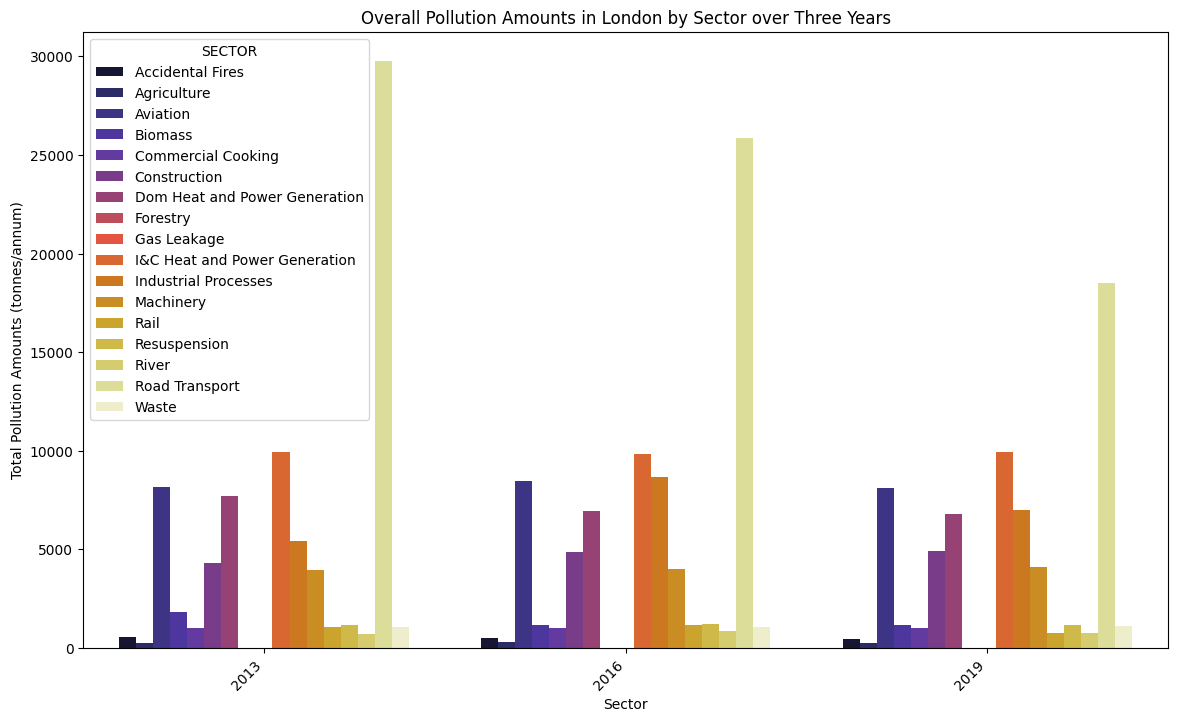

In [98]:
# List of specific pollutants
specific_pollutants = ['NOX', 'N2O', 'CO', 'PM10', 'PM2_5']

# Sum of the concentrations of the specified pollutants for each sector per year
grouped_laei_2019['TOTAL POLLUTION'] = grouped_laei_2019[specific_pollutants].sum(axis=1)
laei_2019_sector = grouped_laei_2019.groupby('SECTOR')['TOTAL POLLUTION'].sum().reset_index()
laei_2019_sector['YEAR'] = 2019

grouped_laei_2016['TOTAL POLLUTION'] = grouped_laei_2016[specific_pollutants].sum(axis=1)
laei_2016_sector = grouped_laei_2016.groupby('SECTOR')['TOTAL POLLUTION'].sum().reset_index()
laei_2016_sector['YEAR'] = 2016

grouped_laei_2013['TOTAL POLLUTION'] = grouped_laei_2013[specific_pollutants].sum(axis=1)
laei_2013_sector = grouped_laei_2013.groupby('SECTOR')['TOTAL POLLUTION'].sum().reset_index()
laei_2013_sector['YEAR'] = 2013


# Combining the data into one dataframe
combined_data = pd.concat([laei_2019_sector, laei_2016_sector, laei_2013_sector])

# Plotting the overall pollution concentrations for each sector per year
plt.figure(figsize=(14, 8))
sns.barplot(x=combined_data['YEAR'], y=combined_data['TOTAL POLLUTION'], hue=combined_data['SECTOR'], palette='CMRmap')
plt.xlabel('Sector')
plt.ylabel('Total Pollution Amounts (tonnes/annum)')
plt.title('Overall Pollution Amounts in London by Sector over Three Years')
plt.xticks(rotation=45, ha='right')
plt.show()


<div class="blue small-padding">
    <strong>Observations</strong>
    <ul>
        <li>The above graph shows that Road Transportation is the major cause of air pollution within London</li>
        <li>Additionally, Heat and Power generation for industry/commercial purposes and Industrial Processes combined also contribute significantly to overall air pollution within London</li>
        <li>Overall, air pollution amounts decreased significantly for Road Transportation between 2013 to 2019</li>
        <li>Unfortunately we do not have access to more up-to-date data to assess if the trend has continued</li>
    </ul>
</div>

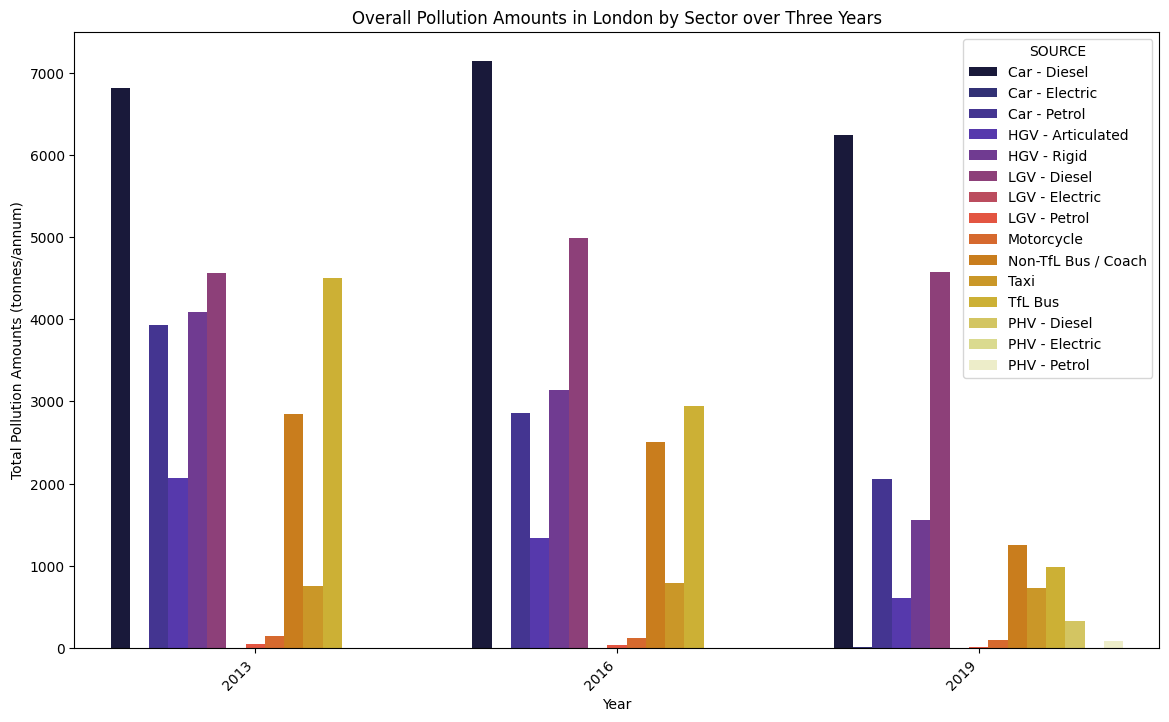

In [99]:
# Sum of the concentrations of the specified pollutants for road transport sources per year
grouped_df_2019 = grouped_laei_2019.groupby(['SECTOR', 'SOURCE']).sum().reset_index()
road_transport_2019 = grouped_df_2019[grouped_df_2019['SECTOR'] == 'Road Transport']
road_transport_2019.loc[:, 'YEAR'] = 2019

grouped_df_2016 = grouped_laei_2016.groupby(['SECTOR', 'SOURCE']).sum().reset_index()
road_transport_2016 = grouped_df_2016[grouped_df_2016['SECTOR'] == 'Road Transport']
road_transport_2016.loc[:, 'YEAR'] = 2016

grouped_df_2013 = grouped_laei_2013.groupby(['SECTOR', 'SOURCE']).sum().reset_index()
road_transport_2013 = grouped_df_2013[grouped_df_2013['SECTOR'] == 'Road Transport']
road_transport_2013.loc[:, 'YEAR'] = 2013

# Combining the data into one dataframe
combined_data = pd.concat([road_transport_2019, road_transport_2016, road_transport_2013])

# Plotting the overall pollution concentrations for each source per year
plt.figure(figsize=(14, 8))
sns.barplot(x=combined_data['YEAR'], y=combined_data['TOTAL POLLUTION'], hue=combined_data['SOURCE'], palette='CMRmap')
plt.xlabel('Year')
plt.ylabel('Total Pollution Amounts (tonnes/annum)')
plt.title('Overall Pollution Amounts in London by Sector over Three Years')
plt.xticks(rotation=45, ha='right')
plt.show()

<div class="blue small-padding">
    <strong>Observations</strong>
    <ul>
        <li>Diesel vehicles were the biggest polluters between 2013 and 2019</li>
        <li>Diesel cars were polluting less in 2019</li>
        <li>More up-to-date data is needed to see if schemes such as ULEZ have helped to reduce this further</li>
        <li>We will use air quality data fro London to assess the impact of ULEZ from 2019 later on</li>
        <li>TFL and non-TFL buses became significantly cleaner over time</li>
    </ul>
</div>

<div class="yellow small-padding">
    <h3>b) What are the biggest sources of air pollution in Hammersmith specifically?</h3>
</div>

In [100]:
# Isolating Hammersmith and Fulham data
hammersmith_fulham_2019 = laei_df[(laei_df['BOROUGH'] == 'Hammersmith and Fulham') & (laei_df['YEAR'] == 2019)]
hammersmith_fulham_2019.head()

,YEAR,BOROUGH,ZONE,MAIN SOURCE CATEGORY,SECTOR,SOURCE,CO,N2O,NOX,PM10,PM2_5,EMISSIONS UNIT
288077,2019,Hammersmith and Fulham,Inner,Domestic,Biomass,Wood Burning,0.0,0.0,0.0,0.024746,0.024746,tonnes/annum
288081,2019,Hammersmith and Fulham,Inner,Domestic,Biomass,Wood Burning,0.0,0.0,0.0,0.003116,0.003116,tonnes/annum
288094,2019,Hammersmith and Fulham,Inner,Domestic,Biomass,Wood Burning,0.0,0.0,0.0,0.655945,0.655945,tonnes/annum
288111,2019,Hammersmith and Fulham,Inner,Domestic,Biomass,Wood Burning,0.0,0.0,0.0,0.385184,0.385184,tonnes/annum
288112,2019,Hammersmith and Fulham,Inner,Domestic,Biomass,Wood Burning,0.0,0.0,0.0,0.279966,0.279966,tonnes/annum


In [101]:
# Creation dataframe for plotting
hammersmith_fulham_2019_copy = hammersmith_fulham_2019.copy()

hammersmith_fulham_2019_copy['TOTAL POLLUTION'] = hammersmith_fulham_2019_copy[specific_pollutants].sum(axis=1)
category_hammersmith_fulham_2019 = hammersmith_fulham_2019_copy.groupby('MAIN SOURCE CATEGORY')['TOTAL POLLUTION'].sum().reset_index()


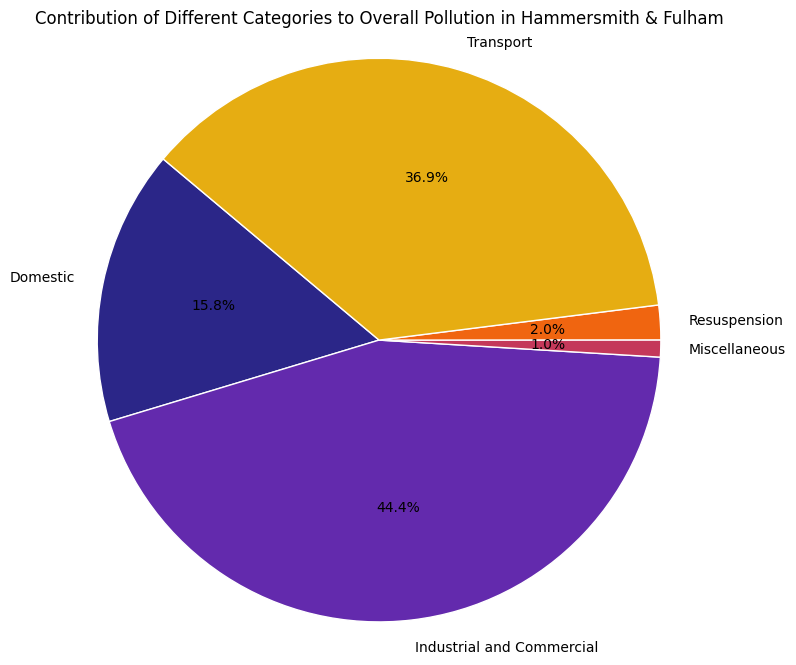

In [102]:
# Create the pie chart to show split of air pollution sources across the main categories
plt.figure(figsize=(8, 8))
palette_color = sns.color_palette('CMRmap') 
plt.pie(category_hammersmith_fulham_2019['TOTAL POLLUTION'], labels=category_hammersmith_fulham_2019['MAIN SOURCE CATEGORY'], autopct='%1.1f%%', startangle=140, 
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'}, colors=palette_color)
plt.title('Contribution of Different Categories to Overall Pollution in Hammersmith & Fulham')
plt.axis('equal')
plt.show()

<div class="blue small-padding">
    <strong>Observations/notes</strong>
    <ul>
        <li>The main sources of air pollution within the borough of Hammersmith & Fulham are Industrial and Commercial sources followed by Transport sources</li>
        <li>See following visualisations for more detail</li>
    </ul>
</div>

<div class="yellow small-padding">
    <h3>c) How are Industrial and Commercial indutries contributing to air pollution?</h3>
</div>

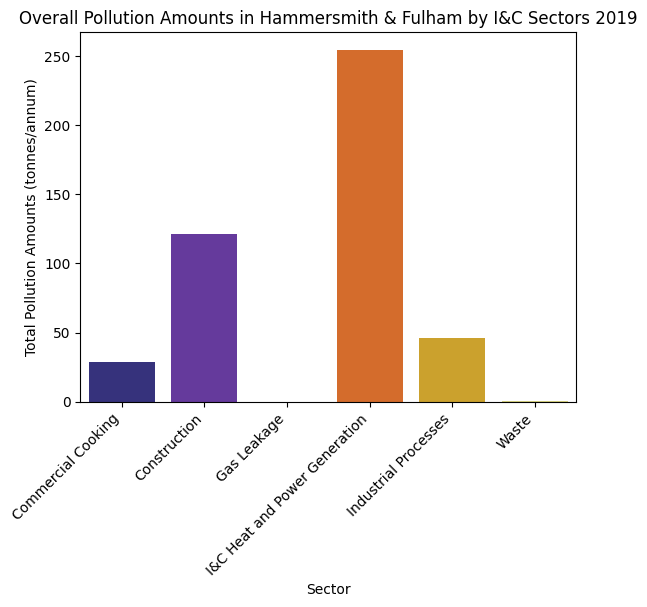

In [103]:
# Creation of dataframe for plotting
IC_hammersmith_fulham_2019 = hammersmith_fulham_2019_copy[hammersmith_fulham_2019_copy['MAIN SOURCE CATEGORY'] == 'Industrial and Commercial']
IC_hammersmith_fulham_sector_2019 = IC_hammersmith_fulham_2019.groupby('SECTOR')['TOTAL POLLUTION'].sum().reset_index()

# Plotting the overall pollution concentrations for each Industrial and Commercial sector
sns.barplot(x=IC_hammersmith_fulham_sector_2019['SECTOR'], y=IC_hammersmith_fulham_sector_2019['TOTAL POLLUTION'], hue=IC_hammersmith_fulham_sector_2019['SECTOR'], palette='CMRmap')
plt.xlabel('Sector')
plt.ylabel('Total Pollution Amounts (tonnes/annum)')
plt.title('Overall Pollution Amounts in Hammersmith & Fulham by I&C Sectors 2019')
plt.xticks(rotation=45, ha='right')
plt.show()

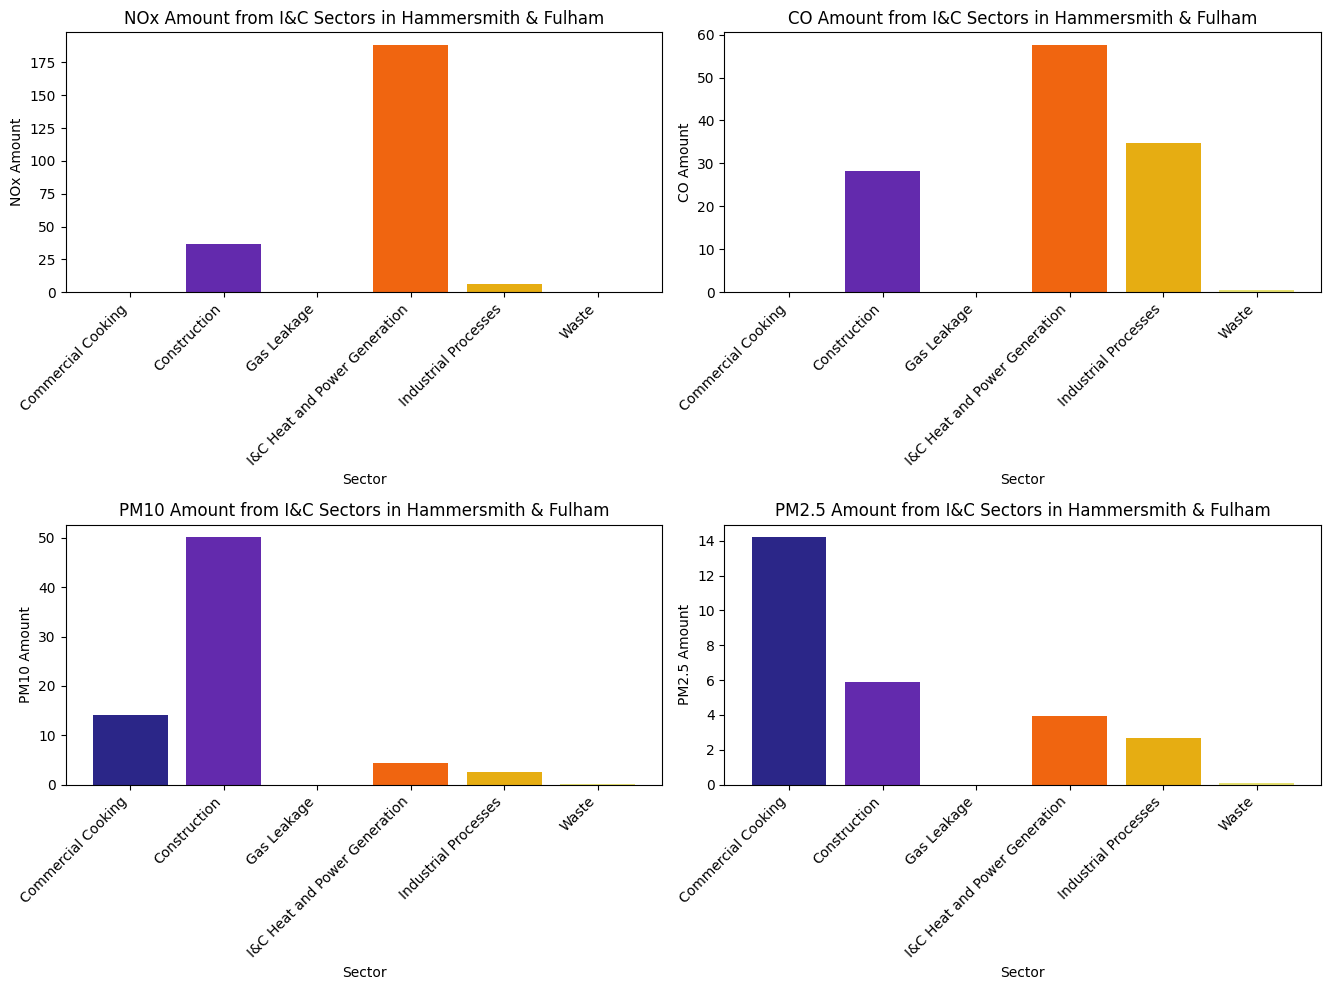

In [104]:
# Creating dataframes to plot on graph
IC_hf_nox_2019 = IC_hammersmith_fulham_2019.groupby('SECTOR')['NOX'].sum().reset_index()
IC_hf_n2o_2019 = IC_hammersmith_fulham_2019.groupby('SECTOR')['N2O'].sum().reset_index()
IC_hf_co_2019 = IC_hammersmith_fulham_2019.groupby('SECTOR')['CO'].sum().reset_index()
IC_hf_pm10_2019 = IC_hammersmith_fulham_2019.groupby('SECTOR')['PM10'].sum().reset_index()
IC_hf_pm2_5_2019 = IC_hammersmith_fulham_2019.groupby('SECTOR')['PM2_5'].sum().reset_index()

plt.figure(figsize=(20, 10))
palette_color = sns.color_palette('CMRmap') 

# Plotting subplots for each pollutant showing production from industrial and commerical sources
plt.subplot(2,3,1)
plt.bar(IC_hf_nox_2019 ['SECTOR'], IC_hf_nox_2019['NOX'], color=palette_color)
plt.xlabel('Sector')
plt.ylabel('NOx Amount')
plt.title('NOx Amount from I&C Sectors in Hammersmith & Fulham')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# plt.subplot(2,3,2)
# plt.bar(IC_hf_n2o_2019 ['SECTOR'], IC_hf_n2o_2019['N2O'], color=palette_color)
# plt.xlabel('Sector')
# plt.ylabel('N2O Amount')
# plt.title('N2O Amount from I&C Sectors in Hammersmith & Fulham')
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()

plt.subplot(2,3,2)
plt.bar(IC_hf_co_2019 ['SECTOR'], IC_hf_co_2019['CO'], color=palette_color)
plt.xlabel('Sector')
plt.ylabel('CO Amount')
plt.title('CO Amount from I&C Sectors in Hammersmith & Fulham')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.subplot(2,3,4)
plt.bar(IC_hf_pm10_2019 ['SECTOR'], IC_hf_pm10_2019['PM10'], color=palette_color)
plt.xlabel('Sector')
plt.ylabel('PM10 Amount')
plt.title('PM10 Amount from I&C Sectors in Hammersmith & Fulham')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.subplot(2,3,5)
plt.bar(IC_hf_pm2_5_2019 ['SECTOR'], IC_hf_pm2_5_2019['PM2_5'], color=palette_color)
plt.xlabel('Sector')
plt.ylabel('PM2.5 Amount')
plt.title('PM2.5 Amount from I&C Sectors in Hammersmith & Fulham')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

<div class="blue small-padding">
    <strong>Observations</strong>
    <ul>
        <li>Heat and Power generation is a huge source of nitrogen oxides (NO and NO2) in this borough as well as other pollutants such as carbon monoxide</li>
        <li>PM2.5 is mostly being produced from commercial cooking and PM10 from construction</li>
    </ul>
</div>

<div class="yellow small-padding">
    <h3>d) What are the most polluting vehicle types?</h3>
</div>

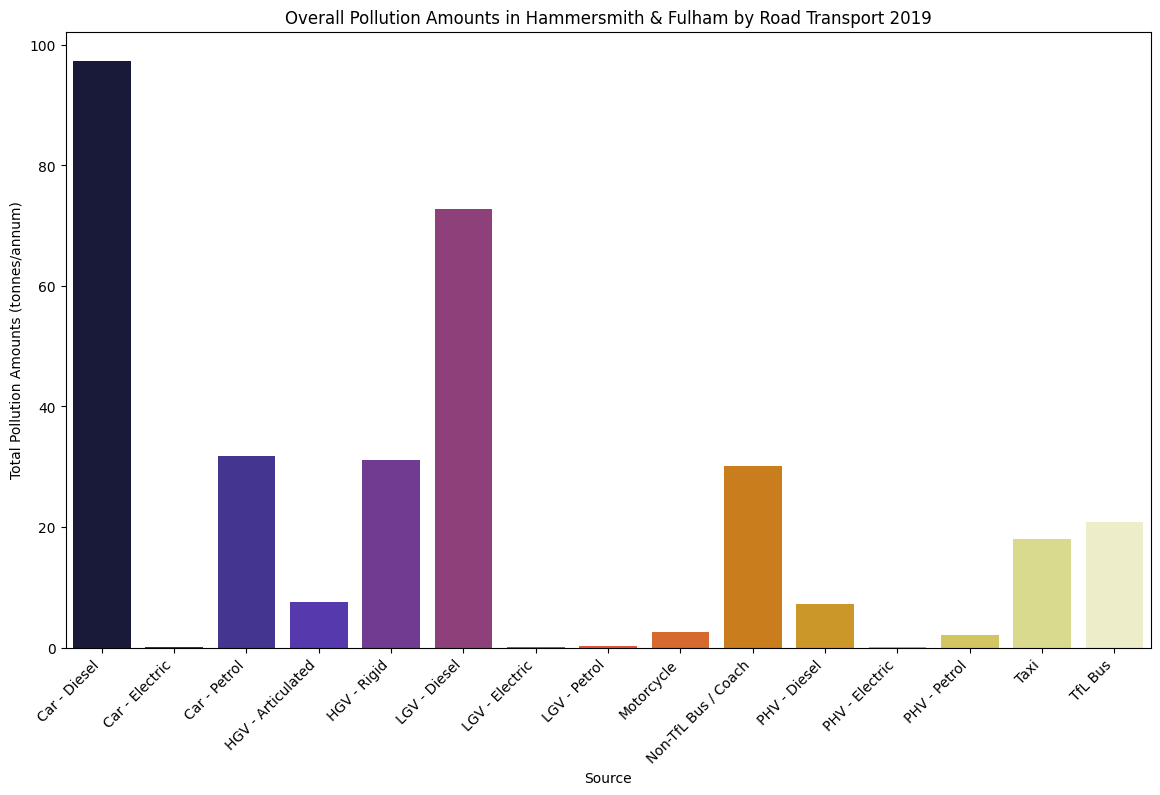

In [105]:
# Creation of dataframe for plotting
road_hammersmith_fulham_2019 = hammersmith_fulham_2019_copy[hammersmith_fulham_2019_copy['SECTOR'] == 'Road Transport']
road_hammersmith_fulham_source_2019 = road_hammersmith_fulham_2019.groupby('SOURCE')['TOTAL POLLUTION'].sum().reset_index()

# Plotting the overall pollution concentrations for each Industrial and Commercial sector
plt.figure(figsize=(14, 8))
sns.barplot(x=road_hammersmith_fulham_source_2019['SOURCE'], y=road_hammersmith_fulham_source_2019['TOTAL POLLUTION'], hue=road_hammersmith_fulham_source_2019['SOURCE'], palette='CMRmap')
plt.xlabel('Source')
plt.ylabel('Total Pollution Amounts (tonnes/annum)')
plt.title('Overall Pollution Amounts in Hammersmith & Fulham by Road Transport 2019')
plt.xticks(rotation=45, ha='right')
plt.show()

<div class="blue small-padding">
    <strong>Observations</strong>
    <ul>
        <li>Diesel vehicles (carsa dn LGVs) were the biggest polluters in Hammersmith which is consistent with data for Greater London</li>
        <li>TFL buses are polluting less than non-TFL buses and coaches</li>
        <li>Although much cleaner than diesel cars, petrol cars still produce over 30 tonnes of pollution per year</li>
        <li>HGVs collectively produce approcimately 40 tonnes per year.</li>
    </ul>
</div>

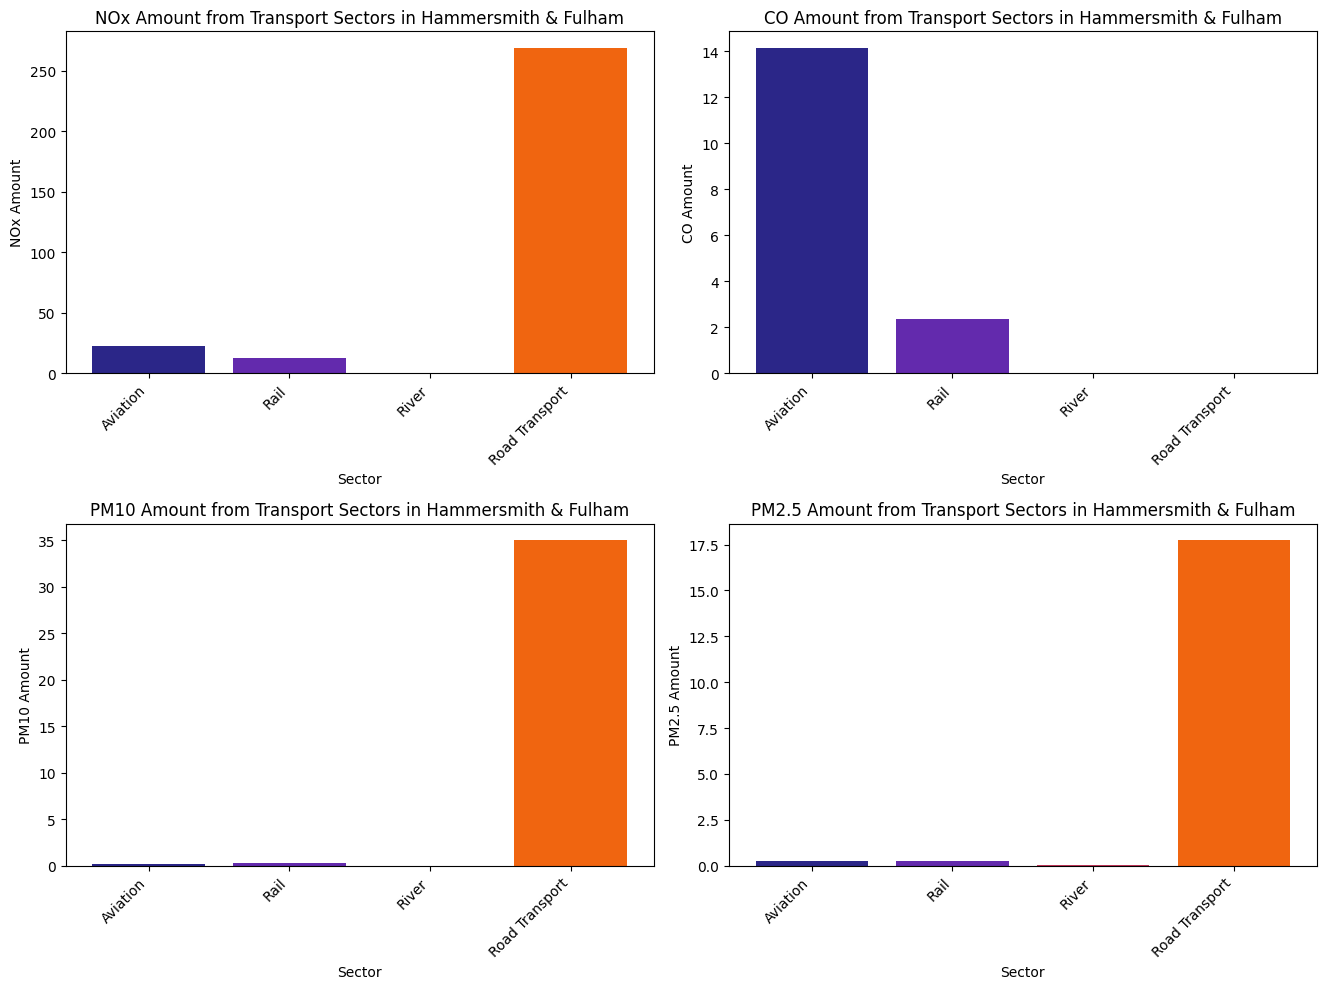

In [106]:
# Filtering data
transport_hammersmith_fulham_2019 = hammersmith_fulham_2019_copy[hammersmith_fulham_2019_copy['MAIN SOURCE CATEGORY'] == 'Transport']
transport_hammersmith_fulham_source_2019 = transport_hammersmith_fulham_2019.groupby('SECTOR')['TOTAL POLLUTION'].sum().reset_index()

# Creating dataframes to plot graphs
transport_hf_nox_2019 = transport_hammersmith_fulham_2019.groupby('SECTOR')['NOX'].sum().reset_index()
transport_hf_n2o_2019 = transport_hammersmith_fulham_2019.groupby('SECTOR')['N2O'].sum().reset_index()
transport_hf_co_2019 = transport_hammersmith_fulham_2019.groupby('SECTOR')['CO'].sum().reset_index()
transport_hf_pm10_2019 = transport_hammersmith_fulham_2019.groupby('SECTOR')['PM10'].sum().reset_index()
transport_hf_pm2_5_2019 = transport_hammersmith_fulham_2019.groupby('SECTOR')['PM2_5'].sum().reset_index()

plt.figure(figsize=(20, 10))
palette_color = sns.color_palette('CMRmap') 

# Plotting subplots for each pollutant showing production from transport sources
plt.subplot(2,3,1)
plt.bar(transport_hf_nox_2019 ['SECTOR'], transport_hf_nox_2019['NOX'], color=palette_color)
plt.xlabel('Sector')
plt.ylabel('NOx Amount')
plt.title('NOx Amount from Transport Sectors in Hammersmith & Fulham')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# plt.subplot(2,3,2)
# plt.bar(transport_hf_n2o_2019 ['SECTOR'], transport_hf_n2o_2019['N2O'], color=palette_color)
# plt.xlabel('Sector')
# plt.ylabel('N2O Amount')
# plt.title('N2O Amount from Transport Sectors in Hammersmith & Fulham')
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()

plt.subplot(2,3,2)
plt.bar(transport_hf_co_2019 ['SECTOR'], transport_hf_co_2019['CO'], color=palette_color)
plt.xlabel('Sector')
plt.ylabel('CO Amount')
plt.title('CO Amount from Transport Sectors in Hammersmith & Fulham')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.subplot(2,3,4)
plt.bar(transport_hf_pm10_2019 ['SECTOR'], transport_hf_pm10_2019['PM10'], color=palette_color)
plt.xlabel('Sector')
plt.ylabel('PM10 Amount')
plt.title('PM10 Amount from Transport Sectors in Hammersmith & Fulham')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.subplot(2,3,5)
plt.bar(transport_hf_pm2_5_2019 ['SECTOR'], transport_hf_pm2_5_2019['PM2_5'], color=palette_color)
plt.xlabel('Sector')
plt.ylabel('PM2.5 Amount')
plt.title('PM2.5 Amount from Transport Sectors in Hammersmith & Fulham')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()



<div class="blue small-padding">
    <strong>Observations</strong>
    <ul>
        <li>Road transport is by far the biggest producer of air pollutants</li>
        <li>Rail is much cleaner than road travel- how can this be used more?</li>
        <li>Although aviation is a big producer of carbon monoxide which has an impact on greenhouse gases, it is not a big producer of air pollutants such as PM2.5 AND PM10. It produces a small amount of nitrogen oxides.</li>
    </ul>
</div>

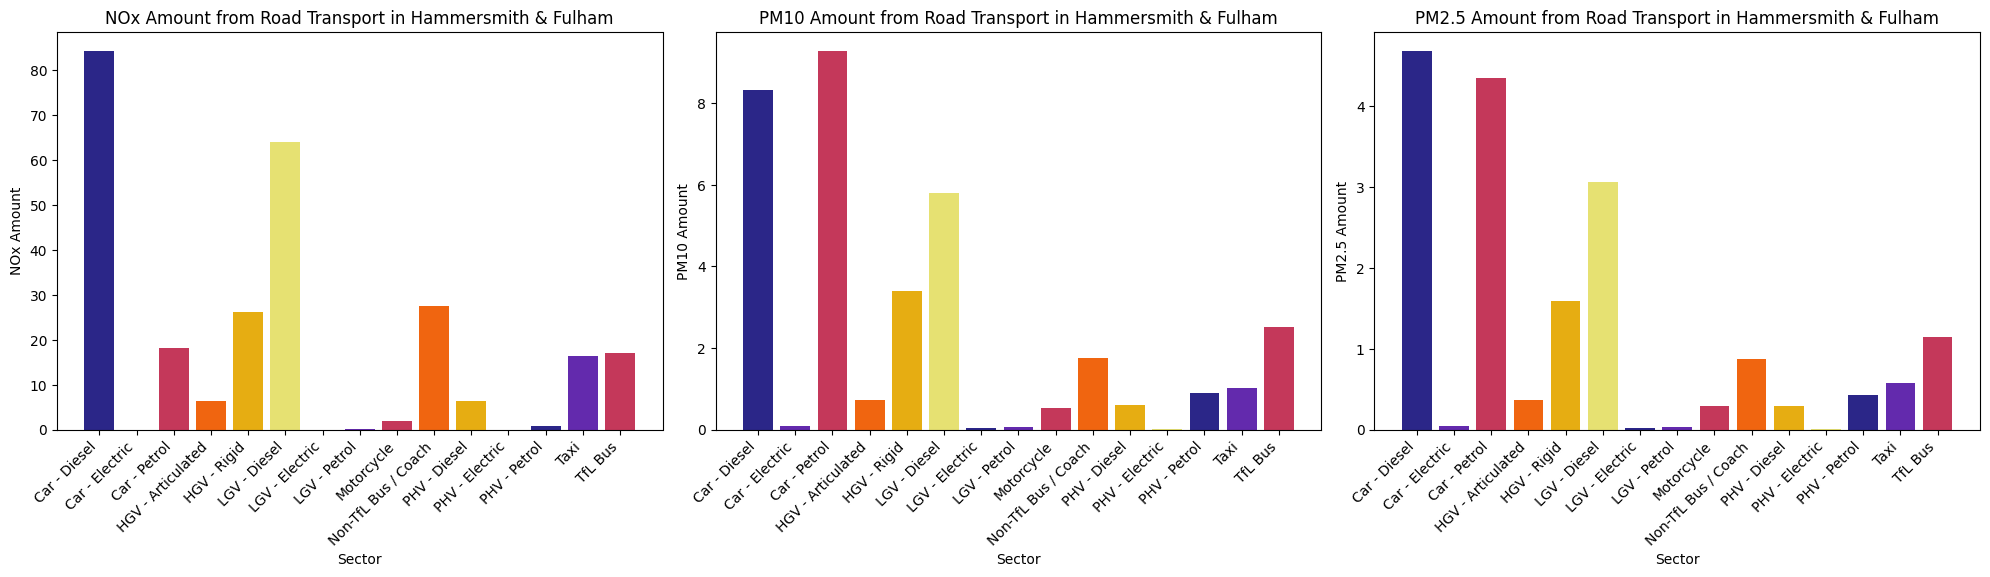

In [107]:
# Creating dataframes to plot graph
road_hf_nox_2019 = road_hammersmith_fulham_2019.groupby('SOURCE')['NOX'].sum().reset_index()
road_hf_n2o_2019 = road_hammersmith_fulham_2019.groupby('SOURCE')['N2O'].sum().reset_index()
road_hf_co_2019 = road_hammersmith_fulham_2019.groupby('SOURCE')['CO'].sum().reset_index()
road_hf_pm10_2019 = road_hammersmith_fulham_2019.groupby('SOURCE')['PM10'].sum().reset_index()
road_hf_pm2_5_2019 = road_hammersmith_fulham_2019.groupby('SOURCE')['PM2_5'].sum().reset_index()


plt.figure(figsize=(20, 10))
palette_color = sns.color_palette('CMRmap') 

# Plotting subplots for each pollutant showing production from road transport sources
plt.subplot(2,3,1)
plt.bar(road_hf_nox_2019['SOURCE'], road_hf_nox_2019['NOX'], color=palette_color)
plt.xlabel('Sector')
plt.ylabel('NOx Amount')
plt.title('NOx Amount from Road Transport in Hammersmith & Fulham')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# plt.subplot(2,3,2)
# plt.bar(road_hf_n2o_2019['SOURCE'], road_hf_n2o_2019['N2O'], color=palette_color)
# plt.xlabel('Sector')
# plt.ylabel('N2O Amount')
# plt.title('N2O Amount from Road Transport in Hammersmith & Fulham')
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()

# plt.subplot(2,3,3)
# plt.bar(road_hf_co_2019['SOURCE'], road_hf_co_2019['CO'], color=palette_color)
# plt.xlabel('Sector')
# plt.ylabel('CO Amount')
# plt.title('CO Amount from Road Transport in Hammersmith & Fulham')
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()

plt.subplot(2,3,2)
plt.bar(road_hf_pm10_2019['SOURCE'], road_hf_pm10_2019['PM10'], color=palette_color)
plt.xlabel('Sector')
plt.ylabel('PM10 Amount')
plt.title('PM10 Amount from Road Transport in Hammersmith & Fulham')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.subplot(2,3,3)
plt.bar(road_hf_pm2_5_2019['SOURCE'], road_hf_pm2_5_2019['PM2_5'], color=palette_color)
plt.xlabel('Sector')
plt.ylabel('PM2.5 Amount')
plt.title('PM2.5 Amount from Road Transport in Hammersmith & Fulham')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


<div class="blue small-padding">
    <strong>Observations</strong>
    <ul>
        <li>Although petrol cars produce less nitrogen oxides than diesel cars, they are a big contributor of particulate matter (PM10 and PM2.5)</li>
    </ul>
</div>

<div class="yellow small-padding">
    <h3>e) Is there a correlation between weather and levels of pollutants?</h3>
</div>

<div class="blue small-padding">
    <strong>Notes</strong>
    <ul>
        <li>Data from weather_aq and weather_aq_AQE is taken from a location with a busy road that is near a number of schools</li>
        <li>weather_aq is a merge of API data for air quality and weather</li>
        <li>weather_aq_AQE is a merge of Air Quality England (AQE) data on air quality and API weather data</li>
        <li>The data from AQE is verified and is collected from a measuring station. API data is taken from satellites</li>
        <li>AQE data should therefore be more reliable, however it originally contained a large amount of NaN values which had to be filled</li>
        <li>The following visualisations will compare both sets of data and check for patterns</li>
    </ul>
</div>

In [108]:
print(weather_aq.columns)
print(weather_aq_AQE.columns)

Index(['date_time', 'aqi', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10',
       'nh3', 'temp_C', 'percent_humidity', 'precipitation', 'rain',
       'snowfall', 'surface_pressure', 'wind_speed_10m', 'wind_speed_100m',
       'wind_direction', 'day', 'month', 'hour'],
      dtype='object')
Index(['date_time', 'PM10', 'NO', 'NO2', 'NOXasNO2', 'O3', 'PM25', 'time',
       'temp_C', 'percent_humidity', 'precipitation', 'rain', 'snowfall',
       'surface_pressure', 'wind_speed_10m', 'wind_speed_100m',
       'wind_direction', 'day', 'month', 'hour'],
      dtype='object')


In [109]:
heatmap_1 = ['no2', 'o3', 'pm2_5', 'pm10', 'temp_C', 'percent_humidity', 'precipitation', 'surface_pressure', 'wind_speed_10m']
heatmap_2 = ['NO2', 'O3', 'PM25', 'PM10','temp_C', 'percent_humidity', 'precipitation', 'surface_pressure', 'wind_speed_10m']

<Axes: >

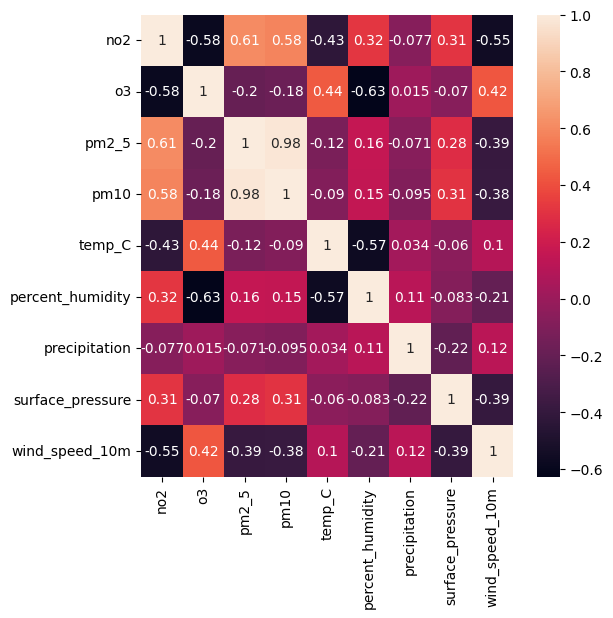

In [110]:
# Correlation between API air quality data and weather data
heatmap_data = weather_aq[heatmap_1]
plt.figure(figsize = (6,6))
correlation_matrix = heatmap_data.corr()
sns.heatmap(data = correlation_matrix, annot = True)

<Axes: >

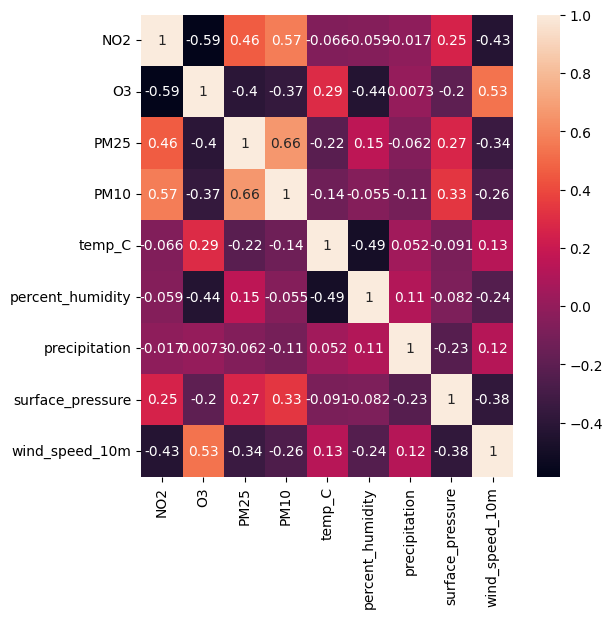

In [111]:
# Correlation between AQE air quality data and weather data
heatmap_data = weather_aq_AQE[heatmap_2]
plt.figure(figsize = (6,6))
correlation_matrix = heatmap_data.corr()
sns.heatmap(data = correlation_matrix, annot = True)

<div class="blue small-padding">
    <strong>Observations</strong>
    <ul>
        <li>Both sets of data show a correlation between levels of no2, pm2.5 and pm10</li>
        <li>There is a negative correlation between o3 and other pollutants</li>
        <li>Both sets of data show a negative correlation between humidity and o3</li>
        <li>Boths sets of data show a negative correlation between wind speed and no2, pm2.5 and pm10</li>
        <li>API data shows a negative correlation between temperature and no2 but this cannot be seen in the Air Quality England data set</li>
        <li>There is no correlation between other weather types and pollutants</li>
    </ul>
</div>

<div class="yellow small-padding">
    <h3>f) Does time of day affect levels of pollutants?</h3>
</div>

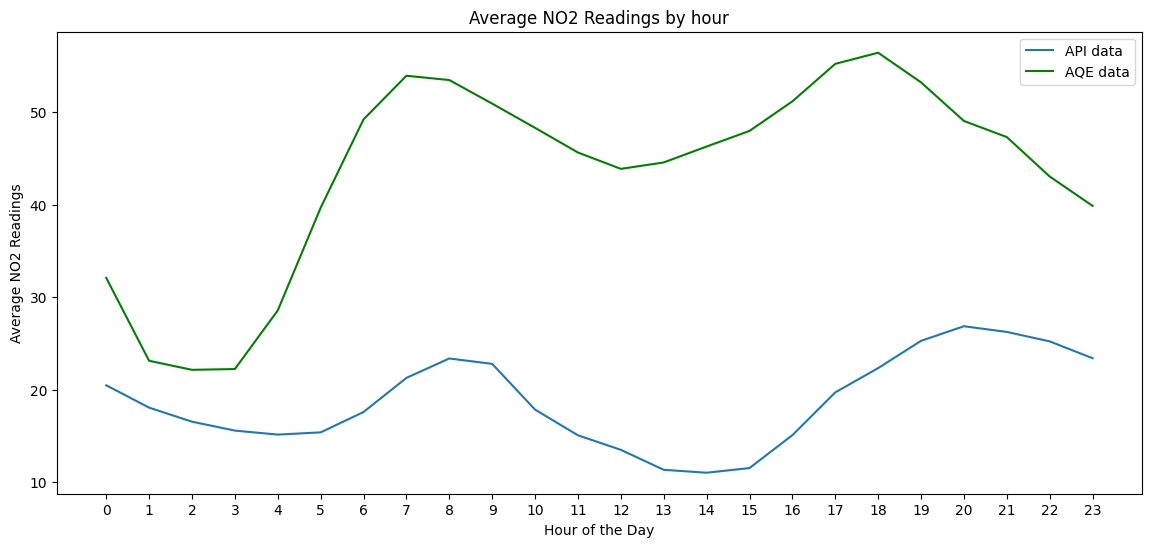

In [112]:
# NO2 data
average_by_hour = weather_aq.groupby('hour').no2.mean().to_frame()
average_by_hour_2 = weather_aq_AQE.groupby('hour').NO2.mean().to_frame()
x = average_by_hour.index.tolist()
y = average_by_hour.no2.tolist()
y_2 = average_by_hour_2.NO2.tolist()
plt.figure(figsize=(14, 6))
plt.plot(x, y, label='API data')
plt.plot(x,y_2, color='green', label='AQE data')
plt.xticks(ticks=x, labels=[str(hour) for hour in x])

plt.xlabel('Hour of the Day')
plt.ylabel('Average NO2 Readings')
plt.title('Average NO2 Readings by hour')
plt.legend()
# Show plot
plt.show()

<div class="blue small-padding">
    <strong>Observations</strong>
    <ul>
        <li>Average readings from AQE are much higher than API data</li>
        <li>Both sets of data show a fall in pollutant levels between midnight and 4am and another smaller dip between approx. 9am and approx. 3pm</li>
        <li>The lowest levels during waking hours are at spprox. 1pm</li>
        <li>There are two peaks in levels at approx. 7-8am and 5-6pm, in line with rush hour times.</li>
        <li>The Air Quality England data shows that levels are above the UK target of 40µg/m3 for NO2 between 5am and midnight</li>
    </ul>
</div>

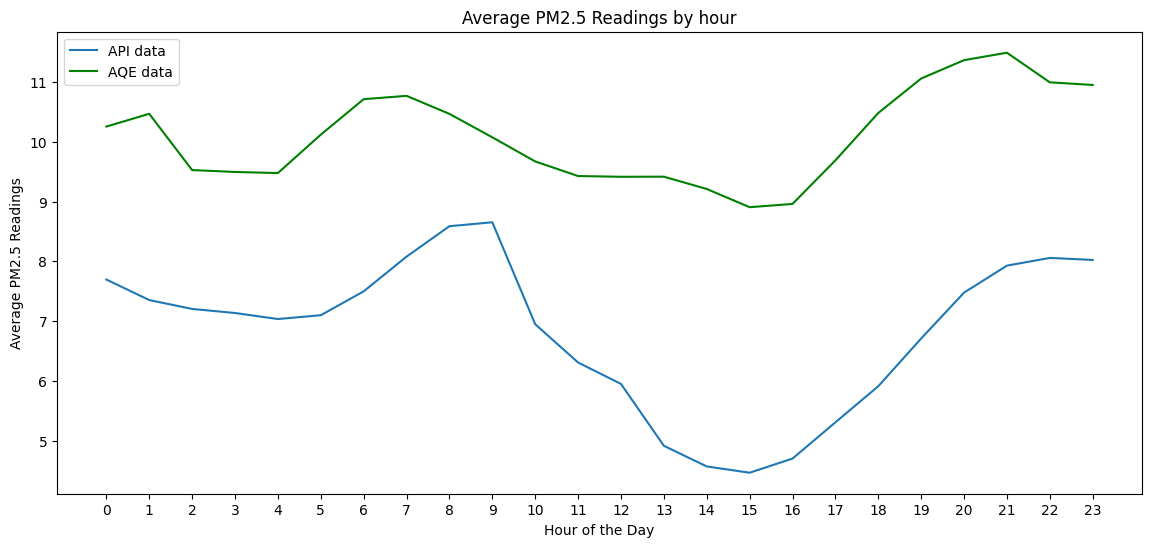

In [113]:
# pm2.5 data
average_by_hour = weather_aq.groupby('hour').pm2_5.mean().to_frame()
average_by_hour_2 = weather_aq_AQE.groupby('hour').PM25.mean().to_frame()
x = average_by_hour.index.tolist()
y = average_by_hour.pm2_5.tolist()
y_2 = average_by_hour_2.PM25.tolist()
plt.figure(figsize=(14, 6))
plt.plot(x, y, label="API data")
plt.plot(x, y_2, color='green', label="AQE data")
plt.xticks(ticks=x, labels=[str(hour) for hour in x])

plt.xlabel('Hour of the Day')
plt.ylabel('Average PM2.5 Readings')
plt.title('Average PM2.5 Readings by hour')
plt.legend()
# Show plot
plt.show()

<div class="blue small-padding">
    <strong>Observations</strong>
    <ul>
        <li>Levels of PM2.5 follow a similar pattern to NO2</li>
        <li>Pollutant levels are again much higher accoridng to the AQE data</li>
        <li>According to AQE data there is a more prolonged, less significant fall in levels between 7am and 4pms</li>
        <li>These levels meet current Air Quality objective of 20µg/m3 but exceed target of 10µg/m3 at multiple times of day</li>
    </ul>
</div>

<div class="yellow small-padding">
    <h3>g) Are levels of pollutants different at different times of year?</h3>
</div>

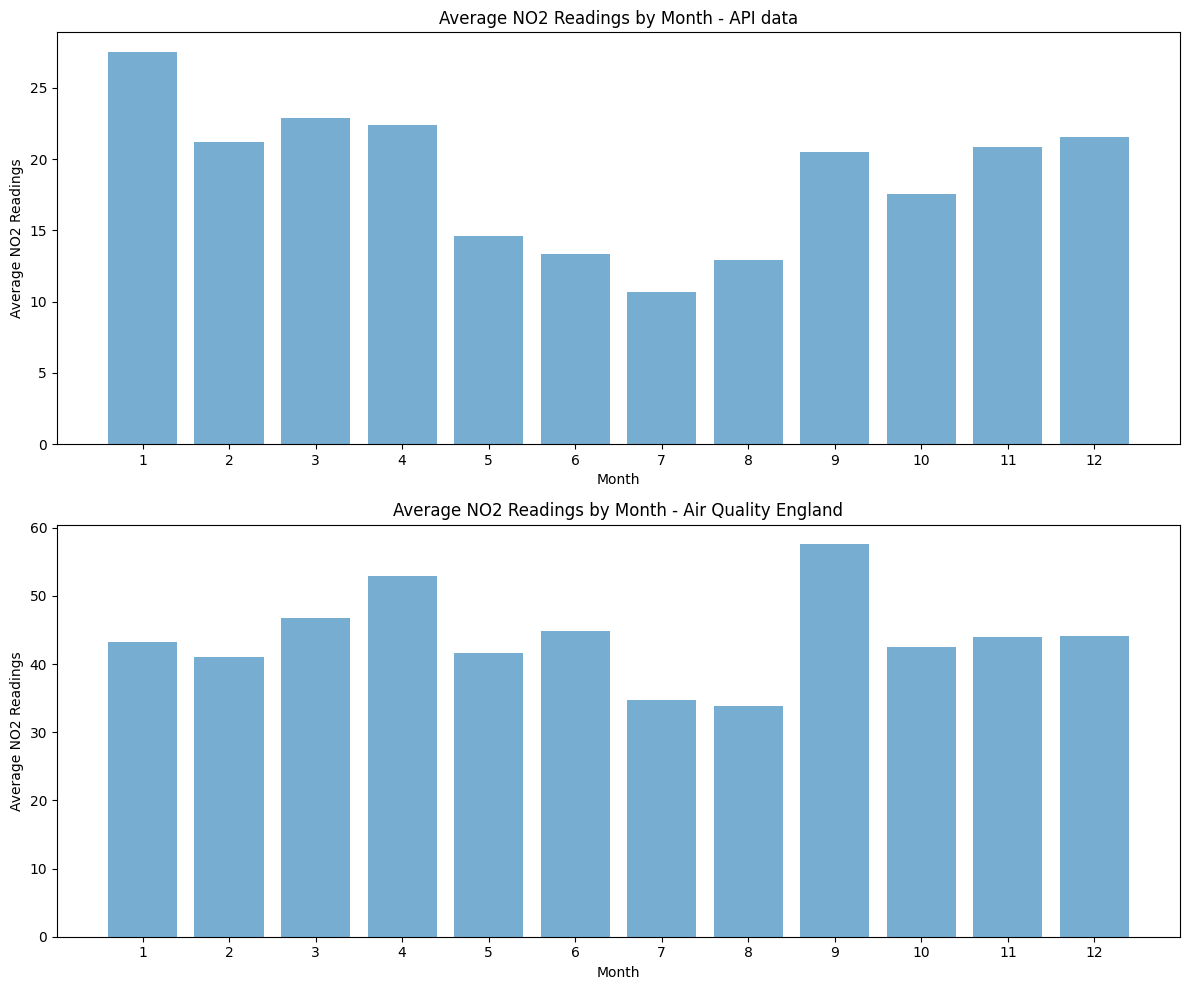

In [114]:
# NO2 data
average_by_month = weather_aq.groupby('month').no2.mean().to_frame()
average_by_month_2 = weather_aq_AQE.groupby('month').NO2.mean().to_frame()
x = average_by_month.index.tolist()
y = average_by_month.no2.tolist()
y_2 = average_by_month_2.NO2.tolist()
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

# Plot the first bar chart
axs[0].bar(x, y, alpha=0.6)
axs[0].set_xticks(x)
axs[0].set_xticklabels([str(month) for month in x])
axs[0].set_xlabel('Month')
axs[0].set_ylabel('Average NO2 Readings')
axs[0].set_title('Average NO2 Readings by Month - API data')

# Plot the second bar chart
axs[1].bar(x, y_2, alpha=0.6)
axs[1].set_xticks(x)
axs[1].set_xticklabels([str(month) for month in x])
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Average NO2 Readings')
axs[1].set_title('Average NO2 Readings by Month - Air Quality England')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

<div class="blue small-padding">
    <strong>Observations</strong>
    <ul>
        <li>Both sets of data show a dip in the summer months July-August though this is less pronounced in the AQE data</li>
        <li>AQE data shows that NO2 levels are highest on average in September and also high in April</li>
    </ul>
</div>

<div class="yellow small-padding">
    <h3>h) Are levels of pollutants different on different days?</h3>
</div>

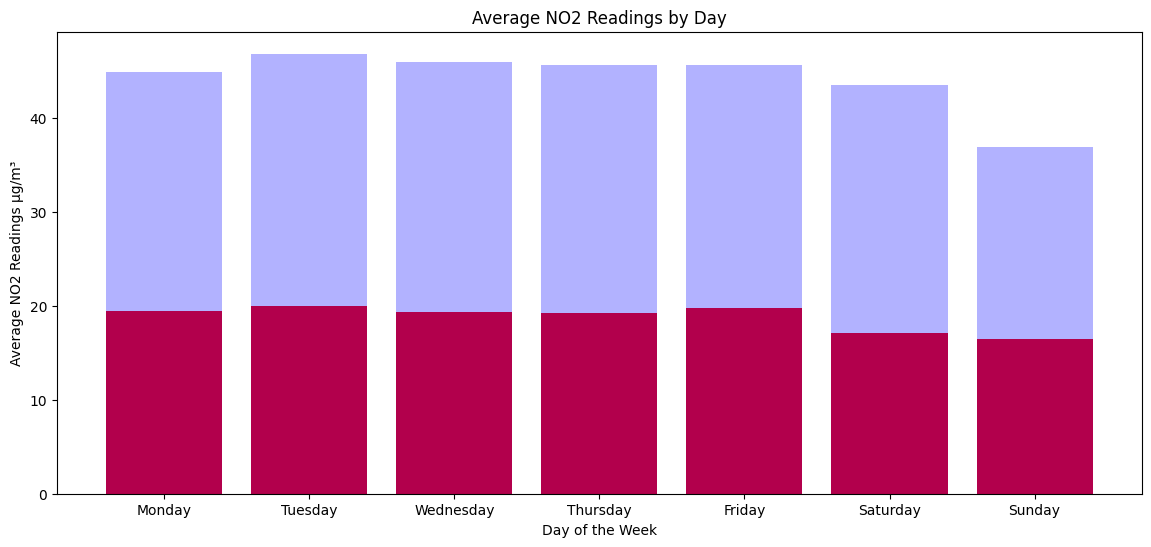

In [115]:
average_no2_by_day = weather_aq.groupby('day').no2.mean().to_frame()
average_no2_by_day_AQE = weather_aq_AQE.groupby('day').NO2.mean().to_frame()
x = average_no2_by_day.index.tolist()
y = average_no2_by_day.no2.tolist()
y_2 = average_no2_by_day_AQE.NO2.tolist()

plt.figure(figsize=(14, 6))
plt.bar(x, y, color='red')
plt.bar(x, y_2, color='blue', alpha=0.3)
plt.xticks(ticks=x, labels=['Monday','Tuesday','Wednesday', 'Thursday','Friday','Saturday','Sunday'])

plt.xlabel('Day of the Week')
plt.ylabel('Average NO2 Readings μg/m³')
plt.title('Average NO2 Readings by Day')


plt.show()

<div class="blue small-padding">
    <strong>Observations</strong>
    <ul>
        <li>Both data sets agree that there is a higher level of NO2 throughout the week and a dip at weekends</li>
        <li>NO2 levels are at their lowest on Sundays</li>
        <li>NO2 levels are at their highest on Tuesdays but are of similar levels throughout the week</li>
        <li>NO2 levels are above the 40μg/m³ yearly mean target from Monday-Saturday according to AQE data</li>
    </ul>
</div>

<div class="yellow small-padding">
    <h3>i) How does location impact levels of pollutants across London?</h3>
</div>

<div class="blue extra-padding">
    <strong>Notes</strong>
<p>This dataset focuses on the average concentration levels of NO2(nitrogen dioxide) per month, across each London Borough.</p> 
<strong>The following describes the dataset columns:</strong> 
    <ul>
        <li>Borough: Which London borough the record pertains to</li>
        <li>Outer/Inner: Whether the Borough is an inner city Borough, or outer city Borough.</li>
        <li>Number of sites: How many different places within the Borough have a diffusion tube placed</li>
        <li>Exceeding legal limit (40ugm-3): The UK legal limit for concentration levels of NO2 is 40ugm-3(micrograms per cubic metre of air), this is how many sites have exceeded this per Borough</li>
        <li>% exceeding legal limit: The percentage of sites in the Borough which are exceeding 40ugm-3</li>
        <li>Exceeding WHO Guideline (10 ugm-3): The World Health Organisation'\s recommended limit is 10 ugm-3, this is how many sites have exceeded this per Borough</li>
        <li>% exceeding WHO guideline: The percentage of sites in the Borough which are exceeding 10ugm-3</li>
        <li>Average Concentration Roadside: The tubes are placed either roadside or more surburban / background areas, this shows the average per Roadside within the Borough</li>
        <li>Average Concentration Background: this shows the average per Background within the Borough</li>
    </ul>
Data from [Air Quality Monitoring - Diffusion Tube Results](https://data.london.gov.uk/dataset/air-quality-monitoring-diffusion-tube-results)
</div>

In [205]:
ld_2022_all = pd.read_csv('data_clean/diffusion_tube_data.csv')
ld_2022_all.head()

,Borough,Outer/Inner,Number of sites,exceed_legal_limit(40ugm-3),percent_exceed_legal_limit,exceed_who_limit(10ugm-3),percent_exceed_who_limit,AVG_Concentration_roadside,AVG_Concentration_background
0,Barking and Dagenham,Outer,28.0,0.0,0.000000,28.0,1.0,29.416667,13.516667
1,Barnet,Outer,15.0,1.0,0.066667,15.0,1.0,29.163695,29.450257
2,Brent,Outer,45.0,12.0,0.266667,45.0,1.0,35.493023,25.150000
3,Bromley,Outer,32.0,1.0,0.031250,32.0,1.0,24.671875,15.117188
4,Camden,Inner,241.0,10.0,0.041494,241.0,1.0,25.636387,19.823333


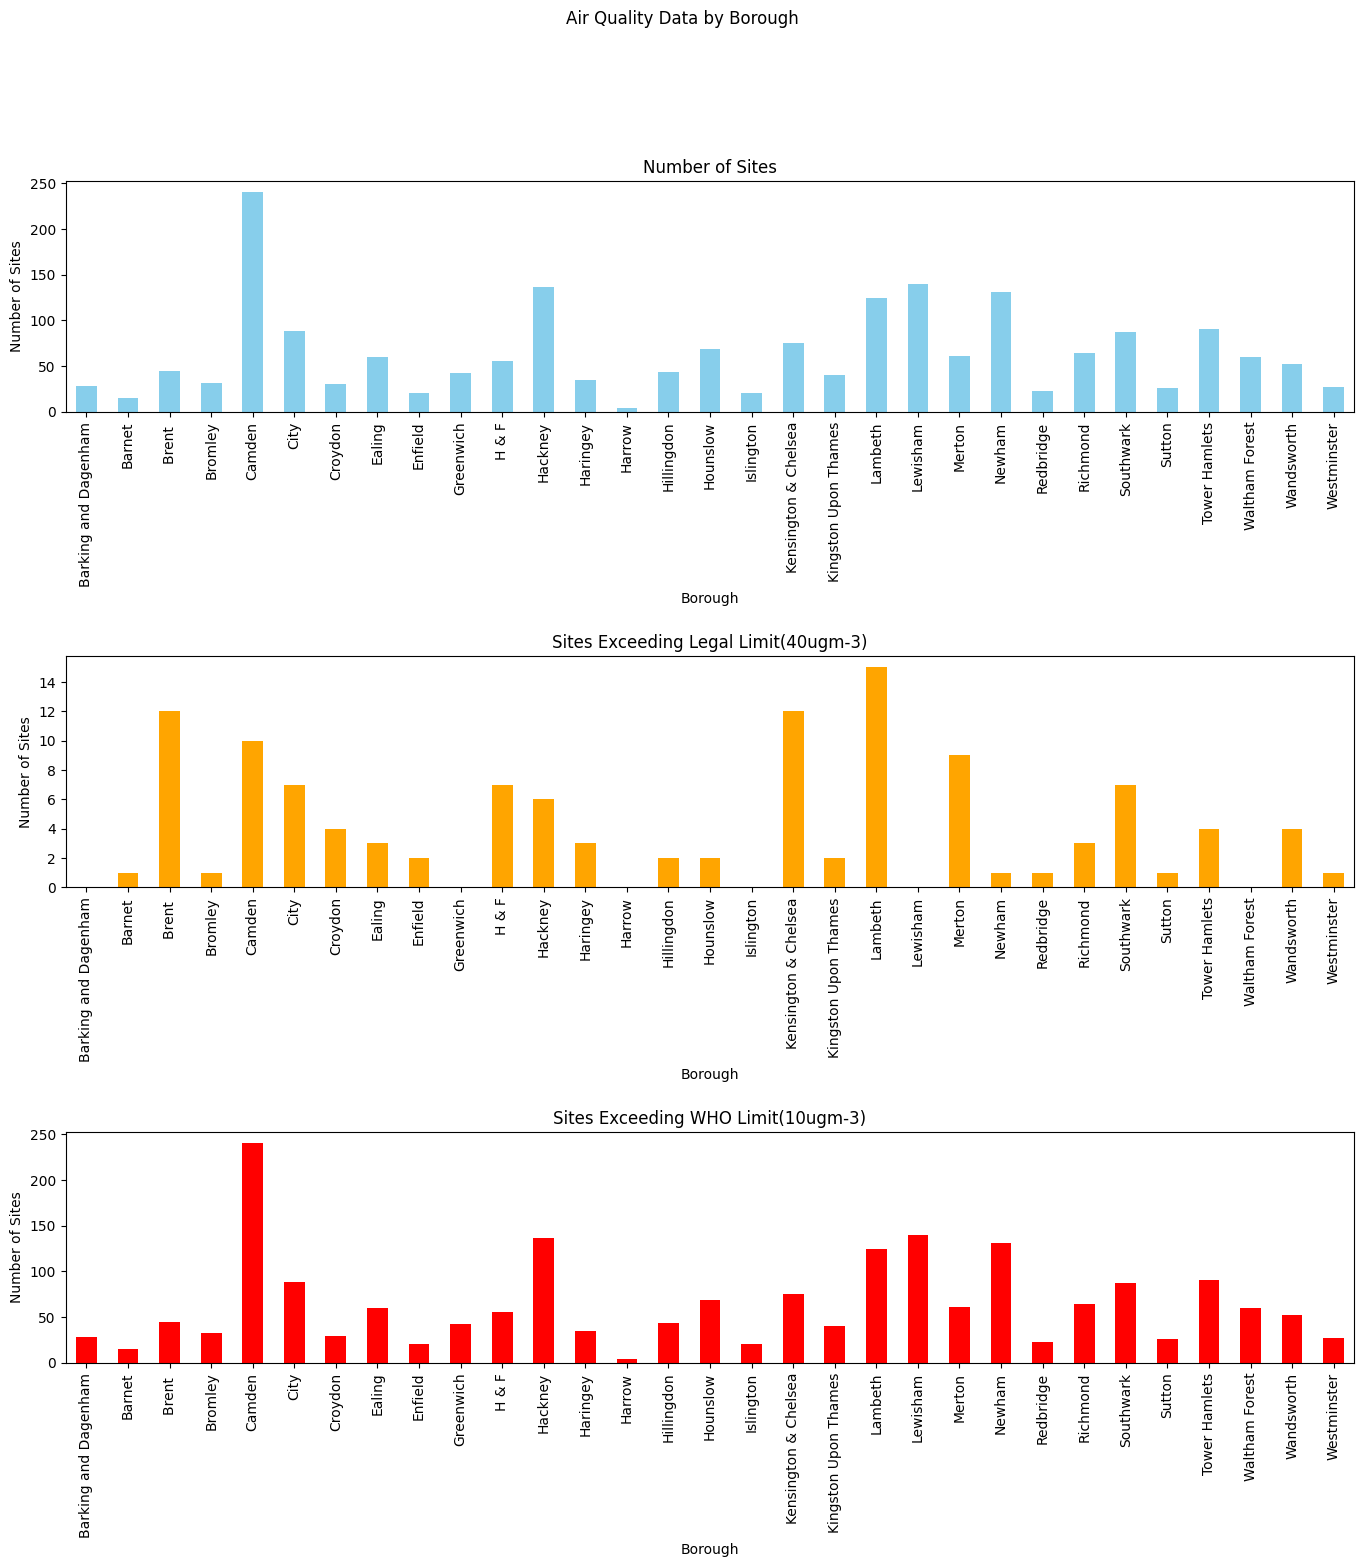

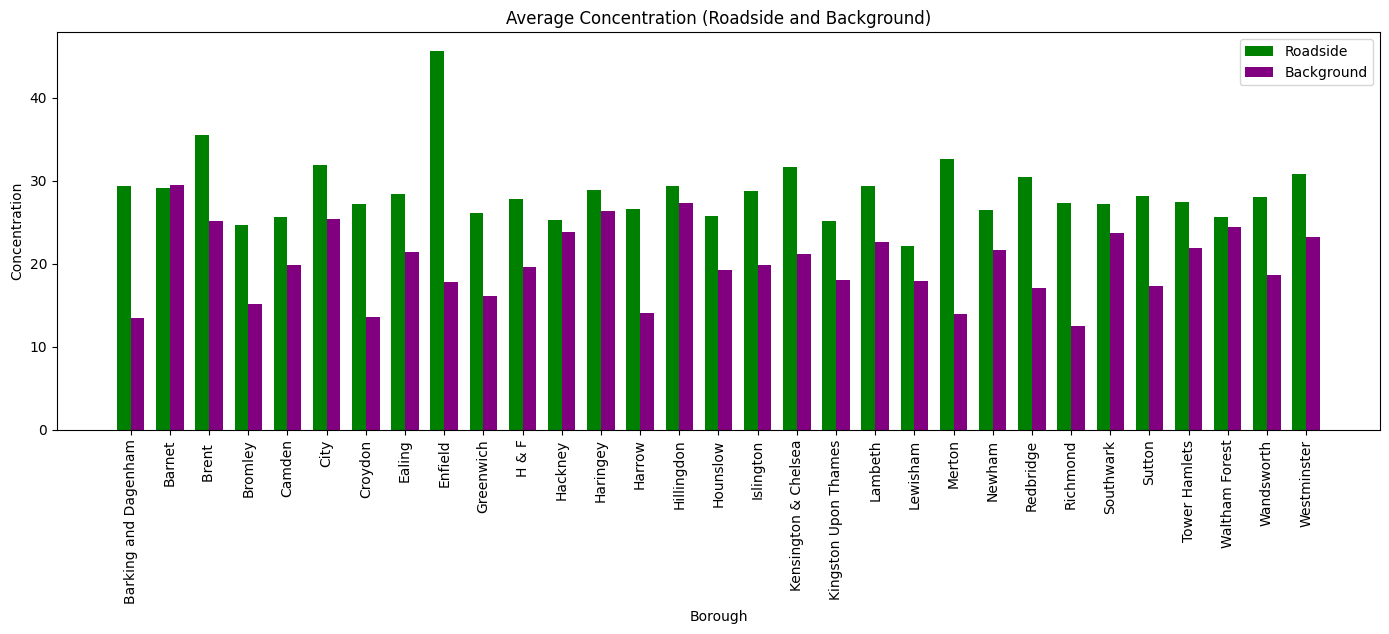

In [206]:
fig, axes = plt.subplots(3, 1, figsize=(14, 15))
fig.suptitle('Air Quality Data by Borough', y=1.05)

# Number of sites
ld_2022_all.plot(x='Borough', y='Number of sites', kind='bar', ax=axes[0], color='skyblue', legend=False)
axes[0].set_title('Number of Sites')
axes[0].set_ylabel('Number of Sites')
axes[0].set_xlabel('Borough')

# Exceed Legal Limit
ld_2022_all.plot(x='Borough', y='exceed_legal_limit(40ugm-3)', kind='bar', ax=axes[1], color='orange', legend=False)
axes[1].set_title('Sites Exceeding Legal Limit(40ugm-3)')
axes[1].set_ylabel('Number of Sites')
axes[1].set_xlabel('Borough')

# Exceed WHO Limit
ld_2022_all.plot(x='Borough', y='exceed_who_limit(10ugm-3)', kind='bar', ax=axes[2], color='red', legend=False)
axes[2].set_title('Sites Exceeding WHO Limit(10ugm-3)')
axes[2].set_ylabel('Number of Sites')
axes[2].set_xlabel('Borough')

fig.tight_layout(pad=2.0)

# Average Concentration Roadside and Background
fig, ax = plt.subplots(figsize=(14, 7))
width = 0.35
ind = pd.RangeIndex(len(ld_2022_all))
ax.bar(ind - width/2, ld_2022_all["AVG_Concentration_roadside"], width, label='Roadside', color='green')
ax.bar(ind + width/2, ld_2022_all["AVG_Concentration_background"], width, label='Background', color='purple')
ax.set_title('Average Concentration (Roadside and Background)')
ax.set_ylabel('Concentration')
ax.set_xlabel('Borough')
ax.set_xticks(ind)
ax.set_xticklabels(ld_2022_all["Borough"], rotation=90)
ax.legend()

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

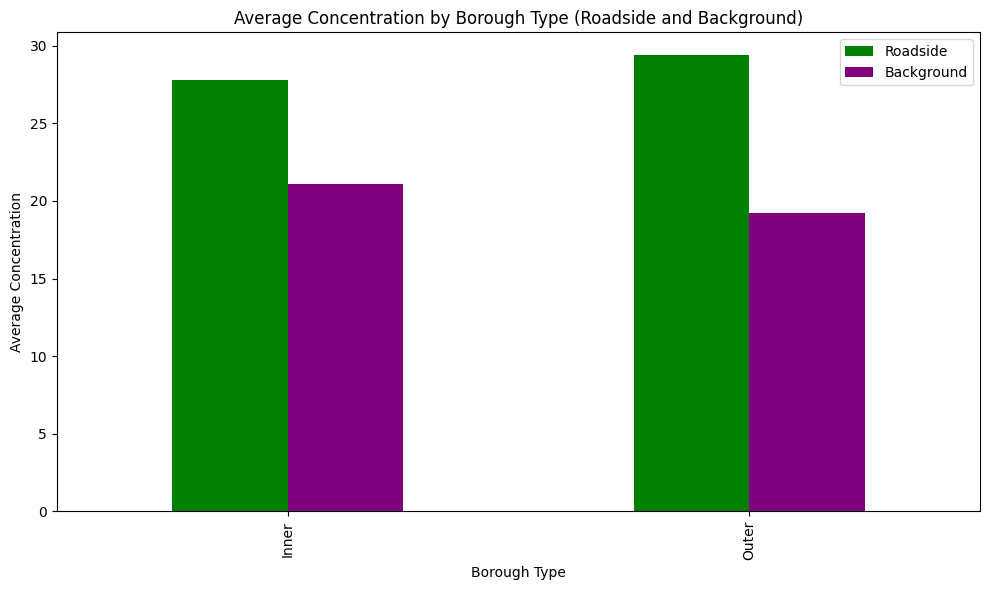

In [207]:
# Grouping by Outer/Inner and calculating mean concentrations
grouped = ld_2022_all.groupby("Outer/Inner").mean(numeric_only=True)[["AVG_Concentration_roadside", "AVG_Concentration_background"]]

fig, ax = plt.subplots(figsize=(10, 6))

grouped.plot(kind='bar', ax=ax, color=['green', 'purple'])
ax.set_title('Average Concentration by Borough Type (Roadside and Background)')
ax.set_ylabel('Average Concentration')
ax.set_xlabel('Borough Type')
ax.legend(['Roadside', 'Background'])

plt.tight_layout()
plt.show()

<div class="blue extra-padding">
    <strong>Conclusions:</strong>
    <ul>
        <li>All sites exceeded the WHO limit of 10ugm-3 in 2022 and only 6 sites managed to not exceed the UK set limit of 40ugm-3 throughout the same period of time.</li>
        <li>Roadside levels are overall much higher than urban / background levels for NO2</li>
        <li>On average, inner city Boroughs have higher average Background / Urban NO2 levels compared to outer Boroughs, but outer Boroughs on average have higher Roadside levels. </li>
    </ul>
</div>

<div class="yellow small-padding">
    <h3>j) How does location impact levels of pollutants in Hammersmith and Fulham?</h3>
</div>

<div class="blue extra-padding">
<strong>The following describes the dataset columns:</strong>
    <ul>
        <li>Site ID: Site specific indentification code</li>
        <li>Site Name: Road name where the tube is placed</li>
        <li>X (m) & Y (m): UK Grid specific co-ordinates of the placed tube</li>
        <li>Site Type: Whether the tube was placed in a roadside location or in an Urban Background location</li>
        <li>Valid data capture for monitoring period % & Valid data capture 2022 %: As we're only looking at 2022 data, these columns are identical. This is the % of accuracy across the record. This can be lower due to less sites, or missing data. </li>
        <li>Jan, Feb, Mar, Apr, May, June, Jul, Aug, Sept, Oct, Nov, Dec: Months of the year in which the data refers to</li>
        <li>Annual mean – raw data: The average measurement of NO2 levels across the site </li>
        <li>Annual mean – annualised and bias adjusted: Taking the percentage of accurate measured data and applying it to the annual mean measurement.</li>
    </ul>
</div>

In [234]:
ld_2022_hammersmith = pd.read_csv('data_clean/diffusion_tube_data_hammersmith.csv')
ld_2022_hammersmith.head()

,Site ID,Site Name,Site Type,valid_data_percent,Jan,Feb,Mar,Apr,May,June,Aug,Sept,Oct,Nov,Dec,Average
0,HF06,New Kings Road,Roadside,90.4,29.7,31.0,43.6,37.1,34.3,26.1,36.7,36.0,31.4,36.9,37.8,34.60
1,HF07,Fulham Road,Roadside,90.4,71.6,47.4,56.6,49.2,48.4,43.9,56.9,56.9,52.9,52.0,61.5,54.30
2,HF09,Paddenswick Road,Roadside,90.4,52.8,33.3,49.9,27.8,28.3,25.1,35.1,35.9,33.4,38.7,41.9,36.56
3,HF14,King Street,Roadside,90.4,58.4,39.7,46.0,32.3,39.1,34.9,39.5,39.6,39.3,40.7,26.1,39.60
4,HF15,Hemlock Road,Roadside,90.4,27.1,24.0,33.8,27.1,20.1,15.7,28.5,27.1,17.3,29.1,28.7,25.32


In [235]:
monthly_averages = ld_2022_hammersmith.iloc[:, 4:-1].mean(axis=0, skipna=True).round(2)
monthly_averages

Jan     51.02
Feb     35.62
Mar     46.99
Apr     33.58
May     32.96
June    29.10
Aug     37.72
Sept    37.71
Oct     35.03
Nov     38.90
Dec     40.43
dtype: float64

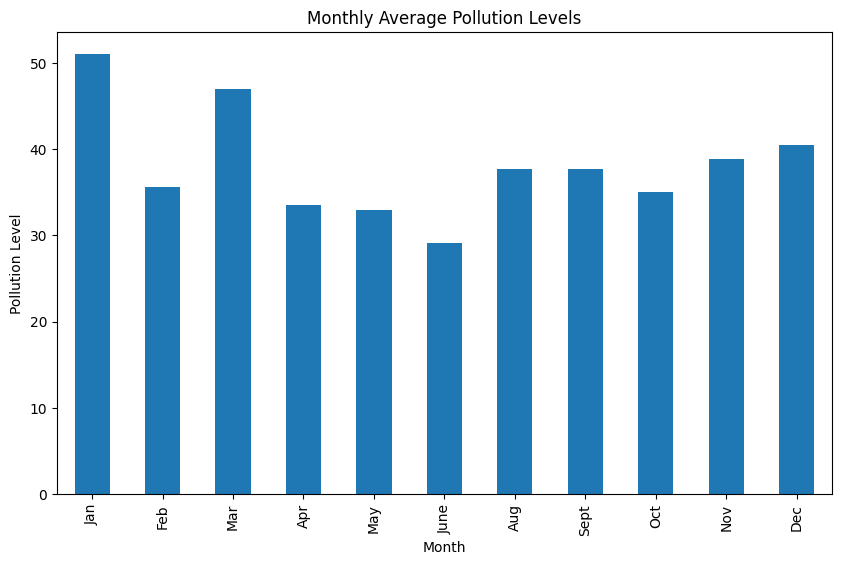

In [236]:
# Plotting the monthly averages
monthly_averages.plot(kind="bar", figsize=(10, 6))
plt.title("Monthly Average Pollution Levels")
plt.xlabel("Month")
plt.ylabel("Pollution Level")
plt.show()


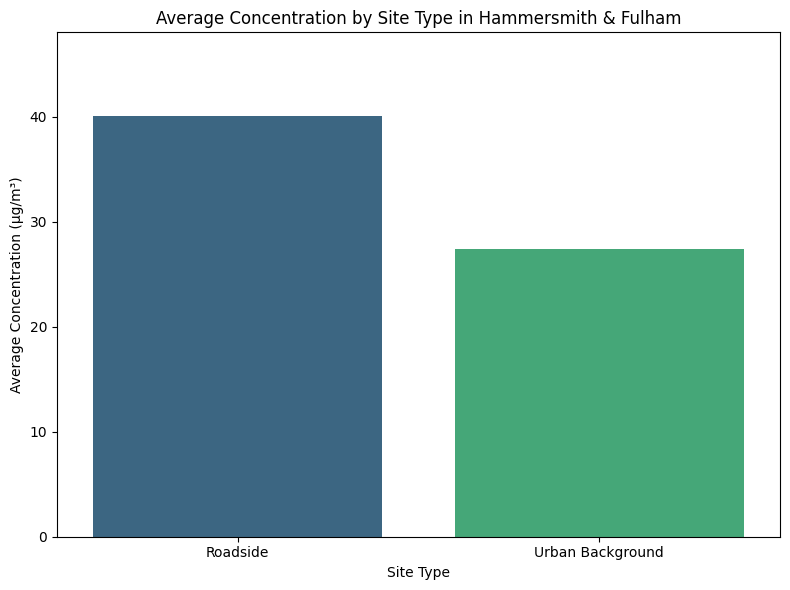

In [237]:
# Calculate the average for Roadside sites
roadside_avg = ld_2022_hammersmith[ld_2022_hammersmith["Site Type"] == "Roadside"].iloc[:, 4:-1].mean(axis=1, skipna=True).mean().round(2)

# Calculate the average for Urban Background sites
urban_background_avg = ld_2022_hammersmith[ld_2022_hammersmith["Site Type"] == "Urban Background"].iloc[:, 4:-1].mean(axis=1, skipna=True).mean().round(2)

# # Display the results
# roadside_avg, urban_background_avg

avg_data = pd.DataFrame({
    'Site Type': ['Roadside', 'Urban Background'],
    'Average Concentration': [roadside_avg, urban_background_avg]
})

plt.figure(figsize=(8, 6))
sns.barplot(x='Site Type', y='Average Concentration', hue='Site Type', data=avg_data, palette='viridis', dodge=False, legend=False)
plt.title('Average Concentration by Site Type in Hammersmith & Fulham')
plt.xlabel('Site Type')
plt.ylabel('Average Concentration (µg/m³)')
plt.ylim(0, max(avg_data['Average Concentration']) * 1.2)  # Adding some space above the bars
plt.tight_layout()
plt.show()

<div class="blue extra-padding">
    <strong>Conclusions:</strong>
    <ul>
        <li>All sites exceeded the WHO limit of 10ugm-3 in 2022 and only 6 sites managed to not exceed the UK set limit of 40ugm-3 throughout the same period of time.</li>
        <li>Roadside levels are overall much higher than urban / background levels for NO2</li>
        <li>On average, inner city Boroughs have higher average Background / Urban NO2 levels compared to outer Boroughs, but outer Boroughs on average have higher Roadside levels. </li>
    </ul>
</div>

<div class="orange extra-padding">
    <h2>2. What has been the impact of schemes such as ULEZ and Covid on reducing air pollution and how can this inform future policies?</h2>
</div>

<div class="blue extra-padding">
    <strong>Notes</strong>
    <ul>
        <li>The Ultra Low Emission Zone (ULEZ) in London was first introduced on April 8, 2019, with the goal of improving air quality by reducing the number of high-polluting vehicles in the city. </li>
        <li>Initially, the zone covered the same area as the Congestion Charge Zone in Central London. </li>
        <li>On October 25, 2021, the ULEZ was expanded to include a larger area bounded by the North and South Circular Roads, encompassing the borough of Fulham and Hammersmith.</li>
        <li>This analysis below compares air pollution data before the introduction of ULEZ to the same period the following year, aiming to determine whether any reductions in pollutant levels can be observed. 
</li>
        <li>The analysis will focus on the following pollutants which are directly related to traffic: CO (Carbon Monoxide),
NO (Nitric Oxide), NO2 (Nitrogen Dioxide), PM2.5 (Particulate Matter with diameter less than 2.5 micrometers), PM10 (Particulate Matter with diameter less than 10 micrometers)</li>
        <li>Air polution data has been extracted from Open Weather API: [Open Weather API Air Pollution History](https://openweathermap.org/api/air-pollution#history)</li>
        <li>To ensure accuracy of findings, we are also comparing it with Air Quality England (AQE) data as before, as we are aware of data incosistencies with the API data.</li>
    </ul>
</div>

<div class="yellow small-padding">
    <h3>What impact has ULEZ had on levels of air pollutants?</h3>
</div>

In [120]:
monthly_data = pd.read_csv('data_clean/monthly_air_quality_data_clean.csv')
monthly_data['Timestamp'] = pd.to_datetime(monthly_data['Timestamp'])
monthly_data = monthly_data.set_index('Timestamp')
monthly_data.head()

,CO,NO,NO2,PM2_5,PM10
Timestamp,,,,,
2020-11-30,325.932308,16.986953,38.983007,18.997203,20.771958
2020-12-31,253.597056,9.027107,24.539288,5.631720,6.816102
2021-01-31,275.814333,8.549616,26.318153,5.703417,6.614931
2021-02-28,270.657798,11.590278,23.557649,7.763393,9.406190
2021-03-31,277.998468,12.376494,25.949704,11.463683,13.554839


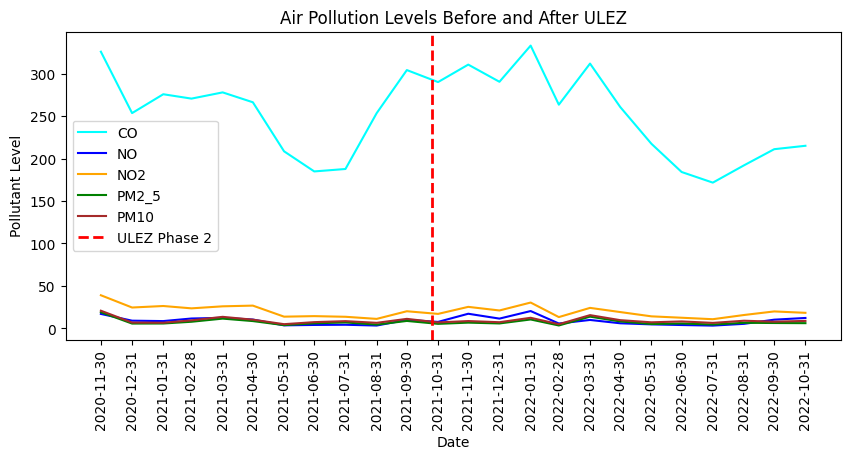

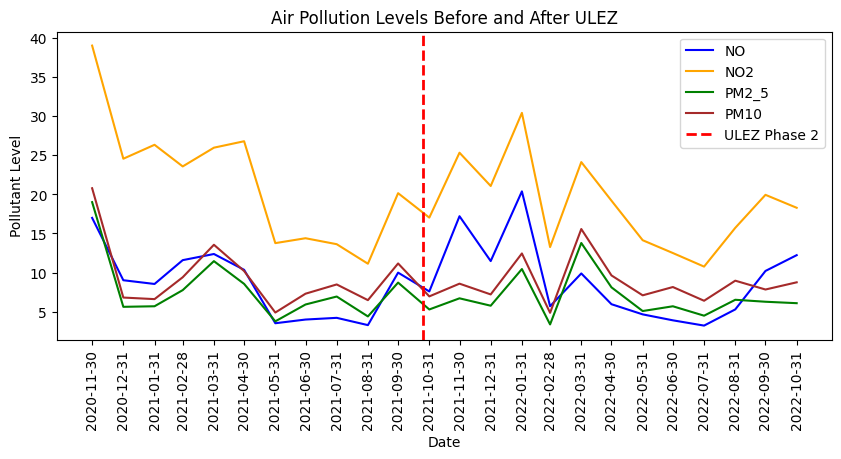

In [121]:
#Plotting the data (monthly average) including the ULEZ introduction date marked

event_date = '2021-10-25' #ULEZ introduction in Hammersmith
event_date = pd.to_datetime(event_date)

# Define a color palette
color_palette = {
    'CO': 'cyan',
    'NO': 'blue',
    'NO2': 'orange',
    'PM2_5': 'green',
    'PM10': 'brown'
}

# Plotting all pollutants
plt.figure(1, figsize=(10, 4))
plt.plot(monthly_data.index, monthly_data['CO'], label='CO', color=color_palette['CO'])
plt.plot(monthly_data.index, monthly_data['NO'], label='NO', color=color_palette['NO'])
plt.plot(monthly_data.index, monthly_data['NO2'], label='NO2', color=color_palette['NO2'])
plt.plot(monthly_data.index, monthly_data['PM2_5'], label='PM2_5', color=color_palette['PM2_5'])
plt.plot(monthly_data.index, monthly_data['PM10'], label='PM10', color=color_palette['PM10'])
plt.axvline(x=event_date, color='red', linestyle='--', linewidth=2, label='ULEZ Phase 2')
plt.xlabel('Date')
plt.ylabel('Pollutant Level')
plt.title('Air Pollution Levels Before and After ULEZ')
plt.xticks(monthly_data.index, rotation=90)
plt.legend()
plt.show()

# Plotting the same data but without CO for better visibility of other pollutants levels' fluctuations
plt.figure(2, figsize=(10, 4))
plt.plot(monthly_data.index, monthly_data['NO'], label='NO', color=color_palette['NO'])
plt.plot(monthly_data.index, monthly_data['NO2'], label='NO2', color=color_palette['NO2'])
plt.plot(monthly_data.index, monthly_data['PM2_5'], label='PM2_5', color=color_palette['PM2_5'])
plt.plot(monthly_data.index, monthly_data['PM10'], label='PM10', color=color_palette['PM10'])
plt.axvline(x=event_date, color='red', linestyle='--', linewidth=2, label='ULEZ Phase 2')
plt.xlabel('Date')
plt.ylabel('Pollutant Level')
plt.title('Air Pollution Levels Before and After ULEZ')
plt.xticks(rotation=90)
plt.xticks(monthly_data.index, rotation=90)
plt.legend()
plt.show()


<div class="purple small-padding">
    <h4>Loading AQE data and creating new dataframe</h4>
</div>

In [122]:
ULEZ_data = pd.read_csv('data_clean/hammersmith_verified_clean.csv')
ULEZ_data.head()


,date_time,PM10,NO,NO2,NOXasNO2,O3,PM25
0,2019-03-05 13:00:00,12.5,65.30070,31.02616,131.15250,41.78497,4.0
1,2019-03-05 14:00:00,18.3,39.67008,42.47411,103.30071,44.42927,7.0
2,2019-03-05 15:00:00,15.8,26.10562,42.53381,82.56186,42.11925,8.0
3,2019-03-05 16:00:00,18.3,59.42223,87.36804,178.48086,29.95047,8.0
4,2019-03-05 17:00:00,23.3,76.42005,70.92338,188.09916,20.24139,9.0


In [123]:
start_pre = pd.to_datetime('2020-10-25')
end_post = pd.to_datetime('2022-10-24')

In [124]:
ULEZ_data['date_time'] = pd.to_datetime(ULEZ_data['date_time'])
ULEZ_data = ULEZ_data[ULEZ_data['date_time'].between(start_pre,end_post)]

In [125]:
ULEZ_data.head()

,date_time,PM10,NO,NO2,NOXasNO2,O3,PM25
12019,2020-10-27 14:00:00,7.5,19.67952,27.87032,58.04516,38.14282,7.0
12020,2020-10-27 15:00:00,7.5,12.05381,23.22469,41.70694,44.95813,9.0
12021,2020-10-27 16:00:00,14.2,10.19552,29.02116,44.65407,41.18626,16.0
12022,2020-10-27 17:00:00,8.3,11.58610,35.01401,52.77911,34.63038,15.0
12023,2020-10-27 18:00:00,18.3,8.97444,28.01363,41.77425,46.16553,8.0


In [126]:
ULEZ_data.tail()

,date_time,PM10,NO,NO2,NOXasNO2,O3,PM25
24344,2022-10-23 20:00:00,20.8,36.91671,48.51533,105.12016,24.33357,5.0
24345,2022-10-23 21:00:00,15.0,11.74836,29.05337,47.06727,39.87139,3.0
24346,2022-10-23 22:00:00,4.2,26.87696,49.75024,90.96101,47.12307,2.0
24347,2022-10-23 23:00:00,10.8,11.01127,30.41458,47.29829,64.39311,3.0
24348,2022-10-24 00:00:00,20.8,2.66650,5.98291,10.07149,76.42294,3.0


In [127]:
ULEZ_data = ULEZ_data.set_index('date_time')

In [128]:
#Resampling data to monthly averages to smooth out fluctuations
monthly_data_v2 = ULEZ_data.resample('ME').mean()
monthly_data_v2.sample()

,PM10,NO,NO2,NOXasNO2,O3,PM25
date_time,,,,,,
2021-02-28,22.757468,36.552736,42.296184,98.34293,35.602581,13.602922


<div class="purple small-padding">
    <h4>Visualising pre and post ULEZ data</h4>
</div>

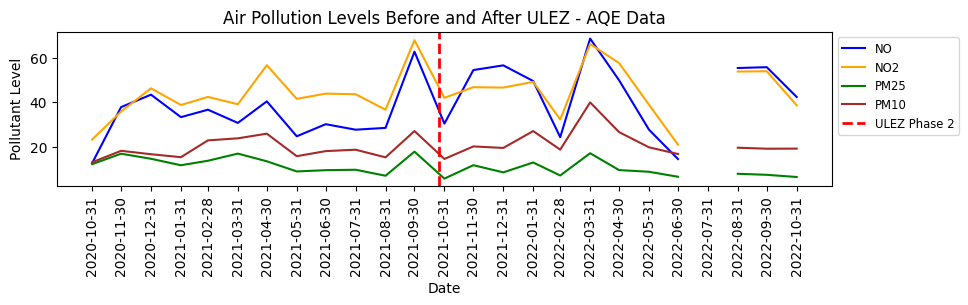

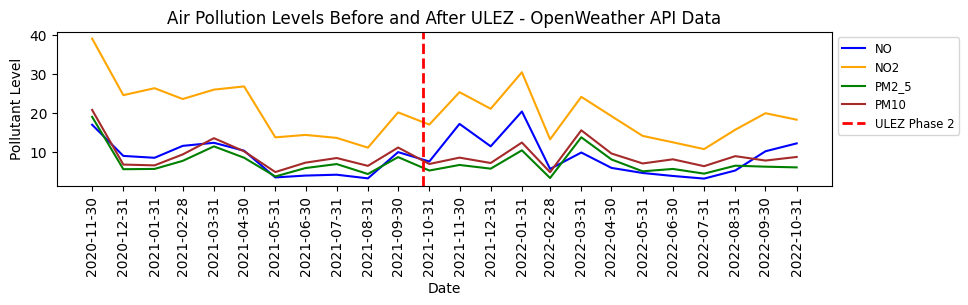

In [129]:
#Plotting both data sets (monthly average)

#AQE data
plt.figure(1, figsize=(10, 2))
plt.plot(monthly_data_v2.index, monthly_data_v2['NO'], label='NO', color=color_palette['NO'])
plt.plot(monthly_data_v2.index, monthly_data_v2['NO2'], label='NO2', color=color_palette['NO2'])
plt.plot(monthly_data_v2.index, monthly_data_v2['PM25'], label='PM25', color=color_palette['PM2_5'])
plt.plot(monthly_data_v2.index, monthly_data_v2['PM10'], label='PM10', color=color_palette['PM10'])
plt.axvline(x=event_date, color='red', linestyle='--', linewidth=2, label='ULEZ Phase 2')
plt.xlabel('Date')
plt.ylabel('Pollutant Level')
plt.title('Air Pollution Levels Before and After ULEZ - AQE Data')
plt.xticks(monthly_data_v2.index, rotation=90)
plt.legend(loc='upper left', fontsize='small', bbox_to_anchor=(1, 1))
plt.show()

#API data (Open Weather)
#Plotting without CO for better comparison
plt.figure(2, figsize=(10, 2))
plt.plot(monthly_data.index, monthly_data['NO'], label='NO', color=color_palette['NO'])
plt.plot(monthly_data.index, monthly_data['NO2'], label='NO2', color=color_palette['NO2'])
plt.plot(monthly_data.index, monthly_data['PM2_5'], label='PM2_5', color=color_palette['PM2_5'])
plt.plot(monthly_data.index, monthly_data['PM10'], label='PM10', color=color_palette['PM10'])
plt.axvline(x=event_date, color='red', linestyle='--', linewidth=2, label='ULEZ Phase 2')
plt.xlabel('Date')
plt.ylabel('Pollutant Level')
plt.title('Air Pollution Levels Before and After ULEZ - OpenWeather API Data')
plt.xticks(rotation=90)
plt.xticks(monthly_data.index, rotation=90)
plt.legend(loc='upper left', fontsize='small', bbox_to_anchor=(1, 1))
plt.show()

<div class="blue extra-padding">
    <strong>Observations/notes:</strong>
    <ul>
        <li>As previously noted there a huge inconsistencies beteeen the API and AQE data and AQE has a large portion of missing data</li>
        <li>As AQE data is taken from road-side monitors rather than satellites, it is viewed as more reliable, despite the gap in data</li>
        <li>The graph shows a similar trend in recordings for all pollutant types</li>
        <li>There is a slight decrease in pollutants around the time of the ULEZ introduction, however pollutant levels increase shortly after</li>
        <li>There are significant fluctuations (observed in both data sets): increase in September 2021, drop around/just after ULEZ introduction date, increase in level for all in Jan 2022 and drop in Feb 2022 followed by another spike in March 2022</li>
        <li>Levels of pollutants may have also been influenced by COVID lockdowns which we will also investigate below</li>
    </ul>
</div>

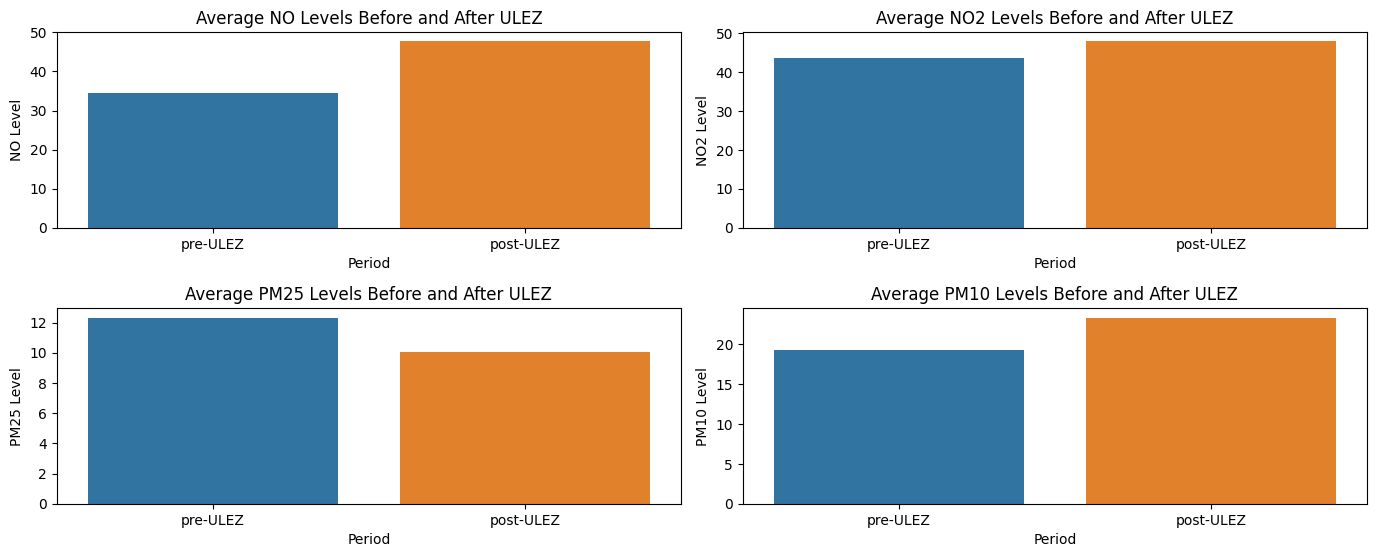

In [130]:
#Manipulating data further to compare average levels of all pollutants in pre- and post- ULEZ periods:

#Splitting the data into pre-ULEZ and post-ULEZ
#has to be split from merged_data_ULEZ as data cleaning was done after the merge
pre_ulez_data = ULEZ_data[ULEZ_data.index < event_date]
post_ulez_data = ULEZ_data[ULEZ_data.index >= event_date]

#Calculating the average values for each period, converting the series into dataframe and transposing
pre_ulez_avg = pre_ulez_data.mean().to_frame().T
post_ulez_avg = post_ulez_data.mean().to_frame().T
pre_ulez_avg['Period'] = 'pre-ULEZ'  #Adding the period label
post_ulez_avg['Period'] = 'post-ULEZ'

#Combining the data for plotting
combined_avg = pd.concat([pre_ulez_avg, post_ulez_avg])
combined_avg.reset_index(drop=True, inplace=True) 

#Creating the bar plot
pollutants = ['NO', 'NO2', 'PM25', 'PM10']
plt.figure(figsize=(14, 8))
palette = sns.color_palette("husl", 2)

for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(3, 2, i)
    sns.barplot(data=combined_avg, x='Period', y=pollutant, hue=palette, legend=False)
    plt.title(f'Average {pollutant} Levels Before and After ULEZ')
    plt.xlabel('Period')
    plt.ylabel(f'{pollutant} Level')

plt.tight_layout()
plt.show()

In [131]:
#Extracting the rows for pre-ULEZ and post-ULEZ
pre_ulez = combined_avg[combined_avg['Period'] == 'pre-ULEZ'].iloc[0]
post_ulez = combined_avg[combined_avg['Period'] == 'post-ULEZ'].iloc[0]

#Calculating percentage change
percentage_change = ((post_ulez[pollutants] - pre_ulez[pollutants]) / pre_ulez[pollutants]) * 100
formatted_percentage_change = percentage_change.apply(lambda x: f"{x:.2f}%")
print("Percentage change in average air pollutants levels between pre-ULEZ and post-ULEZ periods:")
print(formatted_percentage_change)

Percentage change in average air pollutants levels between pre-ULEZ and post-ULEZ periods:
NO       37.79%
NO2       9.66%
PM25    -18.67%
PM10     21.30%
dtype: object


<div class="blue extra-padding">
    <strong>Observations</strong>
    <ul>
        <li>PM2_5 is the only pollutant showing a significant decrease on annual scale (post ULEZ). </li>
        <li>The other 3 pollutants increased in the period post ULEZ, with Nitric Oxide (NO) showing a drastic 32% increase.</li>
        <li>Considering that the pre-ULEZ period in Hammersmith overlapped with the COVID-19 lockdowns and restrictions of 2020 and 2021, the data from this timeframe may not provide a comprehensive view. </li>
        <li>Therefore, an analysis over a more extended period will be conducted below to ensure a more accurate assessment of ULEZ introduction while also analysing Covid impact.</li>
    </ul>
</div>

<div class="yellow small-padding">
    <h3>What effect did Covid lockdowns have on air quality?</h3>
</div>

<div class="blue extra-padding">
    <strong>Notes</strong>
<ul>
    <li>The COVID-19 lockdown in London was from March 23, 2020-June 1, 2020, with phased reopenings continuing through the summer.</li>
    <li>Non-essential businesses were closed, public gatherings were banned, and residents were instructed to stay at home except for essential activities.</li>
    <li>Subsequent lockdowns were imposed in November 2020 and January 2021 as infection rates surged again.</li>
    <li>These lockdowns had noticeable environmental effects, including temporary reductions in air pollution, which the below analysis will explore and visualize for the Borough of Hammersmith.</li>
</ul>
</div>

In [132]:
merged_data = pd.read_csv('data_clean/hammersmith_verified_clean.csv')
merged_data.head()

,date_time,PM10,NO,NO2,NOXasNO2,O3,PM25
0,2019-03-05 13:00:00,12.5,65.30070,31.02616,131.15250,41.78497,4.0
1,2019-03-05 14:00:00,18.3,39.67008,42.47411,103.30071,44.42927,7.0
2,2019-03-05 15:00:00,15.8,26.10562,42.53381,82.56186,42.11925,8.0
3,2019-03-05 16:00:00,18.3,59.42223,87.36804,178.48086,29.95047,8.0
4,2019-03-05 17:00:00,23.3,76.42005,70.92338,188.09916,20.24139,9.0


In [133]:
merged_data['date_time'] = pd.to_datetime(merged_data['date_time'])

In [134]:
merged_data.set_index('date_time', inplace=True)

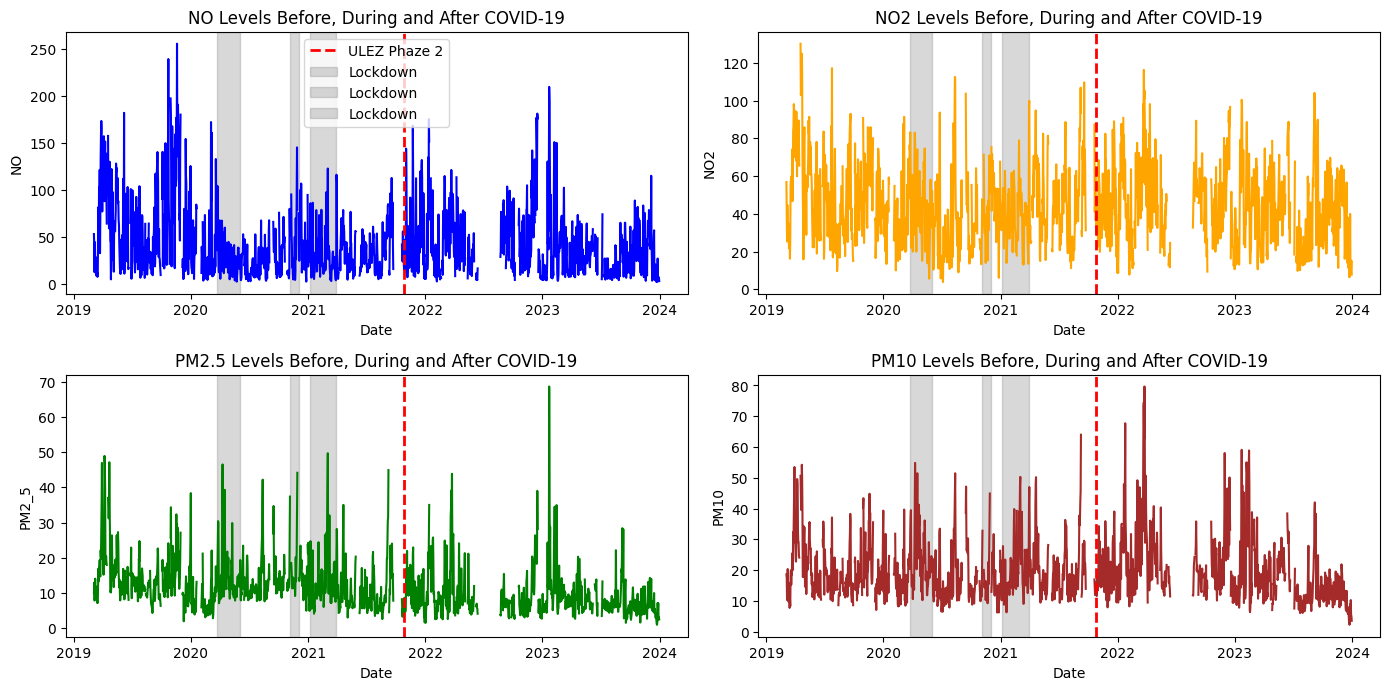

In [135]:
#Plotting each pollutant over the 4 years, with lockdown periods and ULEZ introduction date marked
lockdown_periods = [
    ('2020-03-23', '2020-06-01'),  #First lockdown
    ('2020-11-05', '2020-12-02'),  #Second lockdown
    ('2021-01-06', '2021-03-29')   #Third lockdown
]

#Resampling the data to daily averages
daily_data = merged_data.resample('D').mean()

plt.figure(figsize=(14, 10))
plt.subplot(3, 2, 1)
plt.plot(daily_data.index, daily_data['NO'], color=color_palette['NO'])
plt.title('NO Levels Before, During and After COVID-19')
plt.axvline(x=event_date, color='red', linestyle='--', linewidth=2, label='ULEZ Phaze 2')
plt.xlabel('Date')
plt.ylabel('NO')
for start, end in lockdown_periods: #Marking Lockdown periods on graph
    plt.axvspan(start, end, color='grey', alpha=0.3, label='Lockdown')
plt.legend()

plt.subplot(3, 2, 2)
plt.plot(daily_data.index, daily_data['NO2'], color=color_palette['NO2'])
plt.title('NO2 Levels Before, During and After COVID-19')
plt.axvline(x=event_date, color='red', linestyle='--', linewidth=2, label='ULEZ Phaze 2')
plt.xlabel('Date')
plt.ylabel('NO2')
for start, end in lockdown_periods:
    plt.axvspan(start, end, color='grey', alpha=0.3)

plt.subplot(3, 2, 3)
plt.plot(daily_data.index, daily_data['PM25'], color=color_palette['PM2_5'])
plt.title('PM2.5 Levels Before, During and After COVID-19')
plt.axvline(x=event_date, color='red', linestyle='--', linewidth=2, label='ULEZ Phaze 2')
plt.xlabel('Date')
plt.ylabel('PM2_5')
for start, end in lockdown_periods:
    plt.axvspan(start, end, color='grey', alpha=0.3)
    
plt.subplot(3, 2, 4)
plt.plot(daily_data.index, daily_data['PM10'], color=color_palette['PM10'])
plt.title('PM10 Levels Before, During and After COVID-19')
plt.axvline(x=event_date, color='red', linestyle='--', linewidth=2, label='ULEZ Phaze 2')
plt.xlabel('Date')
plt.ylabel('PM10')
for start, end in lockdown_periods:
    plt.axvspan(start, end, color='grey', alpha=0.3)

plt.tight_layout()
plt.show()


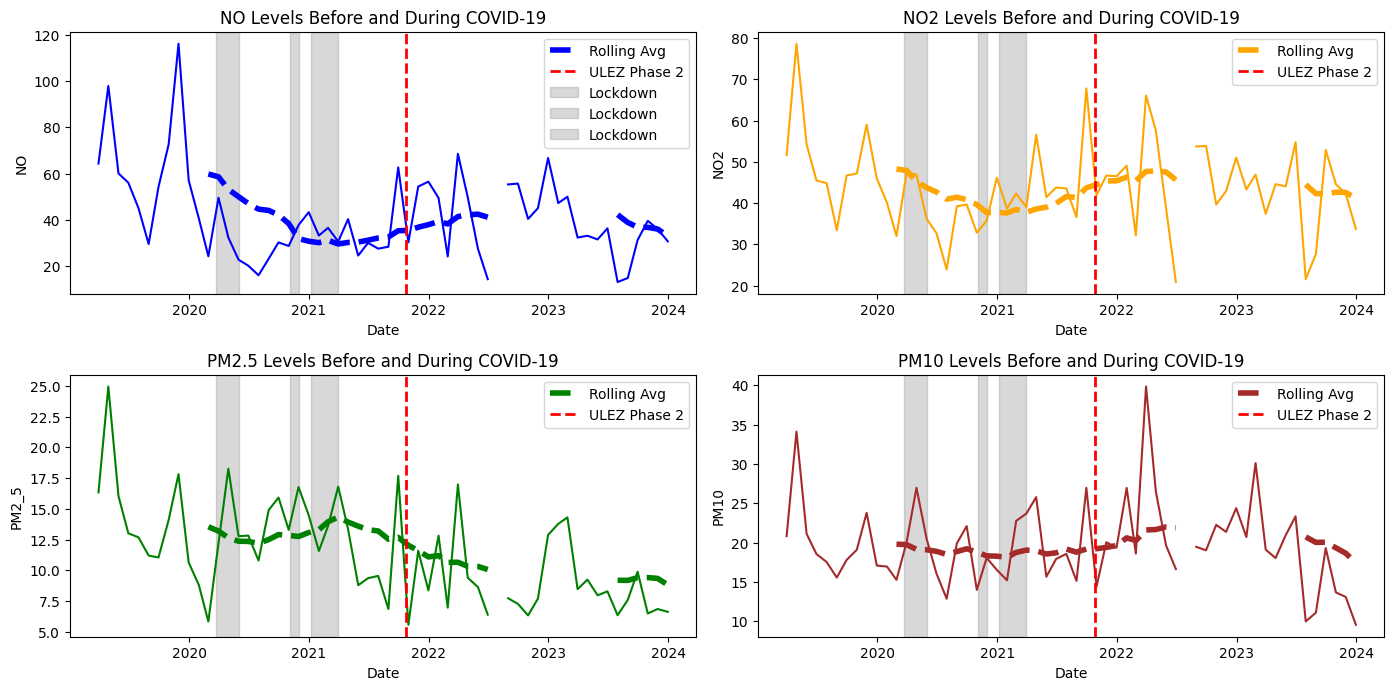

In [136]:
# Resampling data to monthly averages and plotting with rolling trendline added
monthly_data_19_22 = merged_data.resample('ME').mean()

rolling_data = monthly_data_19_22.rolling(window=12).mean() #window set at 12 months

plt.figure(figsize=(14, 10))
plt.subplot(3, 2, 1)
plt.plot(monthly_data_19_22.index, monthly_data_19_22['NO'], color=color_palette['NO'])
plt.plot(rolling_data.index, rolling_data['NO'], label='Rolling Avg', color=color_palette['NO'], linestyle='--', linewidth=4)
plt.title('NO Levels Before and During COVID-19')
plt.axvline(x=event_date, color='red', linestyle='--', linewidth=2, label='ULEZ Phase 2')
plt.xlabel('Date')
plt.ylabel('NO')
for start, end in lockdown_periods:
    plt.axvspan(start, end, color='grey', alpha=0.3, label='Lockdown')
plt.legend()

plt.subplot(3, 2, 2)
plt.plot(monthly_data_19_22.index, monthly_data_19_22['NO2'], color=color_palette['NO2'])
plt.plot(rolling_data.index, rolling_data['NO2'], label='Rolling Avg', color=color_palette['NO2'], linestyle='--', linewidth=4)
plt.title('NO2 Levels Before and During COVID-19')
plt.axvline(x=event_date, color='red', linestyle='--', linewidth=2, label='ULEZ Phase 2')
plt.xlabel('Date')
plt.ylabel('NO2')
for start, end in lockdown_periods:
    plt.axvspan(start, end, color='grey', alpha=0.3)
plt.legend()

plt.subplot(3, 2, 3)
plt.plot(monthly_data_19_22.index, monthly_data_19_22['PM25'], color=color_palette['PM2_5'])
plt.plot(rolling_data.index, rolling_data['PM25'], label='Rolling Avg', color=color_palette['PM2_5'], linestyle='--', linewidth=4)
plt.title('PM2.5 Levels Before and During COVID-19')
plt.axvline(x=event_date, color='red', linestyle='--', linewidth=2, label='ULEZ Phase 2')
plt.xlabel('Date')
plt.ylabel('PM2_5')
for start, end in lockdown_periods:
    plt.axvspan(start, end, color='grey', alpha=0.3)
plt.legend()

plt.subplot(3, 2, 4)
plt.plot(monthly_data_19_22.index, monthly_data_19_22['PM10'], color=color_palette['PM10'])
plt.plot(rolling_data.index, rolling_data['PM10'], label='Rolling Avg', color=color_palette['PM10'], linestyle='--', linewidth=4)
plt.title('PM10 Levels Before and During COVID-19')
plt.axvline(x=event_date, color='red', linestyle='--', linewidth=2, label='ULEZ Phase 2')
plt.xlabel('Date')
plt.ylabel('PM10')
for start, end in lockdown_periods:
    plt.axvspan(start, end, color='grey', alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()


<div class="blue extra-padding">
    <strong>Observations</strong>
    <ul>
        <li>NO: There was a notable decline in pollutant levels during the lockdown/restriction period, succeeded by a gradual rise in 2022, albeit remaining below 2019 levels.</li>
        <li>NO2: A distinct reduction in pollutant levels was observed during the lockdown/restriction phase, with a subsequent increase in mid-2021, still below 2019 levels.</li>
        <li>PM2.5: Pollution levels during the national lockdown period were comparable to those of 2019, with occasional higher spikes noted. However, this was followed by a significant decline in summer 2021 and summer 2022, demonstrating an overall downward trend.</li>
        <li>PM10: A clear decrease in pollutant levels was evident during the lockdown/restriction period, succeeded by a sharp increase in spring 2022, surpassing pre-COVID highs.</li>
    </ul>
</div>

<div class="yellow small-padding">
    <h3>How have traffic figures changed over time and what is the impact of this?</h3>
</div>

<div class="blue extra-padding">
    <strong>Notes</strong>
    <ul>
        <li>The UK Government's [road traffic figures](https://roadtraffic.dft.gov.uk/downloads) report the total volume of traffic, measured in vehicle miles, for each local authority over the course of a year. 
        </li>
        <li>Although the data is summarized annually, it can be used to illustrate overall traffic trends and compare these trends with yearly pollutant level trends.</li>
    </ul>
</div>

In [137]:
traffic_df = pd.read_csv('data_clean/local_authority_traffic_1993_2023.csv')
traffic_df.head()

,local_authority_id,local_authority_name,local_authority_code,year,link_length_km,link_length_miles,cars_and_taxis,all_motor_vehicles
0,1,Isles of Scilly,E06000053,1993,36.01,22.38,9.000000e+05,1.400000e+06
1,2,Nottinghamshire,E10000024,1993,4650.69,2889.80,2.702600e+09,3.368900e+09
2,3,Glasgow City,S12000049,1993,1768.54,1098.92,1.381200e+09,1.662600e+09
3,4,North Lanarkshire,S12000050,1993,1606.71,998.36,1.253500e+09,1.547600e+09
4,5,Somerset,E06000066,1993,6630.33,4119.90,2.410300e+09,2.958200e+09


In [138]:
traffic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6353 entries, 0 to 6352
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   local_authority_id    6353 non-null   int64  
 1   local_authority_name  6353 non-null   object 
 2   local_authority_code  6353 non-null   object 
 3   year                  6353 non-null   int64  
 4   link_length_km        6353 non-null   float64
 5   link_length_miles     6353 non-null   float64
 6   cars_and_taxis        6353 non-null   float64
 7   all_motor_vehicles    6353 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 397.2+ KB


In [139]:
H_F_traffic = traffic_df[(traffic_df['local_authority_name'].str.contains('Hammersmith', case=False, na=False))& (traffic_df['year'] > 2018)  & (traffic_df['year'] < 2023)]
H_F_traffic

,local_authority_id,local_authority_name,local_authority_code,year,link_length_km,link_length_miles,cars_and_taxis,all_motor_vehicles
5468,146,Hammersmith and Fulham,E09000013,2019,220.00,136.70,241700000.0,328000000.0
5673,146,Hammersmith and Fulham,E09000013,2020,219.81,136.58,180600000.0,255500000.0
5877,146,Hammersmith and Fulham,E09000013,2021,219.91,136.65,205700000.0,289000000.0
6083,146,Hammersmith and Fulham,E09000013,2022,219.88,136.63,214800000.0,303200000.0


In [140]:
merged_data.head()


,PM10,NO,NO2,NOXasNO2,O3,PM25
date_time,,,,,,
2019-03-05 13:00:00,12.5,65.30070,31.02616,131.15250,41.78497,4.0
2019-03-05 14:00:00,18.3,39.67008,42.47411,103.30071,44.42927,7.0
2019-03-05 15:00:00,15.8,26.10562,42.53381,82.56186,42.11925,8.0
2019-03-05 16:00:00,18.3,59.42223,87.36804,178.48086,29.95047,8.0
2019-03-05 17:00:00,23.3,76.42005,70.92338,188.09916,20.24139,9.0


In [144]:
merged_data_copy = merged_data.reset_index()
merged_data_copy.head()

,date_time,PM10,NO,NO2,NOXasNO2,O3,PM25
0,2019-03-05 13:00:00,12.5,65.30070,31.02616,131.15250,41.78497,4.0
1,2019-03-05 14:00:00,18.3,39.67008,42.47411,103.30071,44.42927,7.0
2,2019-03-05 15:00:00,15.8,26.10562,42.53381,82.56186,42.11925,8.0
3,2019-03-05 16:00:00,18.3,59.42223,87.36804,178.48086,29.95047,8.0
4,2019-03-05 17:00:00,23.3,76.42005,70.92338,188.09916,20.24139,9.0


In [145]:
# Resampling the pollutant levels data to yearly averages
merged_data_copy['date_time'] = pd.to_datetime(merged_data_copy['date_time'])
start = pd.to_datetime('2019-01-01')
end = pd.to_datetime('2022-12-31')
data_by_year = merged_data_copy[merged_data_copy['date_time'].between(start,end)]


In [146]:
data_by_year = data_by_year.set_index('date_time')
yearly_data = data_by_year.resample('YE').mean()

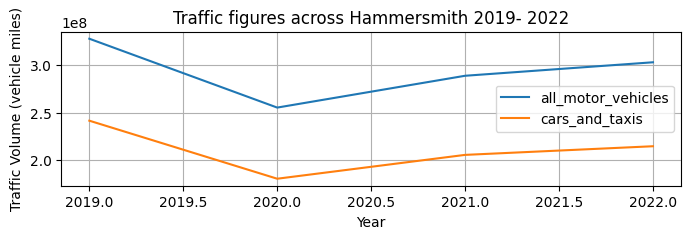

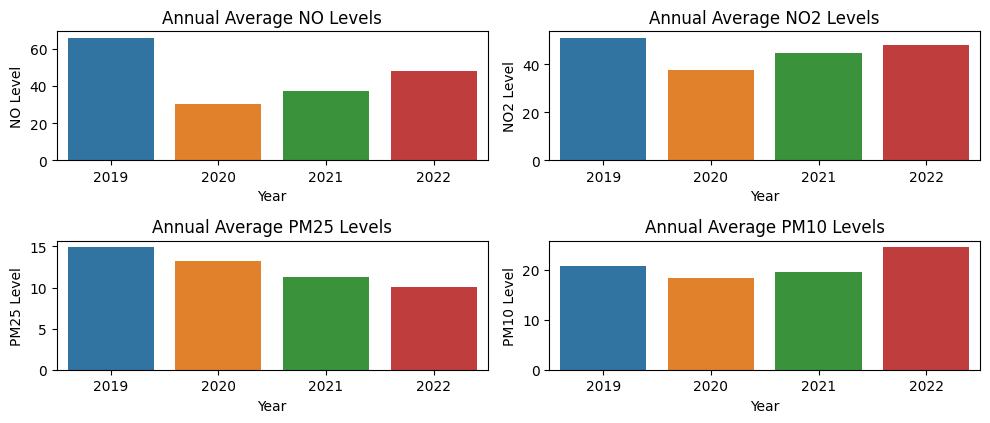

In [147]:
#Plotting raod traffic data
plt.figure(1, figsize=(8, 2))
plt.plot(H_F_traffic.year, H_F_traffic.all_motor_vehicles, label='all_motor_vehicles')
plt.plot(H_F_traffic.year, H_F_traffic.cars_and_taxis, label='cars_and_taxis')
plt.xlabel('Year')
plt.ylabel('Traffic Volume (vehicle miles)')
plt.title('Traffic figures across Hammersmith 2019- 2022')
plt.legend()
plt.grid()
plt.show()

#Plotting pollutant data to compare 4 years average levels
plt.figure(2, figsize=(10, 6))
pollutants = ['NO', 'NO2', 'PM25','PM10']
palette = sns.color_palette("husl", 4)

for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(3, 2, i)
    sns.barplot(data=yearly_data, x=yearly_data.index.year, y=pollutant,hue=palette,legend=False )
    plt.title(f'Annual Average {pollutant} Levels')
    plt.xlabel('Year')
    plt.ylabel(f'{pollutant} Level')

plt.tight_layout()
plt.show()

<div class="blue extra-padding">
    <strong>Observations</strong>
<p>
The yearly summary bar charts for NO and NO2 reaffirm the trends shown in the earlier line plots and align with the traffic volume data. There is a clear correlation between traffic volume and the levels of these two pollutants. Specifically, there is a notable decrease in pollutant levels in 2020, followed by an increase in 2021 and a smaller increase in 2022. Both post-2020 increases remain significantly below pre-COVID levels. The slowed increase in 2022 can be partially attributed to the introduction of the Ultra Low Emission Zone (ULEZ), which has eliminated a significant number of non-compliant vehicles.

The yearly summary bar chart for PM2.5 indicates a relatively minor impact from COVID in 2020 but shows a significant decrease in 2021 and a further decline in 2022. This trend appears to be more closely related to the introduction of ULEZ and is largely attributed to the reduction of high-emission vehicles, encouragement of cleaner vehicle use, and improved traffic flow and public transportation options.

Finally, the bar chart for PM10 shows a reduction in levels during the COVID-19 pandemic but then a subsequent increase in 2022 to levels exceeding those of 2019. This is likely due to the persistence of non-exhaust emissions, the return of increased construction activities, and natural sources of PM10.

With ULEZ having less significant impact than Covid, it is evident that more traffic reduction measures need to be explored and promoted for a long lasting air quality improvement. Some of these could include:
</p>
<ul>
    <li>Promoting electric and hybrid vehicles through subsidies and incentives.</li>
    <li>Expanding charging infrastructure for electric vehicles across the city.</li>
    <li>Improving public transportation frequency, reliability, and coverage.</li>
    <li>Developing cycling and walking infrastructure, including bike-sharing schemes.</li>
    <li>Implementing congestion charging with dynamic pricing to reduce traffic during peak times.</li>
    <li>Creating car-free zones and days to reduce vehicle traffic in city centers and near schools.</li>
    <li>Encouraging telecommuting and flexible working hours to reduce peak-hour traffic.</li>
    <li>Incentivizing ridesharing and carpooling with dedicated lanes and reduced parking fees.</li>
    <li>Conducting education and awareness campaigns to promote alternative transportation modes.</li>
    <li>Utilizing technological innovations in traffic management to optimize flow and reduce congestion.</li>
    <li>Regular reviews and updates to emission standards for vehicles within LEZs and ULEZs.</li>
</ul>
</div>

<div class="orange extra-padding">
    <h2>3. What is the impact of air pollution on our health and the NHS?</h2>
</div>

<div class="yellow small-padding">
    <h3>How does air pollution impacting the health of people in Hammersmith?</h3>
</div>

<div class="blue small-padding">
    <strong>Notes</strong>
    <ul>
        <li>The health data in this section has been cleaned previously and used in reports</li>
        <li>The data looks at two scenarios:
            <ol>
                <li>'scenario 0': where the government makes no changes and does not implement an air quality strategy</li>
                <li>'scenario 2': where the government implements The Ultra Low Emission Zone (ULEZ). Data includes modelled air quality improvements resulting from the introduction of the central ULEZ in 2019, the tightening of the     restrictions of the Low Emission Zone (LEZ) in 2020, and the expansion of the ULEZ in 2021, as well as additional policy measures in the period 2016-2024.</li>
            </ol>
        </li>
        <li>Data from 2016 is real incidence data and future dates are modelled data based on different scenarios</li>
    </ul>
</div>

<div class="purple small-padding">
    <h5>Loading and viewing modelled health data</h5>
</div>

<div class="yellow small-padding">
<h4>a) What could happen without improved air quality? ('scenario 0')</h4>
</div>

In [148]:
file_path = 'data_unclean/PM25/hammersmith-and-fulham-pm25-xlsm-48.xls'
sheet_name = 'Incidence'

df_pm25 = pd.read_excel(file_path, sheet_name=sheet_name)
df_pm25.head()

,Scenario,Year,Disease,AgeGroup,Incidence,95% CL
0,0,2016,childhood asthma,0-5,131,1
1,0,2016,childhood asthma,06-17,214,1
2,0,2016,childhood asthma,18-64,0,0
3,0,2016,childhood asthma,65+,0,0
4,0,2016,childhood asthma,total,345,1


In [149]:
df_pm25.describe()

,Scenario,Year,Incidence,95% CL
count,5040.000000,5040.000000,5040.000000,5040.000000
mean,1.500000,2033.000000,90.504762,0.444444
std,1.118145,10.100507,190.916496,0.630073
min,0.000000,2016.000000,0.000000,0.000000
25%,0.750000,2024.000000,0.000000,0.000000
50%,1.500000,2033.000000,32.000000,0.000000
75%,2.250000,2042.000000,96.000000,1.000000
max,3.000000,2050.000000,1256.000000,3.000000


In [150]:
file_path = 'data_unclean/NO2/hammersmith-and-fulham-no2-xlsm-63.xls'
sheet_name = 'Incidence'

df_no2 = pd.read_excel(file_path, sheet_name=sheet_name)
df_no2.describe()

,Scenario,Year,Incidence,95% CL
count,4340.000000,4340.000000,4340.000000,4340.000000
mean,1.500000,2033.000000,106.858065,0.466820
std,1.118163,10.100669,207.302240,0.644837
min,0.000000,2016.000000,0.000000,0.000000
25%,0.750000,2024.000000,0.000000,0.000000
50%,1.500000,2033.000000,24.000000,0.000000
75%,2.250000,2042.000000,136.250000,1.000000
max,3.000000,2050.000000,1267.000000,3.000000


In [151]:
df_no2.head()

,Scenario,Year,Disease,AgeGroup,Incidence,95% CL
0,0,2016,childhood asthma,0-5,187,1
1,0,2016,childhood asthma,06-17,130,1
2,0,2016,childhood asthma,18-64,0,0
3,0,2016,childhood asthma,65+,0,0
4,0,2016,childhood asthma,total,317,1


In [152]:
file_path = 'data_unclean/PM25/hammersmith-and-fulham-pm25-xlsm-48.xls'

sheet_name = 'Incidence Cases Avoided'

df_AVOIDED = pd.read_excel(file_path, sheet_name=sheet_name)

In [153]:
file_path = 'data_unclean/NO2/hammersmith-and-fulham-no2-xlsm-63.xls'

sheet_name = 'Incidence Cases Avoided'

df_AVOIDED_NO2 = pd.read_excel(file_path, sheet_name=sheet_name)

<div class="purple small-padding">
    <h5>Hammersmith PM2.5 incidence predictions for scenario 0</h5>
</div>

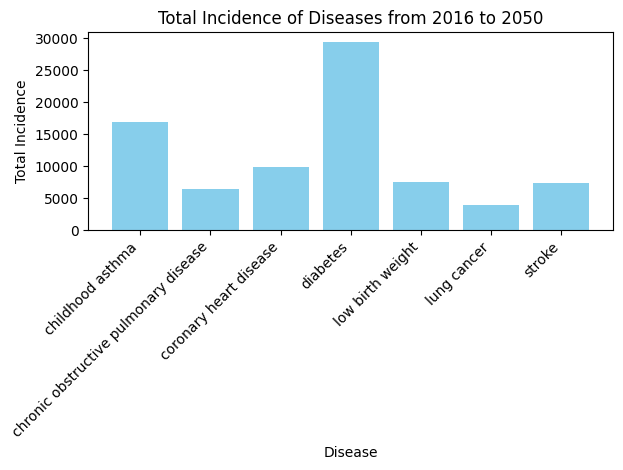

In [154]:
# Total number for each disease by age from 2016-2050 INCIDENCE SCENARIO 0
df_incidence_s0 = df_pm25[df_pm25['Scenario'] == 0].copy()

df_incidence_s0['Year'] = pd.to_datetime(df_incidence_s0['Year'], format='%Y')

grouped_data = df_incidence_s0.groupby(['Disease', 'Year'])['Incidence'].sum().unstack()
grouped_data = grouped_data[grouped_data.index != 'total']

total_incidence_per_disease = grouped_data.sum(axis=1)

fig, ax = plt.subplots()
ax.bar(total_incidence_per_disease.index, total_incidence_per_disease.values, color='skyblue')
ax.set_xlabel('Disease')
ax.set_ylabel('Total Incidence')
ax.set_title('Total Incidence of Diseases from 2016 to 2050')
ax.set_xticks(range(len(total_incidence_per_disease.index)))
ax.set_xticklabels(total_incidence_per_disease.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()


In [155]:
# Total number for all diseases from 2016-2050 INCIDENCE 

grouped_data = df_incidence_s0.groupby(['Disease', 'Year'])['Incidence'].sum().unstack()
grouped_data = grouped_data[grouped_data.index == 'total']
total_incidence = grouped_data.sum(axis=1)
total_incidence


Disease
total    40797
dtype: int64

<Figure size 1200x800 with 0 Axes>

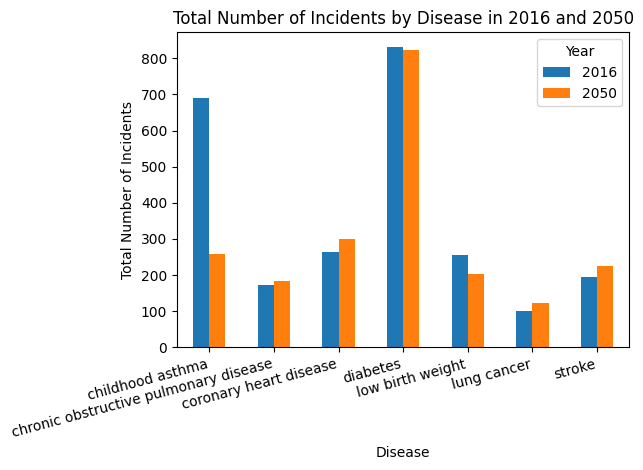

In [156]:
# DIFFERENCE BETWEEN 2016 AND 2050 FOR EACH DISEASE , NO AGE, INCIDENCE

df_selected_years = df_incidence_s0[(df_incidence_s0['Year']=='2016')| (df_incidence_s0['Year']=='2050')]

# Group the data by Disease and Year, and sum the Incidence values
grouped_data = df_selected_years.groupby(['Disease', 'Year'])['Incidence'].sum().unstack()
grouped_data = grouped_data[grouped_data.index != 'total']

plt.figure(figsize=(12, 8))
grouped_data.plot(kind='bar')
plt.title('Total Number of Incidents by Disease in 2016 and 2050')
plt.xlabel('Disease')
plt.ylabel('Total Number of Incidents')
plt.xticks(rotation=15, ha='right')  
plt.legend(labels=['2016', '2050'], title='Year')
plt.tight_layout()  
plt.show()

<div class="purple small-padding">
    <h5>Hammersmith NO2 incidence predictions for scenario 0</h5>
</div>

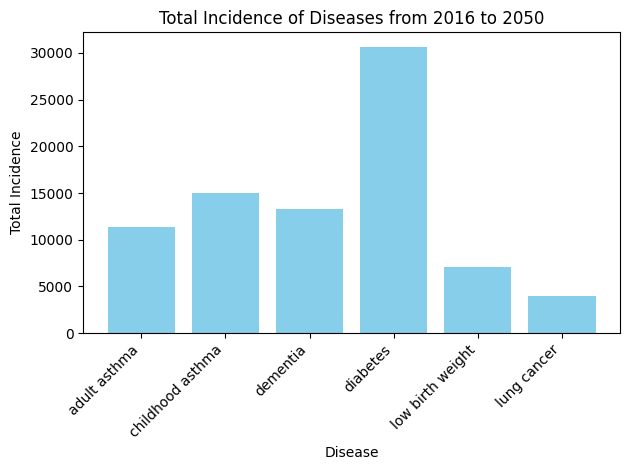

In [157]:
# Total number for each disease by age from 2016-2050 INCIDENCE SCENARIO 0
df_incidence_s0 = df_no2[df_no2['Scenario'] == 0].copy()

df_incidence_s0['Year'] = pd.to_datetime(df_incidence_s0['Year'], format='%Y')

grouped_data = df_incidence_s0.groupby(['Disease', 'Year'])['Incidence'].sum().unstack()
grouped_data = grouped_data[grouped_data.index != 'total']

total_incidence_per_disease = grouped_data.sum(axis=1)

fig, ax = plt.subplots()
ax.bar(total_incidence_per_disease.index, total_incidence_per_disease.values, color='skyblue')
ax.set_xlabel('Disease')
ax.set_ylabel('Total Incidence')
ax.set_title('Total Incidence of Diseases from 2016 to 2050')
ax.set_xticks(range(len(total_incidence_per_disease.index)))
ax.set_xticklabels(total_incidence_per_disease.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()


In [158]:
# Total number for all diseases from 2016-2050 INCIDENCE 

grouped_data = df_incidence_s0.groupby(['Disease', 'Year'])['Incidence'].sum().unstack()
grouped_data = grouped_data[grouped_data.index == 'total']

total_incidence = grouped_data.sum(axis=1)
total_incidence

Disease
total    40703
dtype: int64

<Figure size 1200x800 with 0 Axes>

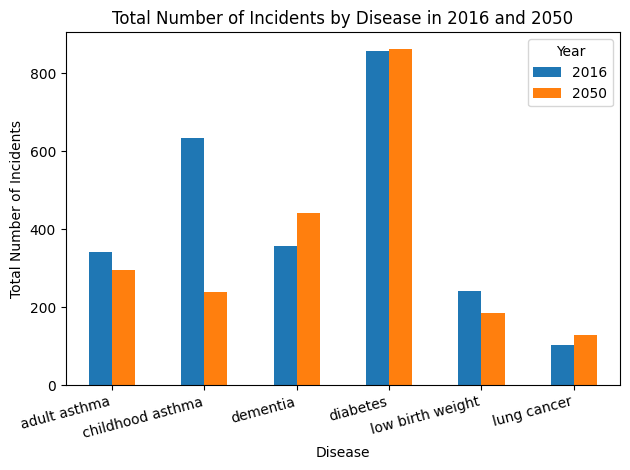

In [159]:
# DIFFERENCE BETWEEN 2016 AND 2050 FOR EACH DISEASE , NO AGE, INCIDENCE

df_selected_years = df_incidence_s0[(df_incidence_s0['Year']=='2016')| (df_incidence_s0['Year']=='2050')]

# Group the data by Disease and Year, and sum the Incidence values
grouped_data = df_selected_years.groupby(['Disease', 'Year'])['Incidence'].sum().unstack()
grouped_data = grouped_data[grouped_data.index != 'total']

plt.figure(figsize=(12, 8))
grouped_data.plot(kind='bar')
plt.title('Total Number of Incidents by Disease in 2016 and 2050')
plt.xlabel('Disease')
plt.ylabel('Total Number of Incidents')
plt.xticks(rotation=15, ha='right')  # Rotate x-axis labels for better readability
plt.legend(labels=['2016', '2050'], title='Year')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

<div class="yellow small-padding">
 <h4>b) How could schemes such as ULEZ reduce air pollution reduce hospital admissions and disease? ('scenario 2')</h4>
</div>

<div class="purple small-padding">
    <h5>Hammersmith PM2.5 incidence predictions for scenario 2</h5>
</div>

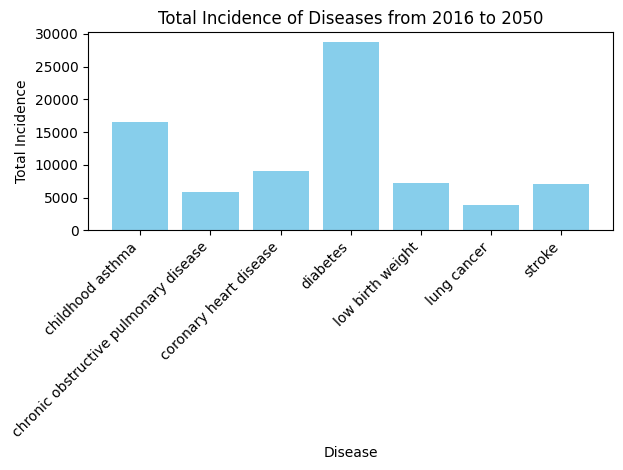

In [160]:
# Total number for each disease by age from 2016-2050 INCIDENCE SCENARIO 2
df_incidence_s2 = df_pm25[df_pm25['Scenario'] == 2].copy()
df_incidence_s2['Year'] = pd.to_datetime(df_incidence_s2['Year'], format='%Y')

grouped_data = df_incidence_s2.groupby(['Disease', 'Year'])['Incidence'].sum().unstack()
grouped_data = grouped_data[grouped_data.index != 'total']

total_incidence_per_disease = grouped_data.sum(axis=1)
total_incidence_per_disease

fig, ax = plt.subplots()
ax.bar(total_incidence_per_disease.index, total_incidence_per_disease.values, color='skyblue')
ax.set_xlabel('Disease')
ax.set_ylabel('Total Incidence')
ax.set_title('Total Incidence of Diseases from 2016 to 2050')
ax.set_xticks(range(len(total_incidence_per_disease.index)))
ax.set_xticklabels(total_incidence_per_disease.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

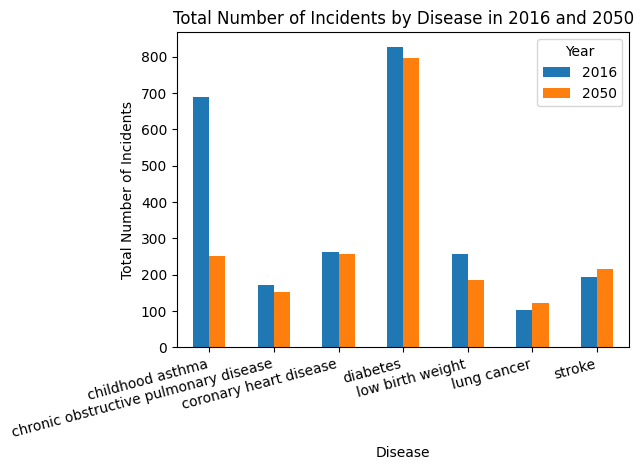

In [161]:
# DIFFERENCE BETWEEN 2016 AND 2050 FOR EACH DISEASE , NO AGE, INCIDENCE SCENARIO 2

df_selected_years = df_incidence_s2[(df_incidence_s2['Year']=='2016')| (df_incidence_s2['Year']=='2050')]

# Group the data by Disease and Year, and sum the Incidence values
grouped_data = df_selected_years.groupby(['Disease', 'Year'])['Incidence'].sum().unstack()
grouped_data = grouped_data[grouped_data.index != 'total']

plt.figure(figsize=(12, 8))
grouped_data.plot(kind='bar')
plt.title('Total Number of Incidents by Disease in 2016 and 2050')
plt.xlabel('Disease')
plt.ylabel('Total Number of Incidents')
plt.xticks(rotation=15, ha='right')  # Rotate x-axis labels for better readability
plt.legend(labels=['2016', '2050'], title='Year')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [162]:
# Total number for all diseases from 2016-2050 INCIDENCE SCENARIO 2

grouped_data = df_incidence_s2.groupby(['Disease', 'Year'])['Incidence'].sum().unstack()
grouped_data = grouped_data[grouped_data.index == 'total']

total_incidence = grouped_data.sum(axis=1)
total_incidence

Disease
total    39188
dtype: int64

<div class="purple small-padding">
    <h5>Scenario 2 incidences avoided for Hammersmith PM2.5</h5>
</div>

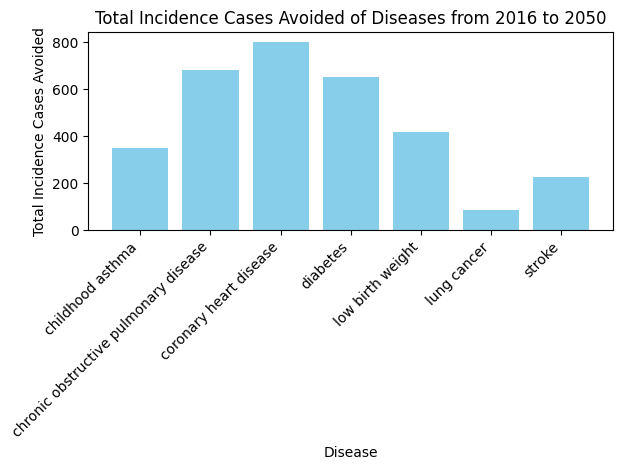

In [163]:
# Total number for each disease between 2016-2050 INCIDENCE AVOIDED

PM25_avoided_s2 = df_AVOIDED[df_AVOIDED['Scenario'] == 2].copy()
PM25_avoided_s2['Year'] = pd.to_datetime(df_AVOIDED['Year'], format='%Y')

grouped_avoided = PM25_avoided_s2.groupby(['Disease', 'Year'])['Incidence Cases Avoided'].sum().unstack()
grouped_avoided = grouped_avoided[grouped_avoided.index != 'total']

total_incidence_per_disease = grouped_avoided.sum(axis=1)
total_incidence_per_disease

fig, ax = plt.subplots()
ax.bar(total_incidence_per_disease.index, total_incidence_per_disease.values, color='skyblue')
ax.set_xlabel('Disease')
ax.set_ylabel('Total Incidence Cases Avoided')
ax.set_title('Total Incidence Cases Avoided of Diseases from 2016 to 2050')
ax.set_xticks(range(len(total_incidence_per_disease.index)))
ax.set_xticklabels(total_incidence_per_disease.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()



In [164]:
# TOTAL ALL DISEASES
grouped_avoided = PM25_avoided_s2.groupby(['Disease', 'Year'])['Incidence Cases Avoided'].sum().unstack()
grouped_avoided = PM25_avoided_s2.groupby(['Disease', 'Year'])['Incidence Cases Avoided'].sum().unstack()
grouped_avoided = grouped_avoided[grouped_avoided.index == 'total']
total_incidence = grouped_avoided.sum(axis=1)
total_incidence

Disease
total    1609
dtype: int64

<Figure size 1200x800 with 0 Axes>

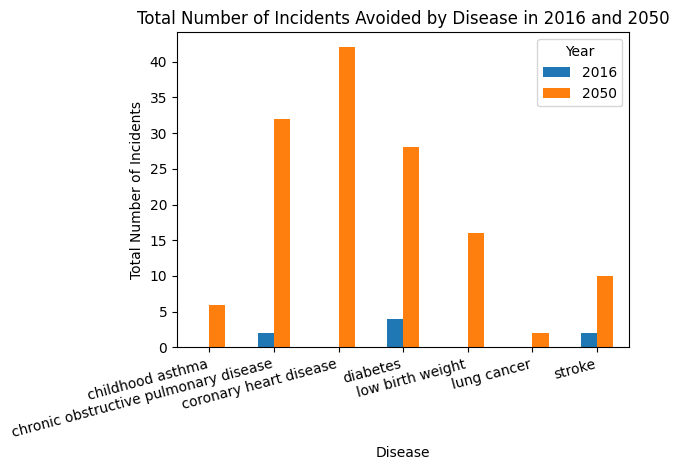

In [165]:
# DIFFERENCE IN INCIDENCES AVOIDED BETWEEN 2016 AND 2050 FOR EACH DISEASE 

df_selected_years = PM25_avoided_s2[(PM25_avoided_s2['Year']=='2016')| (PM25_avoided_s2['Year']=='2050')]

grouped_data = df_selected_years.groupby(['Disease', 'Year'])['Incidence Cases Avoided'].sum().unstack()
grouped_data = grouped_data[grouped_data.index != 'total']

plt.figure(figsize=(12, 8))
grouped_data.plot(kind='bar')
plt.title('Total Number of Incidents Avoided by Disease in 2016 and 2050')
plt.xlabel('Disease')
plt.ylabel('Total Number of Incidents')
plt.xticks(rotation=15, ha='right')  
plt.legend(labels=['2016', '2050'], title='Year')
plt.tight_layout()  
plt.show()

<div class="purple small-padding">
    <h5>Percentage decrease/increase per disease comparing scenario 0 and 2 PM2.5 data</h5>
</div>

In [166]:
# Get totals of each disease from 2016-2050 for scenario 0
PM25_incidence_s0 = df_pm25[df_pm25['Scenario'] == 0].copy()
PM25_incidence_s0['Year'] = pd.to_datetime(PM25_incidence_s0['Year'], format='%Y')

grouped_data_0 = PM25_incidence_s0.groupby(['Disease', 'Year'])['Incidence'].sum().unstack()
grouped_data_0 = grouped_data_0[grouped_data_0.index != 'total']
total_incidence_per_disease_0 = grouped_data_0.sum(axis=1)

# Get totals of each disease from 2016-2050 for scenario 2
PM25_incidence_s2 = df_pm25[df_pm25['Scenario'] == 2].copy()
PM25_incidence_s2['Year'] = pd.to_datetime(PM25_incidence_s2['Year'], format='%Y')
grouped_data_2 = PM25_incidence_s2.groupby(['Disease', 'Year'])['Incidence'].sum().unstack()
grouped_data_2 = grouped_data_2[grouped_data_2.index != 'total']
total_incidence_per_disease_2 = grouped_data_2.sum(axis=1)
print(total_incidence_per_disease_2, total_incidence_per_disease_0)


Disease
childhood asthma                         16536
chronic obstructive pulmonary disease     5788
coronary heart disease                    9018
diabetes                                 28788
low birth weight                          7188
lung cancer                               3928
stroke                                    7130
dtype: int64 Disease
childhood asthma                         16888
chronic obstructive pulmonary disease     6468
coronary heart disease                    9820
diabetes                                 29440
low birth weight                          7606
lung cancer                               4014
stroke                                    7358
dtype: int64


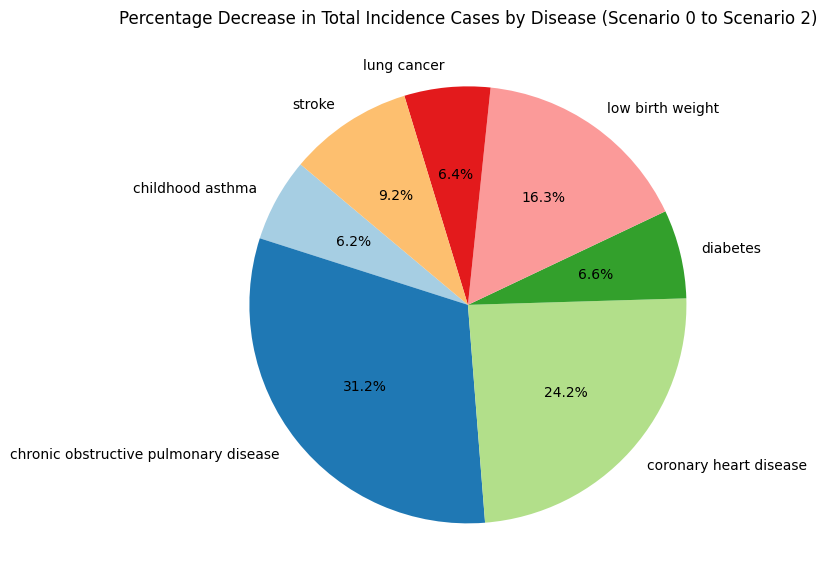

In [167]:
percentage_change = ((total_incidence_per_disease_2 - total_incidence_per_disease_0) / total_incidence_per_disease_0) * 100

# Prepare data for the pie chart
positive_change = percentage_change[percentage_change > 0]
negative_change = percentage_change[percentage_change < 0]

plt.figure(figsize=(8, 8))
plt.pie(negative_change.abs(), labels=negative_change.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Percentage Decrease in Total Incidence Cases by Disease (Scenario 0 to Scenario 2)')

plt.tight_layout()
plt.show()

In [168]:
# Total change for each disease
absolute_change_per_disease = total_incidence_per_disease_2 - total_incidence_per_disease_0
print("Absolute Change in Total Incidence Cases for Each Disease:")
print(absolute_change_per_disease)

Absolute Change in Total Incidence Cases for Each Disease:
Disease
childhood asthma                        -352
chronic obstructive pulmonary disease   -680
coronary heart disease                  -802
diabetes                                -652
low birth weight                        -418
lung cancer                              -86
stroke                                  -228
dtype: int64


In [169]:
## TOTAL CHANGE FOR ASTHMAS , DEMENTIA, LUNG CANCER

selected_diseases = ['childhood asthma', 'coronary heart disease', 'lung cancer']

absolute_change_selected = absolute_change_per_disease[selected_diseases]

total_decrease = absolute_change_selected[absolute_change_selected < 0].sum()

print("Total Number of Decrease for Selected Diseases:")
print(total_decrease)

Total Number of Decrease for Selected Diseases:
-1240


Disease
total    39188
dtype: int64 Disease
total    40797
dtype: int64
Percentage Change for All Diseases' Decrease:
Disease
total   -3.943917
dtype: float64


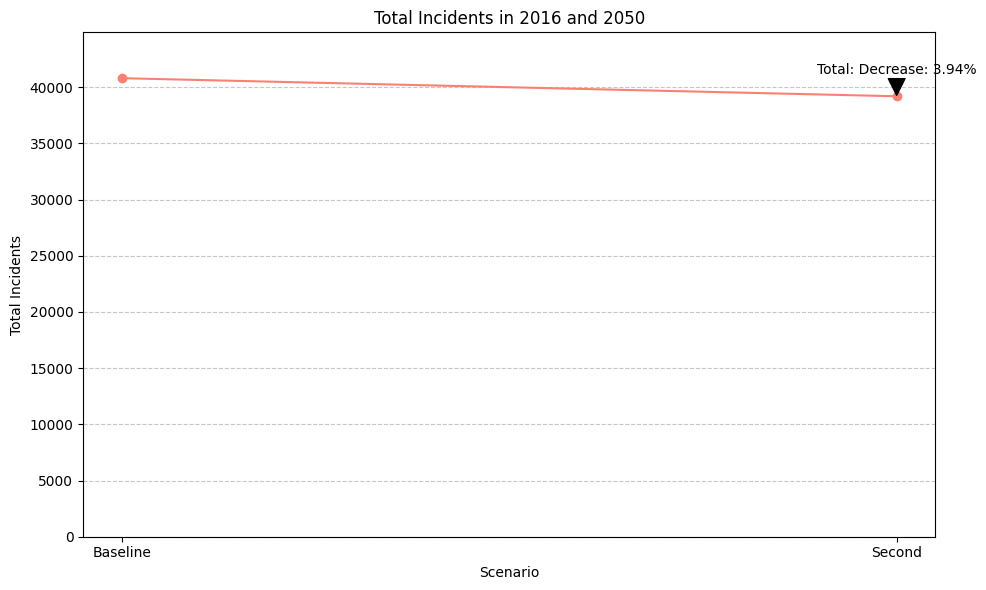

In [170]:
# Percentage change for all diseases comparing scenario 0 and 2 for pm2.5

# Get totals for all diseases from 2016-2050 for scenario 0
PM25_incidence_s0 = df_pm25[df_pm25['Scenario'] == 0].copy()
PM25_incidence_s0['Year'] = pd.to_datetime(PM25_incidence_s0['Year'], format='%Y')
grouped_data_0 = PM25_incidence_s0.groupby(['Disease', 'Year'])['Incidence'].sum().unstack()
grouped_data_0 = grouped_data_0[grouped_data_0.index == 'total']
total_incidence_per_disease_0 = grouped_data_0.sum(axis=1)


# Get totals for all diseases from 2016-2050 for scenario 2
PM25_incidence_s2 = df_pm25[df_pm25['Scenario'] == 2].copy()
PM25_incidence_s2['Year'] = pd.to_datetime(PM25_incidence_s2['Year'], format='%Y')
grouped_data_2 = PM25_incidence_s2.groupby(['Disease', 'Year'])['Incidence'].sum().unstack()
grouped_data_2 = grouped_data_2[grouped_data_2.index == 'total']
total_incidence_per_disease_2 = grouped_data_2.sum(axis=1)
print(total_incidence_per_disease_2, total_incidence_per_disease_0)

# Calculate the absolute decrease in total incidence cases
absolute_decrease = total_incidence_per_disease_2 - total_incidence_per_disease_0

# Calculate the percentage change for all diseases' decrease
percentage_change_decrease = ((absolute_decrease) / total_incidence_per_disease_0) * 100

# Print the percentage change for all diseases' decrease
print("Percentage Change for All Diseases' Decrease:")
print(percentage_change_decrease)

scenarios = ['Baseline', 'Second']
totals = [total_incidence_per_disease_0.iloc[0], total_incidence_per_disease_2.iloc[0]]

# Plotting the total incidents for Scenario 0 and Scenario 2
plt.figure(figsize=(10, 6))
plt.plot(scenarios, totals, marker='o', linestyle='-', color='salmon')
plt.title('Total Incidents in 2016 and 2050')
plt.xlabel('Scenario')
plt.ylabel('Total Incidents')
plt.ylim(0, max(totals) * 1.1)  # Adjust the y-axis limit to make the chart more readable
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotating the plot with percentage change for each disease's decrease
for i, disease in enumerate(total_incidence_per_disease_0.index):
    absolute_change = total_incidence_per_disease_2.loc[disease] - total_incidence_per_disease_0.loc[disease]
    percentage_change = ((absolute_change) / total_incidence_per_disease_0.loc[disease]) * 100
    if percentage_change < 0:
        decrease_annotation = f'{disease.capitalize()}: Decrease: {abs(percentage_change):.2f}%'
        plt.annotate(decrease_annotation, xy=('Second', total_incidence_per_disease_2.loc[disease]), xytext=('Second', total_incidence_per_disease_2.loc[disease] * 1.05),
                     arrowprops=dict(facecolor='black', shrink=0.05),
                     horizontalalignment='center')

plt.tight_layout()
plt.show()

<div class="purple small-padding">
    <h5>Hammersmith NO2 incidence predictions for scenario 2</h5>
</div>

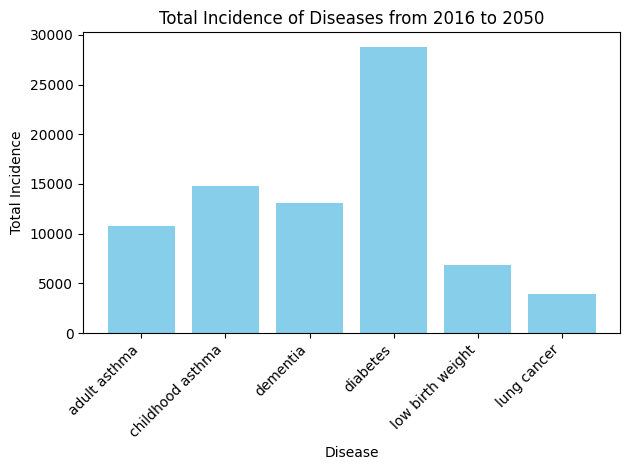

In [171]:
# Total number for each disease by age from 2016-2050 INCIDENCE SCENARIO 2
df_incidence_s2 = df_no2[df_no2['Scenario'] == 2].copy()

df_incidence_s2['Year'] = pd.to_datetime(df_incidence_s2['Year'], format='%Y')

grouped_data = df_incidence_s2.groupby(['Disease', 'Year'])['Incidence'].sum().unstack()
grouped_data = grouped_data[grouped_data.index != 'total']


total_incidence_per_disease = grouped_data.sum(axis=1)

fig, ax = plt.subplots()
ax.bar(total_incidence_per_disease.index, total_incidence_per_disease.values, color='skyblue')
ax.set_xlabel('Disease')
ax.set_ylabel('Total Incidence')
ax.set_title('Total Incidence of Diseases from 2016 to 2050')
ax.set_xticks(range(len(total_incidence_per_disease.index)))
ax.set_xticklabels(total_incidence_per_disease.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

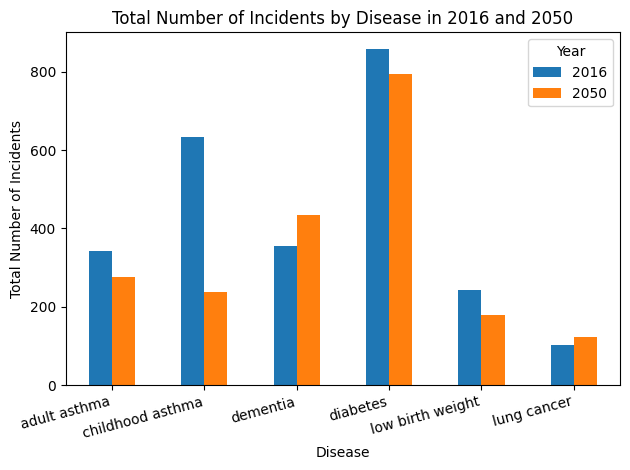

In [172]:
# DIFFERENCE BETWEEN 2016 AND 2050 FOR EACH DISEASE INCIDENCE SCENARIO 2

df_selected_years = df_incidence_s2[(df_incidence_s2['Year']=='2016')|(df_incidence_s2['Year']=='2050')]

# Group the data by Disease and Year, and sum the Incidence values
grouped_data = df_selected_years.groupby(['Disease', 'Year'])['Incidence'].sum().unstack()
grouped_data = grouped_data[grouped_data.index != 'total']

plt.figure(figsize=(12, 8))
grouped_data.plot(kind='bar')
plt.title('Total Number of Incidents by Disease in 2016 and 2050')
plt.xlabel('Disease')
plt.ylabel('Total Number of Incidents')
plt.xticks(rotation=15, ha='right') 
plt.legend(labels=['2016', '2050'], title='Year')
plt.tight_layout()  
plt.show()

In [173]:
# Total number for all diseases from 2016-2050 INCIDENCE SCENARIO 2

grouped_data = df_incidence_s2.groupby(['Disease', 'Year'])['Incidence'].sum().unstack()
grouped_data = grouped_data[grouped_data.index == 'total']
total_incidence = grouped_data.sum(axis=1)
total_incidence

Disease
total    39152
dtype: int64

<div class="purple small-padding">
    <h5>Scenario 2 incidences avoided for Hammersmith</h5>
</div>

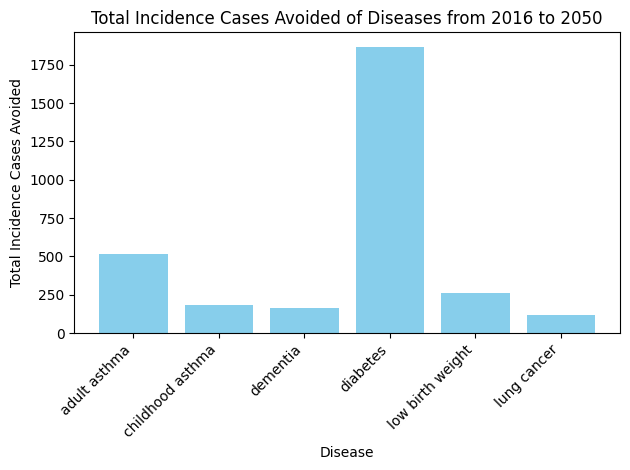

In [174]:
# Total number for each disease between 2016-2050 INCIDENCE AVOIDED

# Total number for each disease by age from 2016-2050 INCIDENCE
NO2_avoided_s2 = df_AVOIDED_NO2[df_AVOIDED_NO2['Scenario'] == 2].copy()
NO2_avoided_s2['Year'] = pd.to_datetime(df_AVOIDED_NO2['Year'], format='%Y')
NO2_avoided_s2

grouped_avoided = NO2_avoided_s2.groupby(['Disease', 'Year'])['Incidence Cases Avoided'].sum().unstack()
grouped_avoided = grouped_avoided[grouped_avoided.index != 'total']

grouped_avoided
total_incidence_per_disease = grouped_avoided.sum(axis=1)
total_incidence_per_disease


fig, ax = plt.subplots()
ax.bar(total_incidence_per_disease.index, total_incidence_per_disease.values, color='skyblue')
ax.set_xlabel('Disease')
ax.set_ylabel('Total Incidence Cases Avoided')
ax.set_title('Total Incidence Cases Avoided of Diseases from 2016 to 2050')
ax.set_xticks(range(len(total_incidence_per_disease.index)))
ax.set_xticklabels(total_incidence_per_disease.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()


In [175]:
# TOTAL ALL DISEASES
grouped_avoided = NO2_avoided_s2.groupby(['Disease', 'Year'])['Incidence Cases Avoided'].sum().unstack()
grouped_avoided = NO2_avoided_s2.groupby(['Disease', 'Year'])['Incidence Cases Avoided'].sum().unstack()
grouped_avoided = grouped_avoided[grouped_avoided.index == 'total']
total_incidence = grouped_avoided.sum(axis=1)
total_incidence

Disease
total    1551
dtype: int64

<Figure size 1200x800 with 0 Axes>

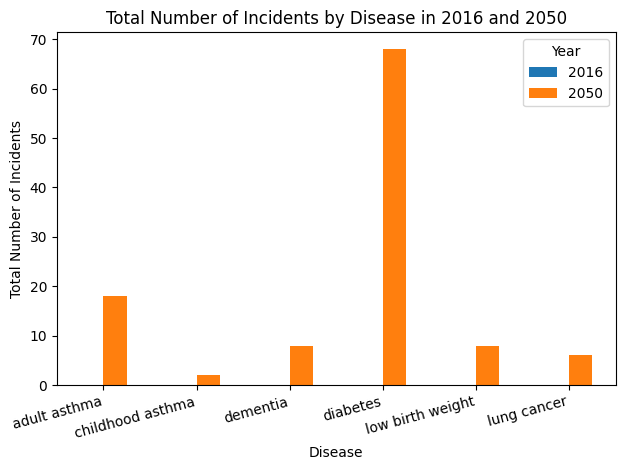

In [176]:
# DIFFERENCE BETWEEN 2016 AND 2050 FOR EACH DISEASE INCIDENCES AVOIDED

df_selected_years = NO2_avoided_s2[(NO2_avoided_s2['Year']=='2016')|(NO2_avoided_s2['Year']=='2050')]

# Group the data by Disease and Year, and sum the Incidence values
grouped_data = df_selected_years.groupby(['Disease', 'Year'])['Incidence Cases Avoided'].sum().unstack()
grouped_data = grouped_data[grouped_data.index != 'total']

plt.figure(figsize=(12, 8))
grouped_data.plot(kind='bar')
plt.title('Total Number of Incidents by Disease in 2016 and 2050')
plt.xlabel('Disease')
plt.ylabel('Total Number of Incidents')
plt.xticks(rotation=15, ha='right')  
plt.legend(labels=['2016', '2050'], title='Year')
plt.tight_layout()  
plt.show()

In [177]:
# TOTAL ALL DISEASES
grouped_avoided = NO2_avoided_s2.groupby(['Disease', 'Year'])['Incidence Cases Avoided'].sum().unstack()
grouped_avoided = NO2_avoided_s2.groupby(['Disease', 'Year'])['Incidence Cases Avoided'].sum().unstack()
grouped_avoided = grouped_avoided[grouped_avoided.index == 'total']
total_incidence = grouped_avoided.sum(axis=1)
total_incidence

Disease
total    1551
dtype: int64

<Figure size 1200x800 with 0 Axes>

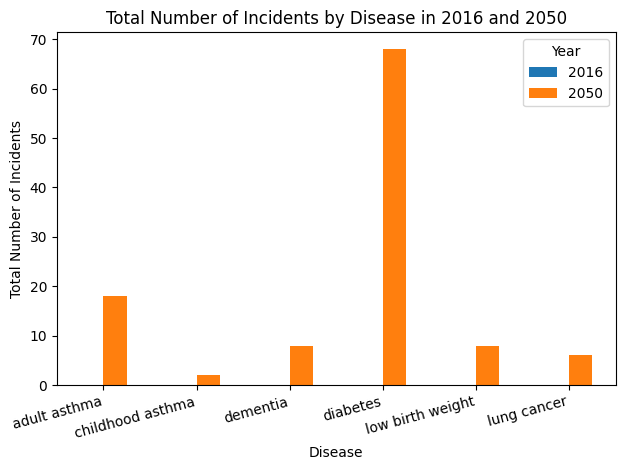

In [178]:
# DIFFERENCE BETWEEN 2016 AND 2050 FOR EACH DISEASE INCIDENCES AVOIDED

df_selected_years = NO2_avoided_s2[(NO2_avoided_s2['Year']=='2016')| (NO2_avoided_s2['Year']=='2050')]

# Group the data by Disease and Year, and sum the Incidence values
grouped_data = df_selected_years.groupby(['Disease', 'Year'])['Incidence Cases Avoided'].sum().unstack()
grouped_data = grouped_data[grouped_data.index != 'total']

plt.figure(figsize=(12, 8))
grouped_data.plot(kind='bar')
plt.title('Total Number of Incidents by Disease in 2016 and 2050')
plt.xlabel('Disease')
plt.ylabel('Total Number of Incidents')
plt.xticks(rotation=15, ha='right')  # Rotate x-axis labels for better readability
plt.legend(labels=['2016', '2050'], title='Year')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

<div class="purple small-padding">
    <h5>Percentage decrease/increase per disease for pm2.5 in Hammersmith comparing scenario 0 and 2</h5>
</div>

In [179]:
# Get totals of each disease from 2016-2050 for scenario 0
NO2_incidence_s0 = df_no2[df_no2['Scenario'] == 0].copy()
NO2_incidence_s0['Year'] = pd.to_datetime(NO2_incidence_s0['Year'], format='%Y')

grouped_data_0 = NO2_incidence_s0.groupby(['Disease', 'Year'])['Incidence'].sum().unstack()
grouped_data_0 = grouped_data_0[grouped_data_0.index != 'total']
total_incidence_per_disease_0 = grouped_data_0.sum(axis=1)

# Get totals of each disease from 2016-2050 for scenario 2
NO2_incidence_s2 = df_no2[df_no2['Scenario'] == 2].copy()
NO2_incidence_s2['Year'] = pd.to_datetime(NO2_incidence_s2['Year'], format='%Y')
grouped_data_2 = NO2_incidence_s2.groupby(['Disease', 'Year'])['Incidence'].sum().unstack()
grouped_data_2 = grouped_data_2[grouped_data_2.index != 'total']
total_incidence_per_disease_2 = grouped_data_2.sum(axis=1)
print(total_incidence_per_disease_2, total_incidence_per_disease_0)


Disease
adult asthma        10816
childhood asthma    14836
dementia            13126
diabetes            28808
low birth weight     6826
lung cancer          3892
dtype: int64 Disease
adult asthma        11332
childhood asthma    15018
dementia            13288
diabetes            30676
low birth weight     7084
lung cancer          4008
dtype: int64


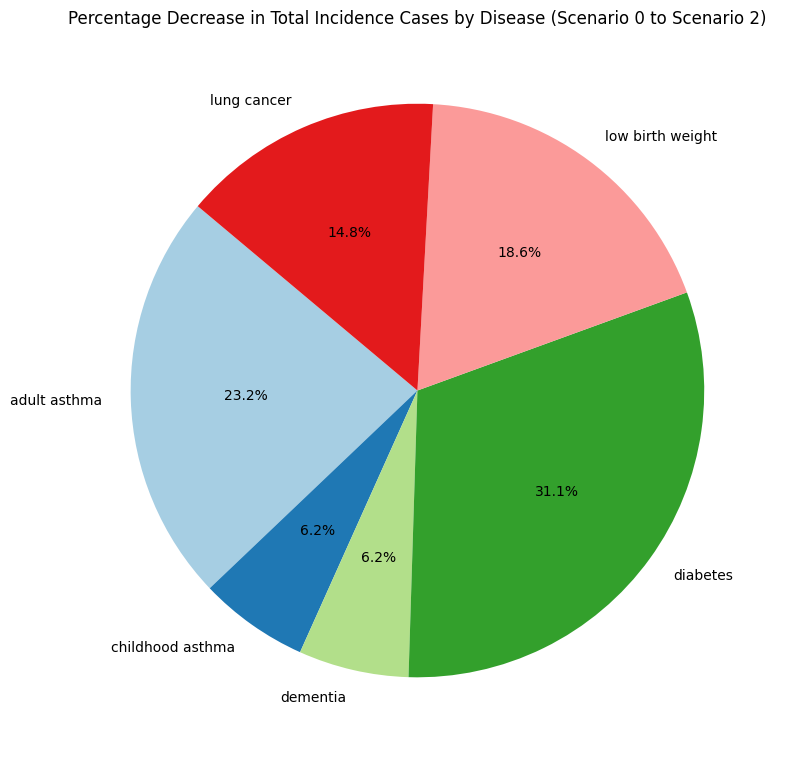

In [180]:
percentage_change = ((total_incidence_per_disease_2 - total_incidence_per_disease_0) / total_incidence_per_disease_0) * 100

# Prepare data for the pie chart
positive_change = percentage_change[percentage_change > 0]
negative_change = percentage_change[percentage_change < 0]

plt.figure(figsize=(8, 8))
plt.pie(negative_change.abs(), labels=negative_change.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Percentage Decrease in Total Incidence Cases by Disease (Scenario 0 to Scenario 2)')

plt.tight_layout()
plt.show()


In [181]:
# Total change for each disease
absolute_change_per_disease = total_incidence_per_disease_2 - total_incidence_per_disease_0
print("Absolute Change in Total Incidence Cases for Each Disease:")
print(absolute_change_per_disease)

Absolute Change in Total Incidence Cases for Each Disease:
Disease
adult asthma        -516
childhood asthma    -182
dementia            -162
diabetes           -1868
low birth weight    -258
lung cancer         -116
dtype: int64


In [182]:
## TOTAL CHANGE FOR ASTHMAS , DEMENTIA, LUNG CANCER

selected_diseases = ['adult asthma', 'childhood asthma', 'dementia', 'lung cancer']

absolute_change_selected = absolute_change_per_disease[selected_diseases]

total_decrease = absolute_change_selected[absolute_change_selected < 0].sum()

print("Total Number of Decrease for Selected Diseases:")
print(total_decrease)

Total Number of Decrease for Selected Diseases:
-976


<div class="purple small-padding">
    <h5>Percentage decrease/increase per disease for NO2 in Hammersmith comparing scenario 0 and 2</h5>
</div>

Disease
total    39152
dtype: int64 Disease
total    40703
dtype: int64
Percentage Change for All Diseases' Decrease:
Disease
total   -3.81053
dtype: float64


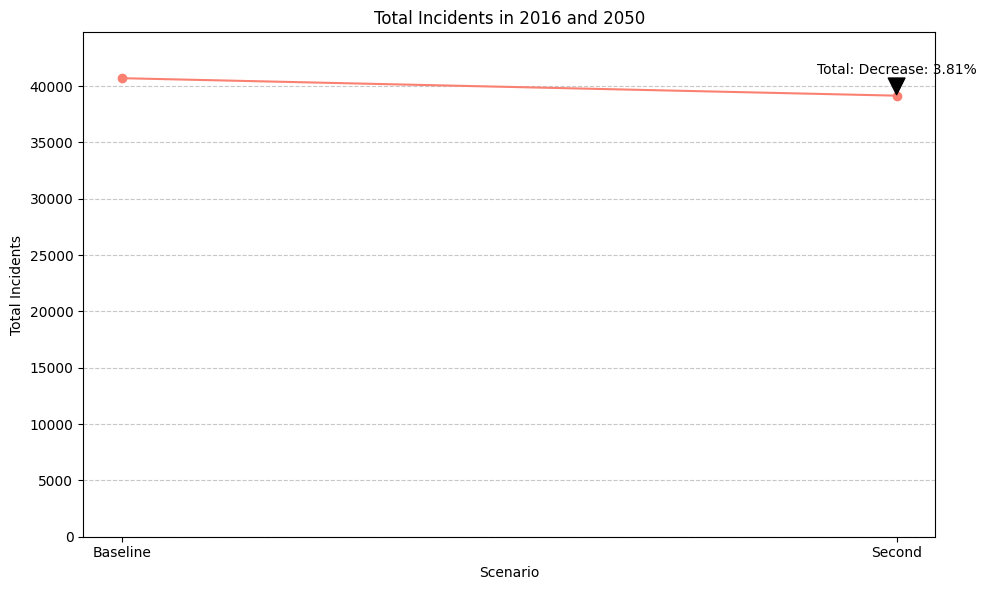

In [183]:
# Get totals for all disease from 2016-2050 for scenario 0
NO2_incidence_s0 = df_no2[df_no2['Scenario'] == 0].copy()
NO2_incidence_s0['Year'] = pd.to_datetime(NO2_incidence_s0['Year'], format='%Y')
grouped_data_0 = NO2_incidence_s0.groupby(['Disease', 'Year'])['Incidence'].sum().unstack()
grouped_data_0 = grouped_data_0[grouped_data_0.index == 'total']
total_incidence_per_disease_0 = grouped_data_0.sum(axis=1)

# Get totals totals for all disease from 2016-2050 for scenario 2
NO2_incidence_s2 = df_no2[df_no2['Scenario'] == 2].copy()
NO2_incidence_s2['Year'] = pd.to_datetime(NO2_incidence_s2['Year'], format='%Y')
grouped_data_2 = NO2_incidence_s2.groupby(['Disease', 'Year'])['Incidence'].sum().unstack()
grouped_data_2 = grouped_data_2[grouped_data_2.index == 'total']
total_incidence_per_disease_2 = grouped_data_2.sum(axis=1)
print(total_incidence_per_disease_2, total_incidence_per_disease_0)

# Calculate the absolute decrease in total incidence cases
absolute_decrease = total_incidence_per_disease_2 - total_incidence_per_disease_0

# Calculate the percentage change for all diseases' decrease
percentage_change_decrease = ((absolute_decrease) / total_incidence_per_disease_0) * 100

# Print the percentage change for all diseases' decrease
print("Percentage Change for All Diseases' Decrease:")
print(percentage_change_decrease)

scenarios = ['Baseline', 'Second']
totals = [total_incidence_per_disease_0.iloc[0], total_incidence_per_disease_2.iloc[0]]

# Plotting the total incidents for Scenario 0 and Scenario 2
plt.figure(figsize=(10, 6))
plt.plot(scenarios, totals, marker='o', linestyle='-', color='salmon')
plt.title('Total Incidents in 2016 and 2050')
plt.xlabel('Scenario')
plt.ylabel('Total Incidents')
plt.ylim(0, max(totals) * 1.1)  # Adjust the y-axis limit to make the chart more readable
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotating the plot with percentage change for each disease's decrease
for i, disease in enumerate(total_incidence_per_disease_0.index):
    absolute_change = total_incidence_per_disease_2.loc[disease] - total_incidence_per_disease_0.loc[disease]
    percentage_change = ((absolute_change) / total_incidence_per_disease_0.loc[disease]) * 100
    if percentage_change < 0:
        decrease_annotation = f'{disease.capitalize()}: Decrease: {abs(percentage_change):.2f}%'
        plt.annotate(decrease_annotation, xy=('Second', total_incidence_per_disease_2.loc[disease]), xytext=('Second', total_incidence_per_disease_2.loc[disease] * 1.05),
                     arrowprops=dict(facecolor='black', shrink=0.05),
                     horizontalalignment='center')

plt.tight_layout()
plt.show()

<div class="yellow small-padding">
    <h3>sub questions</h3>
</div>

<div class="yellow small-padding">
    <h3>sub questions</h3>
</div>

<div class="yellow small-padding">
    <h3>sub questions</h3>
</div>

<div class="blue extra-padding">
    <strong>Observations</strong>
    <ul>
        <li>one</li>
        <li>two</li>
        <li>three</li>
        <li>four</li>
        <li>five</li>
    </ul>
</div>

<div class="blue extra-padding">
    <strong>Observations</strong>
    <ul>
        <li>one</li>
        <li>two</li>
        <li>three</li>
        <li>four</li>
        <li>five</li>
    </ul>
</div>